<a href="https://colab.research.google.com/github/seonghaiiiii/jeju-food/blob/main/supply_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os

from sklearn.metrics import mean_squared_error, r2_score

#데이터 로드

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# data load
train = pd.read_csv('/content/drive/MyDrive/2023 IBA/데이콘_제주도/open/train.csv')
trade = pd.read_csv('/content/drive/MyDrive/2023 IBA/데이콘_제주도/open/international_trade.csv')
test = pd.read_csv('/content/drive/MyDrive/2023 IBA/데이콘_제주도/open/test.csv')

#train 기본 정보

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           59397 non-null  object 
 1   timestamp    59397 non-null  object 
 2   item         59397 non-null  object 
 3   corporation  59397 non-null  object 
 4   location     59397 non-null  object 
 5   supply(kg)   59397 non-null  float64
 6   price(원/kg)  59397 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.2+ MB


In [ ]:
train.head()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0


#데이터 자르기

In [ ]:
# ID 열의 앞 6자를 기준으로 groupby하여 데이터프레임을 분할
grouped = train.groupby(train['ID'].str[:6])

# 그룹별로 데이터프레임을 만들어 저장
dataframes = {}
for group_name, group_data in grouped:
    dataframes[group_name] = group_data

# 결과 확인
for group_name, group_df in dataframes.items():
    print(f"Group: {group_name}")
    print(group_df)


Group: BC_A_J
                    ID   timestamp item corporation location  supply(kg)  \
42644  BC_A_J_20190101  2019-01-01   BC           A        J         0.0   
42645  BC_A_J_20190102  2019-01-02   BC           A        J         0.0   
42646  BC_A_J_20190103  2019-01-03   BC           A        J      7616.0   
42647  BC_A_J_20190104  2019-01-04   BC           A        J      7488.0   
42648  BC_A_J_20190105  2019-01-05   BC           A        J     10408.0   
...                ...         ...  ...         ...      ...         ...   
44162  BC_A_J_20230227  2023-02-27   BC           A        J     11702.0   
44163  BC_A_J_20230228  2023-02-28   BC           A        J      6056.0   
44164  BC_A_J_20230301  2023-03-01   BC           A        J      5896.0   
44165  BC_A_J_20230302  2023-03-02   BC           A        J      8600.0   
44166  BC_A_J_20230303  2023-03-03   BC           A        J     10728.0   

       price(원/kg)  
42644          0.0  
42645          0.0  
42646     

In [ ]:
TG_A_J = dataframes.get('TG_A_J')
TG_A_S = dataframes.get('TG_A_S')
TG_B_J = dataframes.get('TG_B_J')
TG_B_S = dataframes.get('TG_B_S')
TG_C_J = dataframes.get('TG_C_J')
TG_C_S = dataframes.get('TG_C_S')
TG_D_J = dataframes.get('TG_D_J')
TG_D_S = dataframes.get('TG_D_S')
TG_E_J = dataframes.get('TG_E_J')
TG_E_S = dataframes.get('TG_E_S')

In [ ]:
CR_A_J = dataframes.get('CR_A_J')
CR_A_S = dataframes.get('CR_A_S')
CR_B_J = dataframes.get('CR_B_J')
CR_B_S = dataframes.get('CR_B_S')
CR_C_J = dataframes.get('CR_C_J')
CR_C_S = dataframes.get('CR_C_S')
CR_D_J = dataframes.get('CR_D_J')
CR_D_S = dataframes.get('CR_D_S')
CR_E_J = dataframes.get('CR_E_J')
CR_E_S = dataframes.get('CR_E_S')

In [ ]:
CB_A_J = dataframes.get('CB_A_J')
CB_A_S = dataframes.get('CB_A_S')
CB_B_J = dataframes.get('CB_B_J')
CB_B_S = dataframes.get('CB_B_S')
CB_C_J = dataframes.get('CB_C_J')
CB_C_S = dataframes.get('CB_C_S')
CB_D_J = dataframes.get('CB_D_J')
CB_D_S = dataframes.get('CB_D_S')
CB_E_J = dataframes.get('CB_E_J')
CB_E_S = dataframes.get('CB_E_S')

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/2023 IBA/데이콘_제주도/open/sample_submission.csv')

In [ ]:
# 'ID' 열의 고유한 값 확인
unique_ids = df1['ID'].unique()

# 고유한 값들 출력
for unique_id in unique_ids:
    print(unique_id)

TG_A_J_20230304
TG_A_J_20230305
TG_A_J_20230306
TG_A_J_20230307
TG_A_J_20230308
TG_A_J_20230309
TG_A_J_20230310
TG_A_J_20230311
TG_A_J_20230312
TG_A_J_20230313
TG_A_J_20230314
TG_A_J_20230315
TG_A_J_20230316
TG_A_J_20230317
TG_A_J_20230318
TG_A_J_20230319
TG_A_J_20230320
TG_A_J_20230321
TG_A_J_20230322
TG_A_J_20230323
TG_A_J_20230324
TG_A_J_20230325
TG_A_J_20230326
TG_A_J_20230327
TG_A_J_20230328
TG_A_J_20230329
TG_A_J_20230330
TG_A_J_20230331
TG_A_S_20230304
TG_A_S_20230305
TG_A_S_20230306
TG_A_S_20230307
TG_A_S_20230308
TG_A_S_20230309
TG_A_S_20230310
TG_A_S_20230311
TG_A_S_20230312
TG_A_S_20230313
TG_A_S_20230314
TG_A_S_20230315
TG_A_S_20230316
TG_A_S_20230317
TG_A_S_20230318
TG_A_S_20230319
TG_A_S_20230320
TG_A_S_20230321
TG_A_S_20230322
TG_A_S_20230323
TG_A_S_20230324
TG_A_S_20230325
TG_A_S_20230326
TG_A_S_20230327
TG_A_S_20230328
TG_A_S_20230329
TG_A_S_20230330
TG_A_S_20230331
TG_B_J_20230304
TG_B_J_20230305
TG_B_J_20230306
TG_B_J_20230307
TG_B_J_20230308
TG_B_J_20230309
TG_B_J_2

In [ ]:
#ID 앞에 6자만 필요해서 자른거임
df1['ID_1'] = df1['ID'].str[:6]

In [ ]:
# 'ID' 열의 고유한 값 확인
unique_ids = df1['ID_1'].unique()

unique_ids

# 총 39개

array(['TG_A_J', 'TG_A_S', 'TG_B_J', 'TG_B_S', 'TG_C_J', 'TG_C_S',
       'TG_D_J', 'TG_D_S', 'TG_E_J', 'TG_E_S', 'CR_A_J', 'CR_B_J',
       'CR_C_J', 'CR_D_J', 'CR_D_S', 'CR_E_J', 'CR_E_S', 'CB_A_J',
       'CB_A_S', 'CB_D_J', 'CB_E_J', 'RD_A_J', 'RD_A_S', 'RD_C_S',
       'RD_D_J', 'RD_D_S', 'RD_E_J', 'RD_E_S', 'BC_A_J', 'BC_A_S',
       'BC_B_J', 'BC_B_S', 'BC_C_J', 'BC_C_S', 'BC_D_J', 'BC_E_J',
       'BC_E_S', 'CB_F_J', 'RD_F_J'], dtype=object)

In [ ]:
TG_A_J = dataframes.get('TG_A_J')
TG_A_S = dataframes.get('TG_A_S')
TG_B_J = dataframes.get('TG_B_J')
TG_B_S = dataframes.get('TG_B_S')
TG_C_J = dataframes.get('TG_C_J')
TG_C_S = dataframes.get('TG_C_S')
TG_D_J = dataframes.get('TG_D_J')
TG_D_S = dataframes.get('TG_D_S')
TG_E_J = dataframes.get('TG_E_J')
TG_E_S = dataframes.get('TG_E_S')
CR_A_J = dataframes.get('CR_A_J')
CR_B_J = dataframes.get('CR_B_J')
CR_C_J = dataframes.get('CR_C_J')
CR_D_J = dataframes.get('CR_D_J')
CR_D_S = dataframes.get('CR_D_S')
CR_E_J = dataframes.get('CR_E_J')
CR_E_S = dataframes.get('CR_E_S')
CB_A_J = dataframes.get('CB_A_J')
CB_A_S = dataframes.get('CB_A_S')
CB_D_J = dataframes.get('CB_D_J')
CB_E_J = dataframes.get('CB_E_J')
RD_A_J = dataframes.get('RD_A_J')
RD_A_S = dataframes.get('RD_A_S')
RD_C_S = dataframes.get('RD_C_S')
RD_D_J = dataframes.get('RD_D_J')
RD_D_S = dataframes.get('RD_D_S')
RD_E_J = dataframes.get('RD_E_J')
RD_E_S = dataframes.get('RD_E_S')
BC_A_J = dataframes.get('BC_A_J')
BC_A_S = dataframes.get('BC_A_S')
BC_B_J = dataframes.get('BC_B_J')
BC_B_S = dataframes.get('BC_B_S')
BC_C_J = dataframes.get('BC_C_J')
BC_C_S = dataframes.get('BC_C_S')
BC_D_J = dataframes.get('BC_D_J')
BC_E_J = dataframes.get('BC_E_J')
BC_E_S = dataframes.get('BC_E_S')
CB_F_J = dataframes.get('CB_F_J')
RD_F_J = dataframes.get('RD_F_J')

In [ ]:
# 원하는 열 이름 목록을 만듭니다.
columns_to_extract = ['TG_A_J', 'TG_A_S', 'TG_B_J', 'TG_B_S', 'TG_C_J', 'TG_C_S',
                      'TG_D_J', 'TG_D_S', 'TG_E_J', 'TG_E_S', 'CR_A_J', 'CR_B_J',
                      'CR_C_J', 'CR_D_J', 'CR_D_S', 'CR_E_J', 'CR_E_S', 'CB_A_J',
                      'CB_A_S', 'CB_D_J', 'CB_E_J', 'RD_A_J', 'RD_A_S', 'RD_C_S',
                      'RD_D_J', 'RD_D_S', 'RD_E_J', 'RD_E_S', 'BC_A_J', 'BC_A_S',
                      'BC_B_J', 'BC_B_S', 'BC_C_J', 'BC_C_S', 'BC_D_J', 'BC_E_J',
                      'BC_E_S', 'CB_F_J', 'RD_F_J']

# 열 이름 목록을 기반으로 데이터프레임에서 열을 반복적으로 추출합니다.
for column_name in columns_to_extract:
    extracted_column = dataframes.get(column_name)
    # 여기에서 extracted_column을 사용하여 원하는 작업을 수행할 수 있습니다.
    # 예를 들어, 추출된 열로 특정 계산을 수행하거나 다른 작업을 수행할 수 있습니다.


In [ ]:
# 삭제할 열 이름 리스트
columns_to_delete = ['ID', 'item', 'corporation', 'location','price(원/kg)']
# 변수들에 대해 열 삭제 수행
dataframes = [TG_A_J, TG_A_S, TG_B_J, TG_B_S, TG_C_J, TG_C_S, TG_D_J, TG_D_S, TG_E_J, TG_E_S,
              CR_A_J, CR_B_J, CR_C_J, CR_D_J, CR_D_S, CR_E_J, CR_E_S,
              CB_A_J, CB_A_S, CB_D_J, CB_E_J,
              RD_A_J, RD_A_S, RD_C_S, RD_D_J, RD_D_S, RD_E_J, RD_E_S,
              BC_A_J, BC_A_S, BC_B_J, BC_B_S, BC_C_J, BC_C_S, BC_D_J, BC_E_J, BC_E_S,
              CB_F_J, RD_F_J]

for df in dataframes:
    df.drop(columns=columns_to_delete, inplace=True)


In [ ]:
# 변수들에 대해 열 이름 변경 수행
dataframes = [TG_A_J, TG_A_S, TG_B_J, TG_B_S, TG_C_J, TG_C_S, TG_D_J, TG_D_S, TG_E_J, TG_E_S,
              CR_A_J, CR_B_J, CR_C_J, CR_D_J, CR_D_S, CR_E_J, CR_E_S,
              CB_A_J, CB_A_S, CB_D_J, CB_E_J,
              RD_A_J, RD_A_S, RD_C_S, RD_D_J, RD_D_S, RD_E_J, RD_E_S,
              BC_A_J, BC_A_S, BC_B_J, BC_B_S, BC_C_J, BC_C_S, BC_D_J, BC_E_J, BC_E_S,
              CB_F_J, RD_F_J]

for df in dataframes:
    if 'supply(kg)' in df.columns:
        df.rename(columns={'supply(kg)': 'supply'}, inplace=True)

In [ ]:
TG_A_J

,timestamp,supply
0,2019-01-01,0.0
1,2019-01-02,0.0
2,2019-01-03,60601.0
3,2019-01-04,25000.0
4,2019-01-05,32352.0
...,...,...
1518,2023-02-27,7009.6
1519,2023-02-28,6775.0
1520,2023-03-01,7696.7
1521,2023-03-02,5815.0


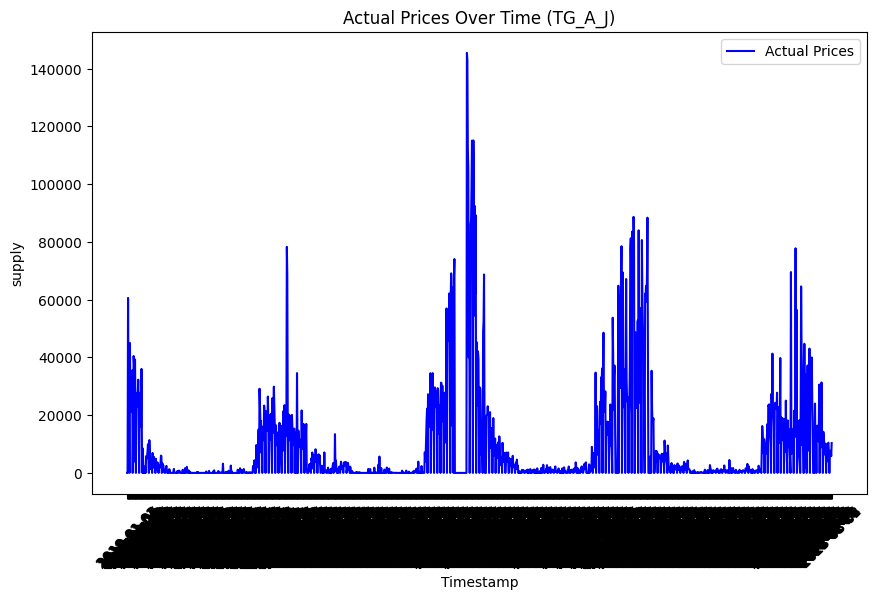

In [ ]:
import matplotlib.pyplot as plt

# Assuming TG_A_J is the dataframe for TG_A_J
# If not, replace TG_A_J with the appropriate dataframe variable

# Plotting the actual price values
plt.figure(figsize=(10, 6))
plt.plot(TG_A_J['timestamp'], TG_A_J['supply'], label='Actual Prices', color='blue')

# Adding labels and title
plt.xlabel('Timestamp')
plt.ylabel('supply')
plt.title('Actual Prices Over Time (TG_A_J)')
plt.legend()
plt.xticks(rotation=45)

# Display the plot
plt.show()


#supply_lstm

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime, timedelta

# Function to prepare the dataset for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# List of dataframes
dataframes = [TG_A_J, TG_A_S, TG_B_J, TG_B_S, TG_C_J, TG_C_S, TG_D_J, TG_D_S, TG_E_J, TG_E_S,
              CR_A_J, CR_B_J, CR_C_J, CR_D_J, CR_D_S, CR_E_J, CR_E_S,
              CB_A_J, CB_A_S, CB_D_J, CB_E_J,
              RD_A_J, RD_A_S, RD_C_S, RD_D_J, RD_D_S, RD_E_J, RD_E_S,
              BC_A_J, BC_A_S, BC_B_J, BC_B_S, BC_C_J, BC_C_S, BC_D_J, BC_E_J, BC_E_S,
              CB_F_J, RD_F_J]

# Initialize a dictionary to store predicted DataFrames
predicted_dfs = {}

# Loop through each dataframe
for i, df in enumerate(dataframes):
    # Convert timestamp to datetime and add a new column
    df['datetime'] = pd.to_datetime(df['timestamp'])

    # Extract relevant columns
    data = df[['datetime', 'supply']]

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    data[['supply']] = scaler.fit_transform(data[['supply']])

    # Set the look-back period (you can adjust this)
    look_back = 1500

    # Create the dataset
    X, Y = create_dataset(data[['supply']].values, look_back)

    # Reshape input to be [samples, time steps, features]
    X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

    # Build the LSTM model with early stopping
    model = Sequential()
    model.add(LSTM(units=50, input_shape=(1, look_back)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Set up early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Fit the model with early stopping
    model.fit(X, Y, epochs=50, batch_size=1, verbose=2, callbacks=[early_stopping])

    # Generate future timestamps from 2023-03-04 to 2023-03-31
    future_dates = pd.date_range(start='2023-03-04', end='2023-03-31')

    # Make predictions for the future dates
    predicted_prices_normalized = []

    for j in range(len(future_dates)):
        input_data = data['supply'][-look_back:].values.reshape(1, 1, look_back)
        predicted_price_normalized = model.predict(input_data)[0, 0]
        predicted_prices_normalized.append(predicted_price_normalized)
        data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)

    # Inverse transform the predicted prices to get the actual values
    predicted_prices = scaler.inverse_transform(np.array(predicted_prices_normalized).reshape(-1, 1))

    # Create a DataFrame for the predicted prices and corresponding timestamps
    predicted_df = pd.DataFrame(index=future_dates, data={'predicted_supply': predicted_prices.flatten()})

    # Rename the first column in predicted_df to 'timestamp'
    predicted_df = predicted_df.rename(columns={'predicted_supply': 'supply'})

    # Add the 'timestamp' column to predicted_df
    predicted_df['timestamp'] = predicted_df.index

    # Store the result in the dictionary
    predicted_dfs[f'predicted_df{i+1}'] = predicted_df

# Display the first few rows of the first predicted dataframe
print(predicted_dfs['predicted_df1'].head())


<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 2s - loss: 0.0080 - 2s/epoch - 99ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0027 - 153ms/epoch - 7ms/step
Epoch 3/50


23/23 - 0s - loss: 9.9676e-04 - 151ms/epoch - 7ms/step
Epoch 4/50


23/23 - 0s - loss: 3.1832e-04 - 137ms/epoch - 6ms/step
Epoch 5/50


23/23 - 0s - loss: 8.9766e-05 - 154ms/epoch - 7ms/step
Epoch 6/50


23/23 - 0s - loss: 2.9232e-05 - 144ms/epoch - 6ms/step
Epoch 7/50


23/23 - 0s - loss: 1.9044e-05 - 141ms/epoch - 6ms/step
Epoch 8/50


23/23 - 0s - loss: 7.2006e-06 - 156ms/epoch - 7ms/step
Epoch 9/50


23/23 - 0s - loss: 1.0546e-05 - 150ms/epoch - 7ms/step
Epoch 10/50


23/23 - 0s - loss: 7.0032e-06 - 142ms/epoch - 6ms/step
Epoch 11/50


23/23 - 0s - loss: 1.0114e-05 - 163ms/epoch - 7ms/step
Epoch 12/50


23/23 - 0s - loss: 1.4297e-05 - 163ms/epoch - 7ms/step
Epoch 13/50


23/23 - 0s - loss: 8.0309e-06 - 131ms/epoch - 6ms/step
Epoch 14/50


23/23 - 0s - loss: 3.8569e-06 - 126ms/epoch - 5ms/step
Epoch 15/50


23/23 - 0s - loss: 9.4557e-06 - 127ms/epoch - 6ms/step
Epoch 16/50


23/23 - 0s - loss: 2.0818e-05 - 125ms/epoch - 5ms/step
Epoch 17/50


23/23 - 0s - loss: 2.4919e-05 - 127ms/epoch - 6ms/step
Epoch 18/50


23/23 - 0s - loss: 5.4489e-05 - 125ms/epoch - 5ms/step
Epoch 19/50


23/23 - 0s - loss: 2.4190e-04 - 138ms/epoch - 6ms/step
Epoch 20/50


23/23 - 0s - loss: 2.2663e-04 - 123ms/epoch - 5ms/step
Epoch 21/50


23/23 - 0s - loss: 2.9538e-04 - 120ms/epoch - 5ms/step
Epoch 22/50


23/23 - 0s - loss: 1.6421e-04 - 114ms/epoch - 5ms/step
Epoch 23/50


23/23 - 0s - loss: 2.7195e-04 - 128ms/epoch - 6ms/step
Epoch 24/50


23/23 - 0s - loss: 2.3736e-04 - 121ms/epoch - 5ms/step
Epoch 25/50


23/23 - 0s - loss: 7.1742e-05 - 114ms/epoch - 5ms/step
Epoch 26/50


23/23 - 0s - loss: 6.2463e-05 - 123ms/epoch - 5ms/step
Epoch 27/50


23/23 - 0s - loss: 5.1586e-05 - 145ms/epoch - 6ms/step
Epoch 28/50


23/23 - 0s - loss: 2.7952e-05 - 129ms/epoch - 6ms/step
Epoch 29/50


23/23 - 0s - loss: 2.7743e-05 - 143ms/epoch - 6ms/step
Epoch 30/50


23/23 - 0s - loss: 1.4396e-05 - 133ms/epoch - 6ms/step
Epoch 31/50


23/23 - 0s - loss: 1.3763e-05 - 131ms/epoch - 6ms/step
Epoch 32/50


23/23 - 0s - loss: 7.0876e-06 - 127ms/epoch - 6ms/step
Epoch 33/50


23/23 - 0s - loss: 1.5118e-05 - 123ms/epoch - 5ms/step
Epoch 34/50


23/23 - 0s - loss: 1.4478e-05 - 154ms/epoch - 7ms/step
Epoch 35/50


23/23 - 0s - loss: 1.7107e-05 - 133ms/epoch - 6ms/step
Epoch 36/50


23/23 - 0s - loss: 1.2274e-05 - 126ms/epoch - 5ms/step
Epoch 37/50


23/23 - 0s - loss: 2.8458e-05 - 219ms/epoch - 10ms/step
Epoch 38/50


23/23 - 0s - loss: 8.5454e-05 - 339ms/epoch - 15ms/step
Epoch 39/50


23/23 - 0s - loss: 1.3255e-04 - 390ms/epoch - 17ms/step
Epoch 40/50


23/23 - 0s - loss: 4.2504e-04 - 240ms/epoch - 10ms/step
Epoch 41/50


23/23 - 0s - loss: 2.7397e-04 - 199ms/epoch - 9ms/step
Epoch 42/50


23/23 - 0s - loss: 4.4006e-04 - 198ms/epoch - 9ms/step
Epoch 43/50


23/23 - 0s - loss: 1.2081e-04 - 212ms/epoch - 9ms/step
Epoch 44/50


23/23 - 0s - loss: 4.1168e-05 - 209ms/epoch - 9ms/step
Epoch 45/50


23/23 - 0s - loss: 1.3200e-05 - 178ms/epoch - 8ms/step
Epoch 46/50


23/23 - 0s - loss: 1.8690e-05 - 186ms/epoch - 8ms/step
Epoch 47/50


23/23 - 0s - loss: 1.2435e-05 - 184ms/epoch - 8ms/step
Epoch 48/50


23/23 - 0s - loss: 4.2433e-06 - 187ms/epoch - 8ms/step
Epoch 49/50


23/23 - 0s - loss: 3.3362e-06 - 196ms/epoch - 9ms/step
Epoch 50/50


23/23 - 0s - loss: 2.2914e-06 - 205ms/epoch - 9ms/step
1/1 [==============================] - 0s 33ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

Epoch 1/50


23/23 - 2s - loss: 0.0433 - 2s/epoch - 82ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0084 - 126ms/epoch - 5ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0031 - 121ms/epoch - 5ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0023 - 124ms/epoch - 5ms/step
Epoch 5/50


23/23 - 0s - loss: 0.0015 - 128ms/epoch - 6ms/step
Epoch 6/50


23/23 - 0s - loss: 9.0071e-04 - 124ms/epoch - 5ms/step
Epoch 7/50


23/23 - 0s - loss: 5.2347e-04 - 132ms/epoch - 6ms/step
Epoch 8/50


23/23 - 0s - loss: 4.4345e-04 - 257ms/epoch - 11ms/step
Epoch 9/50


23/23 - 0s - loss: 3.2856e-04 - 215ms/epoch - 9ms/step
Epoch 10/50


23/23 - 0s - loss: 2.5750e-04 - 246ms/epoch - 11ms/step
Epoch 11/50


23/23 - 0s - loss: 1.8062e-04 - 162ms/epoch - 7ms/step
Epoch 12/50


23/23 - 0s - loss: 1.1194e-04 - 134ms/epoch - 6ms/step
Epoch 13/50


23/23 - 0s - loss: 8.9718e-05 - 138ms/epoch - 6ms/step
Epoch 14/50


23/23 - 0s - loss: 5.8463e-05 - 133ms/epoch - 6ms/step
Epoch 15/50


23/23 - 0s - loss: 3.4023e-05 - 135ms/epoch - 6ms/step
Epoch 16/50


23/23 - 0s - loss: 2.7526e-05 - 126ms/epoch - 5ms/step
Epoch 17/50


23/23 - 0s - loss: 1.5868e-05 - 128ms/epoch - 6ms/step
Epoch 18/50


23/23 - 0s - loss: 8.9064e-06 - 129ms/epoch - 6ms/step
Epoch 19/50


23/23 - 0s - loss: 1.5884e-05 - 133ms/epoch - 6ms/step
Epoch 20/50


23/23 - 0s - loss: 1.4622e-05 - 141ms/epoch - 6ms/step
Epoch 21/50


23/23 - 0s - loss: 8.6505e-06 - 120ms/epoch - 5ms/step
Epoch 22/50


23/23 - 0s - loss: 1.1040e-05 - 118ms/epoch - 5ms/step
Epoch 23/50


23/23 - 0s - loss: 3.3482e-06 - 130ms/epoch - 6ms/step
Epoch 24/50


23/23 - 0s - loss: 1.4235e-06 - 127ms/epoch - 6ms/step
Epoch 25/50


23/23 - 0s - loss: 9.5799e-07 - 133ms/epoch - 6ms/step
Epoch 26/50


23/23 - 0s - loss: 6.3561e-07 - 126ms/epoch - 5ms/step
Epoch 27/50


23/23 - 0s - loss: 4.3408e-07 - 136ms/epoch - 6ms/step
Epoch 28/50


23/23 - 0s - loss: 7.6350e-07 - 139ms/epoch - 6ms/step
Epoch 29/50


23/23 - 0s - loss: 4.1872e-07 - 130ms/epoch - 6ms/step
Epoch 30/50


23/23 - 0s - loss: 1.9374e-07 - 136ms/epoch - 6ms/step
Epoch 31/50


23/23 - 0s - loss: 8.4722e-08 - 126ms/epoch - 5ms/step
Epoch 32/50


23/23 - 0s - loss: 5.7154e-08 - 145ms/epoch - 6ms/step
Epoch 33/50


23/23 - 0s - loss: 4.3649e-08 - 137ms/epoch - 6ms/step
Epoch 34/50


23/23 - 0s - loss: 5.7976e-08 - 139ms/epoch - 6ms/step
Epoch 35/50


23/23 - 0s - loss: 3.4695e-08 - 151ms/epoch - 7ms/step
Epoch 36/50


23/23 - 0s - loss: 4.4320e-08 - 138ms/epoch - 6ms/step
Epoch 37/50


23/23 - 0s - loss: 9.2353e-08 - 149ms/epoch - 6ms/step
Epoch 38/50


23/23 - 0s - loss: 1.4461e-07 - 133ms/epoch - 6ms/step
Epoch 39/50


23/23 - 0s - loss: 2.7522e-07 - 137ms/epoch - 6ms/step
Epoch 40/50


23/23 - 0s - loss: 2.5052e-07 - 144ms/epoch - 6ms/step
Epoch 41/50


23/23 - 0s - loss: 2.8721e-07 - 131ms/epoch - 6ms/step
Epoch 42/50


23/23 - 0s - loss: 4.4285e-07 - 170ms/epoch - 7ms/step
Epoch 43/50


23/23 - 0s - loss: 7.7238e-07 - 133ms/epoch - 6ms/step
Epoch 44/50


23/23 - 0s - loss: 2.5062e-06 - 199ms/epoch - 9ms/step
Epoch 45/50


23/23 - 0s - loss: 2.0359e-06 - 193ms/epoch - 8ms/step
Epoch 46/50


23/23 - 0s - loss: 1.3230e-06 - 220ms/epoch - 10ms/step
Epoch 47/50


23/23 - 0s - loss: 9.1525e-07 - 184ms/epoch - 8ms/step
Epoch 48/50


23/23 - 0s - loss: 1.2889e-06 - 211ms/epoch - 9ms/step
Epoch 49/50


23/23 - 0s - loss: 1.7896e-06 - 201ms/epoch - 9ms/step
Epoch 50/50


23/23 - 0s - loss: 1.9638e-06 - 189ms/epoch - 8ms/step
1/1 [==============================] - 0s 31ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 2s - loss: 0.0267 - 2s/epoch - 80ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0055 - 123ms/epoch - 5ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0020 - 132ms/epoch - 6ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0017 - 126ms/epoch - 5ms/step
Epoch 5/50


23/23 - 0s - loss: 0.0011 - 129ms/epoch - 6ms/step
Epoch 6/50


23/23 - 0s - loss: 0.0011 - 123ms/epoch - 5ms/step
Epoch 7/50


23/23 - 0s - loss: 8.0910e-04 - 123ms/epoch - 5ms/step
Epoch 8/50


23/23 - 0s - loss: 5.2809e-04 - 130ms/epoch - 6ms/step
Epoch 9/50


23/23 - 0s - loss: 2.5783e-04 - 133ms/epoch - 6ms/step
Epoch 10/50


23/23 - 0s - loss: 2.1007e-04 - 126ms/epoch - 5ms/step
Epoch 11/50


23/23 - 0s - loss: 1.8796e-04 - 132ms/epoch - 6ms/step
Epoch 12/50


23/23 - 0s - loss: 6.1506e-05 - 132ms/epoch - 6ms/step
Epoch 13/50


23/23 - 0s - loss: 7.3444e-05 - 142ms/epoch - 6ms/step
Epoch 14/50


23/23 - 0s - loss: 1.1683e-04 - 128ms/epoch - 6ms/step
Epoch 15/50


23/23 - 0s - loss: 4.5633e-05 - 120ms/epoch - 5ms/step
Epoch 16/50


23/23 - 0s - loss: 5.5291e-05 - 139ms/epoch - 6ms/step
Epoch 17/50


23/23 - 0s - loss: 2.1387e-05 - 124ms/epoch - 5ms/step
Epoch 18/50


23/23 - 0s - loss: 3.7605e-05 - 168ms/epoch - 7ms/step
Epoch 19/50


23/23 - 0s - loss: 2.2374e-05 - 158ms/epoch - 7ms/step
Epoch 20/50


23/23 - 0s - loss: 4.1539e-05 - 145ms/epoch - 6ms/step
Epoch 21/50


23/23 - 0s - loss: 3.4809e-05 - 155ms/epoch - 7ms/step
Epoch 22/50


23/23 - 0s - loss: 2.0064e-05 - 145ms/epoch - 6ms/step
Epoch 23/50


23/23 - 0s - loss: 1.9488e-05 - 142ms/epoch - 6ms/step
Epoch 24/50


23/23 - 0s - loss: 1.1351e-05 - 137ms/epoch - 6ms/step
Epoch 25/50


23/23 - 0s - loss: 2.1259e-05 - 151ms/epoch - 7ms/step
Epoch 26/50


23/23 - 0s - loss: 2.8333e-05 - 164ms/epoch - 7ms/step
Epoch 27/50


23/23 - 0s - loss: 2.2163e-05 - 135ms/epoch - 6ms/step
Epoch 28/50


23/23 - 0s - loss: 1.0008e-05 - 148ms/epoch - 6ms/step
Epoch 29/50


23/23 - 0s - loss: 1.7752e-05 - 140ms/epoch - 6ms/step
Epoch 30/50


23/23 - 0s - loss: 1.6298e-05 - 142ms/epoch - 6ms/step
Epoch 31/50


23/23 - 0s - loss: 3.3179e-05 - 130ms/epoch - 6ms/step
Epoch 32/50


23/23 - 0s - loss: 2.8951e-05 - 155ms/epoch - 7ms/step
Epoch 33/50


23/23 - 0s - loss: 4.8355e-05 - 150ms/epoch - 7ms/step
Epoch 34/50


23/23 - 0s - loss: 4.7034e-05 - 149ms/epoch - 6ms/step
Epoch 35/50


23/23 - 0s - loss: 3.0076e-05 - 149ms/epoch - 6ms/step
Epoch 36/50


23/23 - 0s - loss: 3.1780e-05 - 149ms/epoch - 6ms/step
Epoch 37/50


23/23 - 0s - loss: 2.7890e-05 - 132ms/epoch - 6ms/step
Epoch 38/50


23/23 - 0s - loss: 6.0892e-05 - 156ms/epoch - 7ms/step
Epoch 39/50


23/23 - 0s - loss: 5.7275e-05 - 139ms/epoch - 6ms/step
Epoch 40/50


23/23 - 0s - loss: 1.4896e-04 - 146ms/epoch - 6ms/step
Epoch 41/50


23/23 - 0s - loss: 2.9439e-04 - 149ms/epoch - 6ms/step
Epoch 42/50


23/23 - 0s - loss: 4.1156e-04 - 168ms/epoch - 7ms/step
Epoch 43/50


23/23 - 0s - loss: 4.8839e-04 - 141ms/epoch - 6ms/step
Epoch 44/50


23/23 - 0s - loss: 2.7620e-04 - 142ms/epoch - 6ms/step
Epoch 45/50


23/23 - 0s - loss: 1.2590e-04 - 165ms/epoch - 7ms/step
Epoch 46/50


23/23 - 0s - loss: 1.1133e-04 - 231ms/epoch - 10ms/step
Epoch 47/50


23/23 - 0s - loss: 1.3612e-04 - 233ms/epoch - 10ms/step
Epoch 48/50


23/23 - 0s - loss: 5.2626e-05 - 238ms/epoch - 10ms/step
Epoch 49/50


23/23 - 0s - loss: 8.7073e-05 - 233ms/epoch - 10ms/step
Epoch 50/50


23/23 - 0s - loss: 8.5386e-05 - 227ms/epoch - 10ms/step
1/1 [==============================] - 0s 47ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 2s - loss: 0.0248 - 2s/epoch - 104ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0038 - 169ms/epoch - 7ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0020 - 150ms/epoch - 7ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0013 - 159ms/epoch - 7ms/step
Epoch 5/50


23/23 - 0s - loss: 0.0012 - 156ms/epoch - 7ms/step
Epoch 6/50


23/23 - 0s - loss: 3.8707e-04 - 134ms/epoch - 6ms/step
Epoch 7/50


23/23 - 0s - loss: 3.2521e-04 - 154ms/epoch - 7ms/step
Epoch 8/50


23/23 - 0s - loss: 3.6800e-04 - 148ms/epoch - 6ms/step
Epoch 9/50


23/23 - 0s - loss: 2.8066e-04 - 155ms/epoch - 7ms/step
Epoch 10/50


23/23 - 0s - loss: 1.5588e-04 - 156ms/epoch - 7ms/step
Epoch 11/50


23/23 - 0s - loss: 1.0498e-04 - 127ms/epoch - 6ms/step
Epoch 12/50


23/23 - 0s - loss: 8.5038e-05 - 148ms/epoch - 6ms/step
Epoch 13/50


23/23 - 0s - loss: 2.6368e-05 - 147ms/epoch - 6ms/step
Epoch 14/50


23/23 - 0s - loss: 1.5249e-05 - 156ms/epoch - 7ms/step
Epoch 15/50


23/23 - 0s - loss: 1.4205e-05 - 122ms/epoch - 5ms/step
Epoch 16/50


23/23 - 0s - loss: 8.6622e-06 - 119ms/epoch - 5ms/step
Epoch 17/50


23/23 - 0s - loss: 1.1437e-05 - 136ms/epoch - 6ms/step
Epoch 18/50


23/23 - 0s - loss: 4.4065e-05 - 127ms/epoch - 6ms/step
Epoch 19/50


23/23 - 0s - loss: 2.8190e-05 - 139ms/epoch - 6ms/step
Epoch 20/50


23/23 - 0s - loss: 3.2035e-05 - 133ms/epoch - 6ms/step
Epoch 21/50


23/23 - 0s - loss: 7.8996e-05 - 132ms/epoch - 6ms/step
Epoch 22/50


23/23 - 0s - loss: 2.0247e-04 - 162ms/epoch - 7ms/step
Epoch 23/50


23/23 - 0s - loss: 2.8263e-04 - 152ms/epoch - 7ms/step
Epoch 24/50


23/23 - 0s - loss: 4.7976e-04 - 158ms/epoch - 7ms/step
Epoch 25/50


23/23 - 0s - loss: 0.0013 - 143ms/epoch - 6ms/step
Epoch 26/50


23/23 - 0s - loss: 0.0016 - 151ms/epoch - 7ms/step
Epoch 27/50


23/23 - 0s - loss: 0.0013 - 168ms/epoch - 7ms/step
Epoch 28/50


23/23 - 0s - loss: 8.8907e-04 - 154ms/epoch - 7ms/step
Epoch 29/50


23/23 - 0s - loss: 7.7961e-04 - 158ms/epoch - 7ms/step
Epoch 30/50


23/23 - 0s - loss: 1.6613e-04 - 149ms/epoch - 6ms/step
Epoch 31/50


23/23 - 0s - loss: 3.1255e-04 - 163ms/epoch - 7ms/step
Epoch 32/50


23/23 - 0s - loss: 1.4711e-04 - 145ms/epoch - 6ms/step
Epoch 33/50


23/23 - 0s - loss: 6.4245e-05 - 162ms/epoch - 7ms/step
Epoch 34/50


23/23 - 0s - loss: 4.2916e-05 - 150ms/epoch - 7ms/step
Epoch 35/50


23/23 - 0s - loss: 1.4659e-05 - 144ms/epoch - 6ms/step
Epoch 36/50


23/23 - 0s - loss: 5.8666e-06 - 159ms/epoch - 7ms/step
Epoch 37/50


23/23 - 0s - loss: 1.0095e-05 - 151ms/epoch - 7ms/step
Epoch 38/50


23/23 - 0s - loss: 2.9200e-06 - 145ms/epoch - 6ms/step
Epoch 39/50


23/23 - 0s - loss: 3.7026e-06 - 144ms/epoch - 6ms/step
Epoch 40/50


23/23 - 0s - loss: 2.5686e-06 - 139ms/epoch - 6ms/step
Epoch 41/50


23/23 - 0s - loss: 3.5853e-06 - 145ms/epoch - 6ms/step
Epoch 42/50


23/23 - 0s - loss: 5.9962e-06 - 145ms/epoch - 6ms/step
Epoch 43/50


23/23 - 0s - loss: 4.1290e-06 - 158ms/epoch - 7ms/step
Epoch 44/50


23/23 - 0s - loss: 4.4714e-06 - 152ms/epoch - 7ms/step
Epoch 45/50


23/23 - 0s - loss: 2.2768e-06 - 144ms/epoch - 6ms/step
Epoch 46/50


23/23 - 0s - loss: 1.1332e-06 - 134ms/epoch - 6ms/step
Epoch 47/50


23/23 - 0s - loss: 9.8410e-07 - 137ms/epoch - 6ms/step
Epoch 48/50


23/23 - 0s - loss: 3.1305e-06 - 135ms/epoch - 6ms/step
Epoch 49/50


23/23 - 0s - loss: 1.6905e-06 - 142ms/epoch - 6ms/step
Epoch 50/50


23/23 - 0s - loss: 3.8681e-06 - 137ms/epoch - 6ms/step
1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 3s - loss: 0.0118 - 3s/epoch - 148ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0036 - 260ms/epoch - 11ms/step
Epoch 3/50


23/23 - 0s - loss: 6.0091e-04 - 259ms/epoch - 11ms/step
Epoch 4/50


23/23 - 0s - loss: 4.2447e-04 - 244ms/epoch - 11ms/step
Epoch 5/50


23/23 - 0s - loss: 2.8402e-04 - 245ms/epoch - 11ms/step
Epoch 6/50


23/23 - 0s - loss: 1.8292e-04 - 246ms/epoch - 11ms/step
Epoch 7/50


23/23 - 0s - loss: 1.5899e-04 - 234ms/epoch - 10ms/step
Epoch 8/50


23/23 - 0s - loss: 1.4385e-04 - 170ms/epoch - 7ms/step
Epoch 9/50


23/23 - 0s - loss: 6.8602e-05 - 142ms/epoch - 6ms/step
Epoch 10/50


23/23 - 0s - loss: 7.4371e-05 - 131ms/epoch - 6ms/step
Epoch 11/50


23/23 - 0s - loss: 3.1761e-05 - 137ms/epoch - 6ms/step
Epoch 12/50


23/23 - 0s - loss: 4.4912e-05 - 138ms/epoch - 6ms/step
Epoch 13/50


23/23 - 0s - loss: 2.6224e-05 - 138ms/epoch - 6ms/step
Epoch 14/50


23/23 - 0s - loss: 1.0033e-05 - 146ms/epoch - 6ms/step
Epoch 15/50


23/23 - 0s - loss: 1.0417e-05 - 146ms/epoch - 6ms/step
Epoch 16/50


23/23 - 0s - loss: 9.9051e-06 - 158ms/epoch - 7ms/step
Epoch 17/50


23/23 - 0s - loss: 5.8280e-06 - 155ms/epoch - 7ms/step
Epoch 18/50


23/23 - 0s - loss: 3.3006e-06 - 186ms/epoch - 8ms/step
Epoch 19/50


23/23 - 0s - loss: 1.7137e-06 - 159ms/epoch - 7ms/step
Epoch 20/50


23/23 - 0s - loss: 1.5312e-06 - 178ms/epoch - 8ms/step
Epoch 21/50


23/23 - 0s - loss: 7.6411e-07 - 161ms/epoch - 7ms/step
Epoch 22/50


23/23 - 0s - loss: 4.0750e-07 - 134ms/epoch - 6ms/step
Epoch 23/50


23/23 - 0s - loss: 5.3130e-07 - 163ms/epoch - 7ms/step
Epoch 24/50


23/23 - 0s - loss: 2.4036e-07 - 162ms/epoch - 7ms/step
Epoch 25/50


23/23 - 0s - loss: 1.5669e-07 - 152ms/epoch - 7ms/step
Epoch 26/50


23/23 - 0s - loss: 8.3879e-08 - 161ms/epoch - 7ms/step
Epoch 27/50


23/23 - 0s - loss: 4.0491e-08 - 156ms/epoch - 7ms/step
Epoch 28/50


23/23 - 0s - loss: 5.2109e-08 - 147ms/epoch - 6ms/step
Epoch 29/50


23/23 - 0s - loss: 2.8561e-08 - 136ms/epoch - 6ms/step
Epoch 30/50


23/23 - 0s - loss: 2.9512e-08 - 145ms/epoch - 6ms/step
Epoch 31/50


23/23 - 0s - loss: 2.1955e-08 - 160ms/epoch - 7ms/step
Epoch 32/50


23/23 - 0s - loss: 1.6712e-08 - 156ms/epoch - 7ms/step
Epoch 33/50


23/23 - 0s - loss: 1.1981e-08 - 164ms/epoch - 7ms/step
Epoch 34/50


23/23 - 0s - loss: 1.1684e-08 - 162ms/epoch - 7ms/step
Epoch 35/50


23/23 - 0s - loss: 1.1704e-08 - 161ms/epoch - 7ms/step
Epoch 36/50


23/23 - 0s - loss: 8.5023e-09 - 155ms/epoch - 7ms/step
Epoch 37/50


23/23 - 0s - loss: 1.0865e-08 - 160ms/epoch - 7ms/step
Epoch 38/50


23/23 - 0s - loss: 1.1724e-08 - 143ms/epoch - 6ms/step
Epoch 39/50


23/23 - 0s - loss: 8.8379e-09 - 169ms/epoch - 7ms/step
Epoch 40/50


23/23 - 0s - loss: 2.6167e-08 - 165ms/epoch - 7ms/step
Epoch 41/50


23/23 - 0s - loss: 1.3013e-08 - 156ms/epoch - 7ms/step
Epoch 42/50


23/23 - 0s - loss: 6.6842e-09 - 176ms/epoch - 8ms/step
Epoch 43/50


23/23 - 0s - loss: 4.9634e-09 - 156ms/epoch - 7ms/step
Epoch 44/50


23/23 - 0s - loss: 6.3498e-09 - 152ms/epoch - 7ms/step
Epoch 45/50


23/23 - 0s - loss: 5.1200e-09 - 169ms/epoch - 7ms/step
Epoch 46/50


23/23 - 0s - loss: 1.1362e-08 - 152ms/epoch - 7ms/step
Epoch 47/50


23/23 - 0s - loss: 5.5921e-09 - 129ms/epoch - 6ms/step
Epoch 48/50


23/23 - 0s - loss: 1.3687e-08 - 139ms/epoch - 6ms/step
Epoch 49/50


23/23 - 0s - loss: 1.5768e-08 - 122ms/epoch - 5ms/step
Epoch 50/50


23/23 - 0s - loss: 2.9871e-08 - 125ms/epoch - 5ms/step
1/1 [==============================] - 0s 26ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 3s - loss: 0.0130 - 3s/epoch - 133ms/step
Epoch 2/50


23/23 - 1s - loss: 0.0024 - 566ms/epoch - 25ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0013 - 481ms/epoch - 21ms/step
Epoch 4/50


23/23 - 0s - loss: 9.6461e-04 - 310ms/epoch - 13ms/step
Epoch 5/50


23/23 - 0s - loss: 8.6311e-04 - 206ms/epoch - 9ms/step
Epoch 6/50


23/23 - 0s - loss: 3.7135e-04 - 404ms/epoch - 18ms/step
Epoch 7/50


23/23 - 1s - loss: 2.4865e-04 - 607ms/epoch - 26ms/step
Epoch 8/50


23/23 - 0s - loss: 4.5673e-04 - 464ms/epoch - 20ms/step
Epoch 9/50


23/23 - 0s - loss: 2.8496e-04 - 309ms/epoch - 13ms/step
Epoch 10/50


23/23 - 0s - loss: 2.5015e-04 - 262ms/epoch - 11ms/step
Epoch 11/50


23/23 - 0s - loss: 1.9797e-04 - 245ms/epoch - 11ms/step
Epoch 12/50


23/23 - 0s - loss: 2.4375e-04 - 257ms/epoch - 11ms/step
Epoch 13/50


23/23 - 0s - loss: 1.6388e-04 - 265ms/epoch - 12ms/step
Epoch 14/50


23/23 - 0s - loss: 1.4844e-04 - 287ms/epoch - 12ms/step
Epoch 15/50


23/23 - 0s - loss: 6.2438e-05 - 265ms/epoch - 12ms/step
Epoch 16/50


23/23 - 0s - loss: 6.7410e-05 - 245ms/epoch - 11ms/step
Epoch 17/50


23/23 - 0s - loss: 1.2079e-04 - 233ms/epoch - 10ms/step
Epoch 18/50


23/23 - 0s - loss: 1.2268e-04 - 230ms/epoch - 10ms/step
Epoch 19/50


23/23 - 0s - loss: 3.7584e-05 - 204ms/epoch - 9ms/step
Epoch 20/50


23/23 - 0s - loss: 1.7787e-05 - 202ms/epoch - 9ms/step
Epoch 21/50


23/23 - 0s - loss: 5.8356e-06 - 206ms/epoch - 9ms/step
Epoch 22/50


23/23 - 0s - loss: 5.5376e-06 - 177ms/epoch - 8ms/step
Epoch 23/50


23/23 - 0s - loss: 1.0568e-05 - 187ms/epoch - 8ms/step
Epoch 24/50


23/23 - 0s - loss: 7.2702e-06 - 248ms/epoch - 11ms/step
Epoch 25/50


23/23 - 0s - loss: 1.3454e-05 - 197ms/epoch - 9ms/step
Epoch 26/50


23/23 - 0s - loss: 7.1932e-06 - 186ms/epoch - 8ms/step
Epoch 27/50


23/23 - 0s - loss: 6.4847e-06 - 232ms/epoch - 10ms/step
Epoch 28/50


23/23 - 0s - loss: 6.8650e-06 - 245ms/epoch - 11ms/step
Epoch 29/50


23/23 - 0s - loss: 1.3793e-05 - 255ms/epoch - 11ms/step
Epoch 30/50


23/23 - 0s - loss: 1.4713e-05 - 225ms/epoch - 10ms/step
Epoch 31/50


23/23 - 0s - loss: 1.6425e-05 - 235ms/epoch - 10ms/step
Epoch 32/50


23/23 - 0s - loss: 2.3181e-05 - 227ms/epoch - 10ms/step
Epoch 33/50


23/23 - 0s - loss: 6.0728e-05 - 238ms/epoch - 10ms/step
Epoch 34/50


23/23 - 0s - loss: 1.3863e-04 - 240ms/epoch - 10ms/step
Epoch 35/50


23/23 - 0s - loss: 1.2377e-04 - 240ms/epoch - 10ms/step
Epoch 36/50


23/23 - 0s - loss: 2.1108e-04 - 243ms/epoch - 11ms/step
Epoch 37/50


23/23 - 0s - loss: 1.6072e-04 - 231ms/epoch - 10ms/step
Epoch 38/50


23/23 - 0s - loss: 1.1474e-04 - 234ms/epoch - 10ms/step
Epoch 39/50


23/23 - 0s - loss: 1.4548e-04 - 234ms/epoch - 10ms/step
Epoch 40/50


23/23 - 0s - loss: 5.4507e-05 - 250ms/epoch - 11ms/step
Epoch 41/50


23/23 - 0s - loss: 2.6118e-05 - 237ms/epoch - 10ms/step
Epoch 42/50


23/23 - 0s - loss: 3.6190e-05 - 239ms/epoch - 10ms/step
Epoch 43/50


23/23 - 0s - loss: 3.6733e-05 - 239ms/epoch - 10ms/step
Epoch 44/50


23/23 - 0s - loss: 4.8555e-05 - 243ms/epoch - 11ms/step
Epoch 45/50


23/23 - 0s - loss: 4.4207e-05 - 209ms/epoch - 9ms/step
Epoch 46/50


23/23 - 0s - loss: 5.1891e-05 - 237ms/epoch - 10ms/step
Epoch 47/50


23/23 - 0s - loss: 9.2806e-05 - 188ms/epoch - 8ms/step
Epoch 48/50


23/23 - 0s - loss: 1.1741e-04 - 224ms/epoch - 10ms/step
Epoch 49/50


23/23 - 0s - loss: 1.7234e-04 - 188ms/epoch - 8ms/step
Epoch 50/50


23/23 - 0s - loss: 3.4697e-04 - 180ms/epoch - 8ms/step
1/1 [==============================] - 0s 36ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 2s - loss: 0.0195 - 2s/epoch - 85ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0018 - 167ms/epoch - 7ms/step
Epoch 3/50


23/23 - 0s - loss: 7.2590e-04 - 163ms/epoch - 7ms/step
Epoch 4/50


23/23 - 0s - loss: 5.3320e-04 - 164ms/epoch - 7ms/step
Epoch 5/50


23/23 - 0s - loss: 4.3016e-04 - 141ms/epoch - 6ms/step
Epoch 6/50


23/23 - 0s - loss: 3.5810e-04 - 140ms/epoch - 6ms/step
Epoch 7/50


23/23 - 0s - loss: 2.9360e-04 - 135ms/epoch - 6ms/step
Epoch 8/50


23/23 - 0s - loss: 2.2528e-04 - 138ms/epoch - 6ms/step
Epoch 9/50


23/23 - 0s - loss: 1.9817e-04 - 128ms/epoch - 6ms/step
Epoch 10/50


23/23 - 0s - loss: 1.7243e-04 - 130ms/epoch - 6ms/step
Epoch 11/50


23/23 - 0s - loss: 1.1683e-04 - 150ms/epoch - 7ms/step
Epoch 12/50


23/23 - 0s - loss: 1.3425e-04 - 134ms/epoch - 6ms/step
Epoch 13/50


23/23 - 0s - loss: 9.8145e-05 - 140ms/epoch - 6ms/step
Epoch 14/50


23/23 - 0s - loss: 7.0643e-05 - 135ms/epoch - 6ms/step
Epoch 15/50


23/23 - 0s - loss: 9.0349e-05 - 135ms/epoch - 6ms/step
Epoch 16/50


23/23 - 0s - loss: 5.7321e-05 - 138ms/epoch - 6ms/step
Epoch 17/50


23/23 - 0s - loss: 3.2329e-05 - 133ms/epoch - 6ms/step
Epoch 18/50


23/23 - 0s - loss: 2.2754e-05 - 132ms/epoch - 6ms/step
Epoch 19/50


23/23 - 0s - loss: 2.1133e-05 - 137ms/epoch - 6ms/step
Epoch 20/50


23/23 - 0s - loss: 1.1019e-05 - 137ms/epoch - 6ms/step
Epoch 21/50


23/23 - 0s - loss: 7.6906e-06 - 150ms/epoch - 7ms/step
Epoch 22/50


23/23 - 0s - loss: 6.6421e-06 - 148ms/epoch - 6ms/step
Epoch 23/50


23/23 - 0s - loss: 3.0593e-06 - 140ms/epoch - 6ms/step
Epoch 24/50


23/23 - 0s - loss: 1.1908e-06 - 145ms/epoch - 6ms/step
Epoch 25/50


23/23 - 0s - loss: 6.9601e-07 - 169ms/epoch - 7ms/step
Epoch 26/50


23/23 - 0s - loss: 6.3629e-07 - 148ms/epoch - 6ms/step
Epoch 27/50


23/23 - 0s - loss: 3.7063e-07 - 165ms/epoch - 7ms/step
Epoch 28/50


23/23 - 0s - loss: 2.8274e-07 - 159ms/epoch - 7ms/step
Epoch 29/50


23/23 - 0s - loss: 1.4917e-07 - 166ms/epoch - 7ms/step
Epoch 30/50


23/23 - 0s - loss: 9.1513e-08 - 154ms/epoch - 7ms/step
Epoch 31/50


23/23 - 0s - loss: 9.1179e-08 - 155ms/epoch - 7ms/step
Epoch 32/50


23/23 - 0s - loss: 3.1553e-08 - 152ms/epoch - 7ms/step
Epoch 33/50


23/23 - 0s - loss: 2.1215e-08 - 147ms/epoch - 6ms/step
Epoch 34/50


23/23 - 0s - loss: 2.1273e-08 - 173ms/epoch - 8ms/step
Epoch 35/50


23/23 - 0s - loss: 1.5652e-08 - 169ms/epoch - 7ms/step
Epoch 36/50


23/23 - 0s - loss: 6.3242e-09 - 153ms/epoch - 7ms/step
Epoch 37/50


23/23 - 0s - loss: 5.1442e-09 - 129ms/epoch - 6ms/step
Epoch 38/50


23/23 - 0s - loss: 5.5493e-09 - 133ms/epoch - 6ms/step
Epoch 39/50


23/23 - 0s - loss: 3.1480e-09 - 140ms/epoch - 6ms/step
Epoch 40/50


23/23 - 0s - loss: 2.2205e-09 - 150ms/epoch - 7ms/step
Epoch 41/50


23/23 - 0s - loss: 1.6488e-09 - 142ms/epoch - 6ms/step
Epoch 42/50


23/23 - 0s - loss: 2.5885e-09 - 144ms/epoch - 6ms/step
Epoch 43/50


23/23 - 0s - loss: 3.4184e-09 - 131ms/epoch - 6ms/step
Epoch 44/50


23/23 - 0s - loss: 3.0025e-09 - 143ms/epoch - 6ms/step
Epoch 45/50


23/23 - 0s - loss: 9.7429e-10 - 189ms/epoch - 8ms/step
Epoch 46/50


23/23 - 0s - loss: 1.8173e-09 - 215ms/epoch - 9ms/step
Epoch 47/50


23/23 - 0s - loss: 7.6106e-10 - 206ms/epoch - 9ms/step
Epoch 48/50


23/23 - 0s - loss: 3.1191e-10 - 228ms/epoch - 10ms/step
Epoch 49/50


23/23 - 0s - loss: 3.2997e-10 - 224ms/epoch - 10ms/step
Epoch 50/50


23/23 - 0s - loss: 2.6469e-10 - 248ms/epoch - 11ms/step
1/1 [==============================] - 0s 35ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 2s - loss: 0.0262 - 2s/epoch - 94ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0087 - 135ms/epoch - 6ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0050 - 143ms/epoch - 6ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0022 - 137ms/epoch - 6ms/step
Epoch 5/50


23/23 - 0s - loss: 0.0016 - 133ms/epoch - 6ms/step
Epoch 6/50


23/23 - 0s - loss: 6.9966e-04 - 129ms/epoch - 6ms/step
Epoch 7/50


23/23 - 0s - loss: 6.9064e-04 - 138ms/epoch - 6ms/step
Epoch 8/50


23/23 - 0s - loss: 7.5295e-04 - 132ms/epoch - 6ms/step
Epoch 9/50


23/23 - 0s - loss: 3.6797e-04 - 138ms/epoch - 6ms/step
Epoch 10/50


23/23 - 0s - loss: 3.1474e-04 - 164ms/epoch - 7ms/step
Epoch 11/50


23/23 - 0s - loss: 1.3491e-04 - 158ms/epoch - 7ms/step
Epoch 12/50


23/23 - 0s - loss: 8.7517e-05 - 160ms/epoch - 7ms/step
Epoch 13/50


23/23 - 0s - loss: 3.0859e-05 - 152ms/epoch - 7ms/step
Epoch 14/50


23/23 - 0s - loss: 4.6358e-05 - 158ms/epoch - 7ms/step
Epoch 15/50


23/23 - 0s - loss: 3.6823e-05 - 169ms/epoch - 7ms/step
Epoch 16/50


23/23 - 0s - loss: 1.8030e-05 - 166ms/epoch - 7ms/step
Epoch 17/50


23/23 - 0s - loss: 1.7049e-05 - 191ms/epoch - 8ms/step
Epoch 18/50


23/23 - 0s - loss: 1.5604e-05 - 177ms/epoch - 8ms/step
Epoch 19/50


23/23 - 0s - loss: 7.0956e-06 - 169ms/epoch - 7ms/step
Epoch 20/50


23/23 - 0s - loss: 4.2555e-06 - 163ms/epoch - 7ms/step
Epoch 21/50


23/23 - 0s - loss: 2.1071e-06 - 165ms/epoch - 7ms/step
Epoch 22/50


23/23 - 0s - loss: 2.4996e-06 - 160ms/epoch - 7ms/step
Epoch 23/50


23/23 - 0s - loss: 2.6076e-06 - 179ms/epoch - 8ms/step
Epoch 24/50


23/23 - 0s - loss: 1.2024e-06 - 177ms/epoch - 8ms/step
Epoch 25/50


23/23 - 0s - loss: 1.0932e-06 - 171ms/epoch - 7ms/step
Epoch 26/50


23/23 - 0s - loss: 1.1214e-06 - 167ms/epoch - 7ms/step
Epoch 27/50


23/23 - 0s - loss: 1.2033e-06 - 182ms/epoch - 8ms/step
Epoch 28/50


23/23 - 0s - loss: 6.7525e-07 - 190ms/epoch - 8ms/step
Epoch 29/50


23/23 - 0s - loss: 1.0348e-06 - 175ms/epoch - 8ms/step
Epoch 30/50


23/23 - 0s - loss: 5.4537e-07 - 175ms/epoch - 8ms/step
Epoch 31/50


23/23 - 0s - loss: 5.1228e-07 - 175ms/epoch - 8ms/step
Epoch 32/50


23/23 - 0s - loss: 8.0659e-07 - 170ms/epoch - 7ms/step
Epoch 33/50


23/23 - 0s - loss: 7.4963e-07 - 173ms/epoch - 8ms/step
Epoch 34/50


23/23 - 0s - loss: 1.4017e-06 - 164ms/epoch - 7ms/step
Epoch 35/50


23/23 - 0s - loss: 2.8290e-06 - 147ms/epoch - 6ms/step
Epoch 36/50


23/23 - 0s - loss: 2.6804e-06 - 148ms/epoch - 6ms/step
Epoch 37/50


23/23 - 0s - loss: 8.6479e-06 - 142ms/epoch - 6ms/step
Epoch 38/50


23/23 - 0s - loss: 2.1377e-05 - 141ms/epoch - 6ms/step
Epoch 39/50


23/23 - 0s - loss: 8.6137e-05 - 132ms/epoch - 6ms/step
Epoch 40/50


23/23 - 0s - loss: 4.0438e-04 - 130ms/epoch - 6ms/step
Epoch 41/50


23/23 - 0s - loss: 8.7786e-04 - 184ms/epoch - 8ms/step
Epoch 42/50


23/23 - 0s - loss: 3.8779e-04 - 142ms/epoch - 6ms/step
Epoch 43/50


23/23 - 0s - loss: 1.6517e-04 - 139ms/epoch - 6ms/step
Epoch 44/50


23/23 - 0s - loss: 8.0837e-05 - 155ms/epoch - 7ms/step
Epoch 45/50


23/23 - 0s - loss: 1.4628e-04 - 156ms/epoch - 7ms/step
Epoch 46/50


23/23 - 0s - loss: 1.1324e-04 - 147ms/epoch - 6ms/step
Epoch 47/50


23/23 - 0s - loss: 1.4331e-04 - 193ms/epoch - 8ms/step
Epoch 48/50


23/23 - 0s - loss: 2.0536e-04 - 162ms/epoch - 7ms/step
Epoch 49/50


23/23 - 0s - loss: 2.7801e-04 - 159ms/epoch - 7ms/step
Epoch 50/50


23/23 - 0s - loss: 2.1245e-04 - 160ms/epoch - 7ms/step
1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 3s - loss: 0.0110 - 3s/epoch - 127ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0032 - 244ms/epoch - 11ms/step
Epoch 3/50


23/23 - 0s - loss: 7.0718e-04 - 236ms/epoch - 10ms/step
Epoch 4/50


23/23 - 0s - loss: 3.6499e-04 - 224ms/epoch - 10ms/step
Epoch 5/50


23/23 - 0s - loss: 2.1443e-04 - 200ms/epoch - 9ms/step
Epoch 6/50


23/23 - 0s - loss: 9.5062e-05 - 160ms/epoch - 7ms/step
Epoch 7/50


23/23 - 0s - loss: 6.4159e-05 - 146ms/epoch - 6ms/step
Epoch 8/50


23/23 - 0s - loss: 3.3398e-05 - 141ms/epoch - 6ms/step
Epoch 9/50


23/23 - 0s - loss: 1.6833e-05 - 160ms/epoch - 7ms/step
Epoch 10/50


23/23 - 0s - loss: 5.2450e-06 - 170ms/epoch - 7ms/step
Epoch 11/50


23/23 - 0s - loss: 4.4430e-06 - 164ms/epoch - 7ms/step
Epoch 12/50


23/23 - 0s - loss: 3.7505e-06 - 157ms/epoch - 7ms/step
Epoch 13/50


23/23 - 0s - loss: 2.5042e-06 - 148ms/epoch - 6ms/step
Epoch 14/50


23/23 - 0s - loss: 2.0816e-06 - 156ms/epoch - 7ms/step
Epoch 15/50


23/23 - 0s - loss: 2.1519e-06 - 155ms/epoch - 7ms/step
Epoch 16/50


23/23 - 0s - loss: 1.2911e-06 - 139ms/epoch - 6ms/step
Epoch 17/50


23/23 - 0s - loss: 1.1877e-06 - 148ms/epoch - 6ms/step
Epoch 18/50


23/23 - 0s - loss: 1.4696e-06 - 144ms/epoch - 6ms/step
Epoch 19/50


23/23 - 0s - loss: 1.3999e-06 - 136ms/epoch - 6ms/step
Epoch 20/50


23/23 - 0s - loss: 1.7492e-06 - 141ms/epoch - 6ms/step
Epoch 21/50


23/23 - 0s - loss: 7.2172e-07 - 145ms/epoch - 6ms/step
Epoch 22/50


23/23 - 0s - loss: 4.6330e-07 - 145ms/epoch - 6ms/step
Epoch 23/50


23/23 - 0s - loss: 7.8206e-07 - 134ms/epoch - 6ms/step
Epoch 24/50


23/23 - 0s - loss: 6.5604e-07 - 144ms/epoch - 6ms/step
Epoch 25/50


23/23 - 0s - loss: 1.1349e-06 - 138ms/epoch - 6ms/step
Epoch 26/50


23/23 - 0s - loss: 1.4538e-06 - 135ms/epoch - 6ms/step
Epoch 27/50


23/23 - 0s - loss: 3.7444e-06 - 135ms/epoch - 6ms/step
Epoch 28/50


23/23 - 0s - loss: 8.2349e-06 - 143ms/epoch - 6ms/step
Epoch 29/50


23/23 - 0s - loss: 1.0425e-05 - 161ms/epoch - 7ms/step
Epoch 30/50


23/23 - 0s - loss: 1.2663e-05 - 135ms/epoch - 6ms/step
Epoch 31/50


23/23 - 0s - loss: 1.5912e-05 - 159ms/epoch - 7ms/step
Epoch 32/50


23/23 - 0s - loss: 3.6608e-05 - 138ms/epoch - 6ms/step
Epoch 33/50


23/23 - 0s - loss: 1.8729e-05 - 124ms/epoch - 5ms/step
Epoch 34/50


23/23 - 0s - loss: 2.2520e-05 - 144ms/epoch - 6ms/step
Epoch 35/50


23/23 - 0s - loss: 3.5739e-05 - 139ms/epoch - 6ms/step
Epoch 36/50


23/23 - 0s - loss: 9.0565e-05 - 155ms/epoch - 7ms/step
Epoch 37/50


23/23 - 0s - loss: 6.4785e-05 - 167ms/epoch - 7ms/step
Epoch 38/50


23/23 - 0s - loss: 4.8447e-05 - 180ms/epoch - 8ms/step
Epoch 39/50


23/23 - 0s - loss: 2.8262e-05 - 159ms/epoch - 7ms/step
Epoch 40/50


23/23 - 0s - loss: 1.5261e-05 - 167ms/epoch - 7ms/step
Epoch 41/50


23/23 - 0s - loss: 9.0360e-06 - 163ms/epoch - 7ms/step
Epoch 42/50


23/23 - 0s - loss: 7.4397e-06 - 148ms/epoch - 6ms/step
Epoch 43/50


23/23 - 0s - loss: 1.6513e-05 - 153ms/epoch - 7ms/step
Epoch 44/50


23/23 - 0s - loss: 1.5778e-05 - 155ms/epoch - 7ms/step
Epoch 45/50


23/23 - 0s - loss: 7.1229e-06 - 144ms/epoch - 6ms/step
Epoch 46/50


23/23 - 0s - loss: 2.6749e-06 - 174ms/epoch - 8ms/step
Epoch 47/50


23/23 - 0s - loss: 2.4432e-06 - 165ms/epoch - 7ms/step
Epoch 48/50


23/23 - 0s - loss: 2.2906e-06 - 174ms/epoch - 8ms/step
Epoch 49/50


23/23 - 0s - loss: 4.3975e-06 - 164ms/epoch - 7ms/step
Epoch 50/50


23/23 - 0s - loss: 8.0484e-06 - 181ms/epoch - 8ms/step
1/1 [==============================] - 0s 21ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 4s - loss: 0.0204 - 4s/epoch - 160ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0081 - 258ms/epoch - 11ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0051 - 249ms/epoch - 11ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0024 - 248ms/epoch - 11ms/step
Epoch 5/50


23/23 - 0s - loss: 0.0014 - 253ms/epoch - 11ms/step
Epoch 6/50


23/23 - 0s - loss: 7.5206e-04 - 275ms/epoch - 12ms/step
Epoch 7/50


23/23 - 0s - loss: 6.6632e-04 - 231ms/epoch - 10ms/step
Epoch 8/50


23/23 - 0s - loss: 3.4006e-04 - 237ms/epoch - 10ms/step
Epoch 9/50


23/23 - 0s - loss: 2.0303e-04 - 255ms/epoch - 11ms/step
Epoch 10/50


23/23 - 0s - loss: 1.1087e-04 - 281ms/epoch - 12ms/step
Epoch 11/50


23/23 - 0s - loss: 6.9979e-05 - 252ms/epoch - 11ms/step
Epoch 12/50


23/23 - 0s - loss: 4.0195e-05 - 249ms/epoch - 11ms/step
Epoch 13/50


23/23 - 0s - loss: 4.9913e-05 - 250ms/epoch - 11ms/step
Epoch 14/50


23/23 - 0s - loss: 3.0265e-05 - 202ms/epoch - 9ms/step
Epoch 15/50


23/23 - 0s - loss: 1.9233e-05 - 186ms/epoch - 8ms/step
Epoch 16/50


23/23 - 0s - loss: 2.1059e-05 - 168ms/epoch - 7ms/step
Epoch 17/50


23/23 - 0s - loss: 2.2835e-05 - 170ms/epoch - 7ms/step
Epoch 18/50


23/23 - 0s - loss: 2.8925e-05 - 163ms/epoch - 7ms/step
Epoch 19/50


23/23 - 0s - loss: 1.6919e-05 - 169ms/epoch - 7ms/step
Epoch 20/50


23/23 - 0s - loss: 2.5510e-05 - 167ms/epoch - 7ms/step
Epoch 21/50


23/23 - 0s - loss: 3.6313e-05 - 176ms/epoch - 8ms/step
Epoch 22/50


23/23 - 0s - loss: 4.6649e-05 - 186ms/epoch - 8ms/step
Epoch 23/50


23/23 - 0s - loss: 2.3139e-05 - 177ms/epoch - 8ms/step
Epoch 24/50


23/23 - 0s - loss: 3.5016e-05 - 167ms/epoch - 7ms/step
Epoch 25/50


23/23 - 0s - loss: 3.3572e-05 - 191ms/epoch - 8ms/step
Epoch 26/50


23/23 - 0s - loss: 2.6122e-05 - 171ms/epoch - 7ms/step
Epoch 27/50


23/23 - 0s - loss: 1.5476e-05 - 169ms/epoch - 7ms/step
Epoch 28/50


23/23 - 0s - loss: 1.3026e-05 - 182ms/epoch - 8ms/step
Epoch 29/50


23/23 - 0s - loss: 1.6302e-05 - 158ms/epoch - 7ms/step
Epoch 30/50


23/23 - 0s - loss: 8.4122e-06 - 194ms/epoch - 8ms/step
Epoch 31/50


23/23 - 0s - loss: 6.6235e-06 - 165ms/epoch - 7ms/step
Epoch 32/50


23/23 - 0s - loss: 1.2142e-05 - 197ms/epoch - 9ms/step
Epoch 33/50


23/23 - 0s - loss: 3.8861e-05 - 159ms/epoch - 7ms/step
Epoch 34/50


23/23 - 0s - loss: 6.3944e-05 - 153ms/epoch - 7ms/step
Epoch 35/50


23/23 - 0s - loss: 5.9643e-05 - 138ms/epoch - 6ms/step
Epoch 36/50


23/23 - 0s - loss: 5.8188e-05 - 127ms/epoch - 6ms/step
Epoch 37/50


23/23 - 0s - loss: 1.3594e-04 - 141ms/epoch - 6ms/step
Epoch 38/50


23/23 - 0s - loss: 4.5488e-04 - 134ms/epoch - 6ms/step
Epoch 39/50


23/23 - 0s - loss: 0.0013 - 137ms/epoch - 6ms/step
Epoch 40/50


23/23 - 0s - loss: 0.0018 - 139ms/epoch - 6ms/step
Epoch 41/50


23/23 - 0s - loss: 4.8651e-04 - 130ms/epoch - 6ms/step
Epoch 42/50


23/23 - 0s - loss: 3.5392e-04 - 133ms/epoch - 6ms/step
Epoch 43/50


23/23 - 0s - loss: 1.5053e-04 - 137ms/epoch - 6ms/step
Epoch 44/50


23/23 - 0s - loss: 5.5723e-05 - 137ms/epoch - 6ms/step
Epoch 45/50


23/23 - 0s - loss: 2.6957e-05 - 139ms/epoch - 6ms/step
Epoch 46/50


23/23 - 0s - loss: 2.2330e-05 - 137ms/epoch - 6ms/step
Epoch 47/50


23/23 - 0s - loss: 1.7027e-05 - 138ms/epoch - 6ms/step
Epoch 48/50


23/23 - 0s - loss: 8.2297e-06 - 148ms/epoch - 6ms/step
Epoch 49/50


23/23 - 0s - loss: 4.1917e-06 - 134ms/epoch - 6ms/step
Epoch 50/50


23/23 - 0s - loss: 4.5317e-06 - 147ms/epoch - 6ms/step
1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 3s - loss: 0.0378 - 3s/epoch - 121ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0116 - 254ms/epoch - 11ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0046 - 262ms/epoch - 11ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0013 - 251ms/epoch - 11ms/step
Epoch 5/50


23/23 - 0s - loss: 4.3248e-04 - 234ms/epoch - 10ms/step
Epoch 6/50


23/23 - 0s - loss: 7.0656e-05 - 241ms/epoch - 10ms/step
Epoch 7/50


23/23 - 0s - loss: 9.8645e-05 - 224ms/epoch - 10ms/step
Epoch 8/50


23/23 - 0s - loss: 4.7392e-05 - 196ms/epoch - 9ms/step
Epoch 9/50


23/23 - 0s - loss: 2.5906e-05 - 204ms/epoch - 9ms/step
Epoch 10/50


23/23 - 0s - loss: 4.3937e-05 - 214ms/epoch - 9ms/step
Epoch 11/50


23/23 - 0s - loss: 5.9406e-05 - 232ms/epoch - 10ms/step
Epoch 12/50


23/23 - 0s - loss: 1.1362e-04 - 181ms/epoch - 8ms/step
Epoch 13/50


23/23 - 0s - loss: 2.1195e-04 - 199ms/epoch - 9ms/step
Epoch 14/50


23/23 - 0s - loss: 2.9427e-04 - 207ms/epoch - 9ms/step
Epoch 15/50


23/23 - 0s - loss: 3.6694e-04 - 216ms/epoch - 9ms/step
Epoch 16/50


23/23 - 0s - loss: 5.2525e-04 - 213ms/epoch - 9ms/step
Epoch 17/50


23/23 - 0s - loss: 6.8833e-04 - 217ms/epoch - 9ms/step
Epoch 18/50


23/23 - 0s - loss: 0.0024 - 196ms/epoch - 9ms/step
Epoch 19/50


23/23 - 0s - loss: 0.0017 - 218ms/epoch - 9ms/step
Epoch 20/50


23/23 - 0s - loss: 0.0020 - 193ms/epoch - 8ms/step
Epoch 21/50


23/23 - 0s - loss: 0.0016 - 211ms/epoch - 9ms/step
Epoch 22/50


23/23 - 0s - loss: 0.0019 - 238ms/epoch - 10ms/step
Epoch 23/50


23/23 - 0s - loss: 0.0021 - 239ms/epoch - 10ms/step
Epoch 24/50


23/23 - 0s - loss: 0.0018 - 263ms/epoch - 11ms/step
Epoch 25/50


23/23 - 0s - loss: 0.0023 - 246ms/epoch - 11ms/step
Epoch 26/50


23/23 - 0s - loss: 9.7724e-04 - 159ms/epoch - 7ms/step
Epoch 27/50


23/23 - 0s - loss: 5.2824e-04 - 132ms/epoch - 6ms/step
Epoch 28/50


23/23 - 0s - loss: 2.4335e-04 - 137ms/epoch - 6ms/step
Epoch 29/50


23/23 - 0s - loss: 1.3219e-04 - 129ms/epoch - 6ms/step
Epoch 30/50


23/23 - 0s - loss: 1.1658e-04 - 127ms/epoch - 6ms/step
Epoch 31/50


23/23 - 0s - loss: 1.8383e-04 - 144ms/epoch - 6ms/step
Epoch 32/50


23/23 - 0s - loss: 2.2947e-04 - 153ms/epoch - 7ms/step
Epoch 33/50


23/23 - 0s - loss: 1.6210e-04 - 162ms/epoch - 7ms/step
Epoch 34/50


23/23 - 0s - loss: 7.8783e-05 - 160ms/epoch - 7ms/step
Epoch 35/50


23/23 - 0s - loss: 6.7625e-05 - 164ms/epoch - 7ms/step
Epoch 36/50


23/23 - 0s - loss: 4.1676e-05 - 160ms/epoch - 7ms/step
Epoch 37/50


23/23 - 0s - loss: 1.9914e-05 - 148ms/epoch - 6ms/step
Epoch 38/50


23/23 - 0s - loss: 3.1870e-05 - 177ms/epoch - 8ms/step
Epoch 39/50


23/23 - 0s - loss: 5.1927e-05 - 156ms/epoch - 7ms/step
Epoch 40/50


23/23 - 0s - loss: 8.4204e-05 - 162ms/epoch - 7ms/step
Epoch 41/50


23/23 - 0s - loss: 5.3867e-05 - 153ms/epoch - 7ms/step
Epoch 42/50


23/23 - 0s - loss: 7.2277e-05 - 149ms/epoch - 6ms/step
Epoch 43/50


23/23 - 0s - loss: 5.8670e-05 - 148ms/epoch - 6ms/step
Epoch 44/50


23/23 - 0s - loss: 9.1360e-05 - 161ms/epoch - 7ms/step
Epoch 45/50


23/23 - 0s - loss: 6.9551e-05 - 192ms/epoch - 8ms/step
Epoch 46/50


23/23 - 0s - loss: 8.0042e-05 - 154ms/epoch - 7ms/step
Epoch 47/50


23/23 - 0s - loss: 8.6221e-05 - 159ms/epoch - 7ms/step
Epoch 48/50


23/23 - 0s - loss: 1.4687e-04 - 173ms/epoch - 8ms/step
Epoch 49/50


23/23 - 0s - loss: 4.7288e-04 - 175ms/epoch - 8ms/step
Epoch 50/50


23/23 - 0s - loss: 0.0010 - 182ms/epoch - 8ms/step
1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 2s - loss: 0.0088 - 2s/epoch - 83ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0162 - 143ms/epoch - 6ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0042 - 139ms/epoch - 6ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0014 - 150ms/epoch - 7ms/step
Epoch 5/50


23/23 - 0s - loss: 5.7295e-04 - 136ms/epoch - 6ms/step
Epoch 6/50


23/23 - 0s - loss: 1.3096e-04 - 167ms/epoch - 7ms/step
Epoch 7/50


23/23 - 0s - loss: 7.1785e-05 - 247ms/epoch - 11ms/step
Epoch 8/50


23/23 - 0s - loss: 5.3843e-05 - 240ms/epoch - 10ms/step
Epoch 9/50


23/23 - 0s - loss: 2.3774e-05 - 252ms/epoch - 11ms/step
Epoch 10/50


23/23 - 0s - loss: 8.2795e-06 - 245ms/epoch - 11ms/step
Epoch 11/50


23/23 - 0s - loss: 6.4581e-06 - 254ms/epoch - 11ms/step
Epoch 12/50


23/23 - 0s - loss: 4.7539e-06 - 245ms/epoch - 11ms/step
Epoch 13/50


23/23 - 0s - loss: 6.8128e-06 - 265ms/epoch - 12ms/step
Epoch 14/50


23/23 - 0s - loss: 3.7338e-06 - 242ms/epoch - 11ms/step
Epoch 15/50


23/23 - 0s - loss: 1.2895e-06 - 198ms/epoch - 9ms/step
Epoch 16/50


23/23 - 0s - loss: 9.8796e-07 - 208ms/epoch - 9ms/step
Epoch 17/50


23/23 - 0s - loss: 1.2392e-06 - 200ms/epoch - 9ms/step
Epoch 18/50


23/23 - 0s - loss: 1.1128e-06 - 193ms/epoch - 8ms/step
Epoch 19/50


23/23 - 0s - loss: 1.2644e-06 - 212ms/epoch - 9ms/step
Epoch 20/50


23/23 - 0s - loss: 1.6351e-06 - 215ms/epoch - 9ms/step
Epoch 21/50


23/23 - 0s - loss: 3.0567e-06 - 196ms/epoch - 9ms/step
Epoch 22/50


23/23 - 0s - loss: 7.3188e-06 - 180ms/epoch - 8ms/step
Epoch 23/50


23/23 - 0s - loss: 1.6135e-05 - 188ms/epoch - 8ms/step
Epoch 24/50


23/23 - 0s - loss: 2.1107e-05 - 212ms/epoch - 9ms/step
Epoch 25/50


23/23 - 0s - loss: 2.6846e-05 - 242ms/epoch - 11ms/step
Epoch 26/50


23/23 - 0s - loss: 8.0919e-05 - 244ms/epoch - 11ms/step
Epoch 27/50


23/23 - 0s - loss: 8.3007e-05 - 234ms/epoch - 10ms/step
Epoch 28/50


23/23 - 0s - loss: 7.0846e-05 - 238ms/epoch - 10ms/step
Epoch 29/50


23/23 - 0s - loss: 1.4267e-04 - 216ms/epoch - 9ms/step
Epoch 30/50


23/23 - 0s - loss: 2.6132e-04 - 199ms/epoch - 9ms/step
Epoch 31/50


23/23 - 0s - loss: 4.3197e-04 - 209ms/epoch - 9ms/step
Epoch 32/50


23/23 - 0s - loss: 5.0694e-04 - 215ms/epoch - 9ms/step
Epoch 33/50


23/23 - 0s - loss: 3.0584e-04 - 201ms/epoch - 9ms/step
Epoch 34/50


23/23 - 0s - loss: 4.0916e-04 - 203ms/epoch - 9ms/step
Epoch 35/50


23/23 - 0s - loss: 3.9571e-04 - 199ms/epoch - 9ms/step
Epoch 36/50


23/23 - 0s - loss: 2.2901e-04 - 215ms/epoch - 9ms/step
Epoch 37/50


23/23 - 0s - loss: 1.4739e-04 - 212ms/epoch - 9ms/step
Epoch 38/50


23/23 - 0s - loss: 1.2746e-04 - 226ms/epoch - 10ms/step
Epoch 39/50


23/23 - 0s - loss: 6.2644e-05 - 202ms/epoch - 9ms/step
Epoch 40/50


23/23 - 0s - loss: 6.0614e-05 - 196ms/epoch - 9ms/step
Epoch 41/50


23/23 - 0s - loss: 5.1885e-05 - 212ms/epoch - 9ms/step
Epoch 42/50


23/23 - 0s - loss: 2.3048e-05 - 214ms/epoch - 9ms/step
Epoch 43/50


23/23 - 0s - loss: 1.6287e-05 - 222ms/epoch - 10ms/step
Epoch 44/50


23/23 - 0s - loss: 1.8560e-05 - 241ms/epoch - 10ms/step
Epoch 45/50


23/23 - 0s - loss: 1.3444e-05 - 221ms/epoch - 10ms/step
Epoch 46/50


23/23 - 0s - loss: 1.3635e-05 - 221ms/epoch - 10ms/step
Epoch 47/50


23/23 - 0s - loss: 8.3727e-06 - 171ms/epoch - 7ms/step
Epoch 48/50


23/23 - 0s - loss: 1.4827e-05 - 164ms/epoch - 7ms/step
Epoch 49/50


23/23 - 0s - loss: 1.1482e-05 - 178ms/epoch - 8ms/step
Epoch 50/50


23/23 - 0s - loss: 5.4148e-06 - 174ms/epoch - 8ms/step
1/1 [==============================] - 0s 33ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 3s - loss: 0.0192 - 3s/epoch - 114ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0112 - 174ms/epoch - 8ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0024 - 172ms/epoch - 7ms/step
Epoch 4/50


23/23 - 0s - loss: 6.8546e-04 - 174ms/epoch - 8ms/step
Epoch 5/50


23/23 - 0s - loss: 3.2429e-04 - 184ms/epoch - 8ms/step
Epoch 6/50


23/23 - 0s - loss: 8.1491e-05 - 164ms/epoch - 7ms/step
Epoch 7/50


23/23 - 0s - loss: 5.4951e-05 - 152ms/epoch - 7ms/step
Epoch 8/50


23/23 - 0s - loss: 5.4401e-05 - 148ms/epoch - 6ms/step
Epoch 9/50


23/23 - 0s - loss: 2.3156e-05 - 147ms/epoch - 6ms/step
Epoch 10/50


23/23 - 0s - loss: 1.7174e-05 - 161ms/epoch - 7ms/step
Epoch 11/50


23/23 - 0s - loss: 2.4080e-05 - 158ms/epoch - 7ms/step
Epoch 12/50


23/23 - 0s - loss: 2.0823e-05 - 143ms/epoch - 6ms/step
Epoch 13/50


23/23 - 0s - loss: 3.9087e-05 - 152ms/epoch - 7ms/step
Epoch 14/50


23/23 - 0s - loss: 5.5557e-05 - 145ms/epoch - 6ms/step
Epoch 15/50


23/23 - 0s - loss: 7.4427e-05 - 136ms/epoch - 6ms/step
Epoch 16/50


23/23 - 0s - loss: 4.7190e-05 - 146ms/epoch - 6ms/step
Epoch 17/50


23/23 - 0s - loss: 9.9681e-05 - 146ms/epoch - 6ms/step
Epoch 18/50


23/23 - 0s - loss: 2.4102e-04 - 160ms/epoch - 7ms/step
Epoch 19/50


23/23 - 0s - loss: 4.2287e-04 - 142ms/epoch - 6ms/step
Epoch 20/50


23/23 - 0s - loss: 0.0011 - 172ms/epoch - 7ms/step
Epoch 21/50


23/23 - 0s - loss: 0.0020 - 169ms/epoch - 7ms/step
Epoch 22/50


23/23 - 0s - loss: 0.0016 - 174ms/epoch - 8ms/step
Epoch 23/50


23/23 - 0s - loss: 0.0027 - 173ms/epoch - 8ms/step
Epoch 24/50


23/23 - 0s - loss: 0.0010 - 189ms/epoch - 8ms/step
Epoch 25/50


23/23 - 0s - loss: 4.9514e-04 - 166ms/epoch - 7ms/step
Epoch 26/50


23/23 - 0s - loss: 3.5717e-04 - 163ms/epoch - 7ms/step
Epoch 27/50


23/23 - 0s - loss: 9.2076e-05 - 153ms/epoch - 7ms/step
Epoch 28/50


23/23 - 0s - loss: 6.6396e-05 - 145ms/epoch - 6ms/step
Epoch 29/50


23/23 - 0s - loss: 5.4408e-05 - 146ms/epoch - 6ms/step
Epoch 30/50


23/23 - 0s - loss: 4.3651e-05 - 156ms/epoch - 7ms/step
Epoch 31/50


23/23 - 0s - loss: 2.6718e-05 - 143ms/epoch - 6ms/step
Epoch 32/50


23/23 - 0s - loss: 8.0681e-06 - 136ms/epoch - 6ms/step
Epoch 33/50


23/23 - 0s - loss: 5.3788e-06 - 148ms/epoch - 6ms/step
Epoch 34/50


23/23 - 0s - loss: 2.3958e-06 - 133ms/epoch - 6ms/step
Epoch 35/50


23/23 - 0s - loss: 2.8649e-06 - 146ms/epoch - 6ms/step
Epoch 36/50


23/23 - 0s - loss: 7.7608e-06 - 152ms/epoch - 7ms/step
Epoch 37/50


23/23 - 0s - loss: 9.8136e-06 - 155ms/epoch - 7ms/step
Epoch 38/50


23/23 - 0s - loss: 1.2440e-05 - 147ms/epoch - 6ms/step
Epoch 39/50


23/23 - 0s - loss: 9.5283e-06 - 177ms/epoch - 8ms/step
Epoch 40/50


23/23 - 0s - loss: 3.0486e-05 - 188ms/epoch - 8ms/step
Epoch 41/50


23/23 - 0s - loss: 3.5133e-05 - 184ms/epoch - 8ms/step
Epoch 42/50


23/23 - 0s - loss: 3.2205e-05 - 201ms/epoch - 9ms/step
Epoch 43/50


23/23 - 0s - loss: 4.6285e-05 - 195ms/epoch - 8ms/step
Epoch 44/50


23/23 - 0s - loss: 7.8852e-05 - 169ms/epoch - 7ms/step
Epoch 45/50


23/23 - 0s - loss: 8.9446e-05 - 148ms/epoch - 6ms/step
Epoch 46/50


23/23 - 0s - loss: 8.5576e-05 - 144ms/epoch - 6ms/step
Epoch 47/50


23/23 - 0s - loss: 1.6898e-04 - 140ms/epoch - 6ms/step
Epoch 48/50


23/23 - 0s - loss: 3.0597e-04 - 139ms/epoch - 6ms/step
Epoch 49/50


23/23 - 0s - loss: 5.0397e-04 - 157ms/epoch - 7ms/step
Epoch 50/50


23/23 - 0s - loss: 0.0011 - 166ms/epoch - 7ms/step
1/1 [==============================] - 0s 33ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 2s - loss: 0.0303 - 2s/epoch - 108ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0037 - 167ms/epoch - 7ms/step
Epoch 3/50


23/23 - 0s - loss: 8.6472e-04 - 137ms/epoch - 6ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0011 - 143ms/epoch - 6ms/step
Epoch 5/50


23/23 - 0s - loss: 4.6379e-04 - 178ms/epoch - 8ms/step
Epoch 6/50


23/23 - 0s - loss: 1.6961e-04 - 149ms/epoch - 6ms/step
Epoch 7/50


23/23 - 0s - loss: 1.8165e-04 - 148ms/epoch - 6ms/step
Epoch 8/50


23/23 - 0s - loss: 1.5404e-04 - 164ms/epoch - 7ms/step
Epoch 9/50


23/23 - 0s - loss: 9.4547e-05 - 174ms/epoch - 8ms/step
Epoch 10/50


23/23 - 0s - loss: 1.2091e-04 - 167ms/epoch - 7ms/step
Epoch 11/50


23/23 - 0s - loss: 1.6930e-04 - 164ms/epoch - 7ms/step
Epoch 12/50


23/23 - 0s - loss: 1.5836e-04 - 153ms/epoch - 7ms/step
Epoch 13/50


23/23 - 0s - loss: 8.7171e-05 - 152ms/epoch - 7ms/step
Epoch 14/50


23/23 - 0s - loss: 2.3280e-05 - 171ms/epoch - 7ms/step
Epoch 15/50


23/23 - 0s - loss: 2.8838e-05 - 160ms/epoch - 7ms/step
Epoch 16/50


23/23 - 0s - loss: 3.9717e-05 - 162ms/epoch - 7ms/step
Epoch 17/50


23/23 - 0s - loss: 9.0557e-05 - 162ms/epoch - 7ms/step
Epoch 18/50


23/23 - 0s - loss: 1.8389e-04 - 155ms/epoch - 7ms/step
Epoch 19/50


23/23 - 0s - loss: 9.8925e-04 - 176ms/epoch - 8ms/step
Epoch 20/50


23/23 - 0s - loss: 9.0646e-04 - 166ms/epoch - 7ms/step
Epoch 21/50


23/23 - 0s - loss: 0.0028 - 175ms/epoch - 8ms/step
Epoch 22/50


23/23 - 0s - loss: 0.0033 - 162ms/epoch - 7ms/step
Epoch 23/50


23/23 - 0s - loss: 0.0019 - 181ms/epoch - 8ms/step
Epoch 24/50


23/23 - 0s - loss: 0.0015 - 175ms/epoch - 8ms/step
Epoch 25/50


23/23 - 0s - loss: 4.2797e-04 - 166ms/epoch - 7ms/step
Epoch 26/50


23/23 - 0s - loss: 9.8245e-05 - 171ms/epoch - 7ms/step
Epoch 27/50


23/23 - 0s - loss: 3.8429e-05 - 167ms/epoch - 7ms/step
Epoch 28/50


23/23 - 0s - loss: 1.2151e-05 - 168ms/epoch - 7ms/step
Epoch 29/50


23/23 - 0s - loss: 8.0451e-06 - 166ms/epoch - 7ms/step
Epoch 30/50


23/23 - 0s - loss: 1.3449e-05 - 154ms/epoch - 7ms/step
Epoch 31/50


23/23 - 0s - loss: 1.1132e-05 - 164ms/epoch - 7ms/step
Epoch 32/50


23/23 - 0s - loss: 4.3534e-06 - 171ms/epoch - 7ms/step
Epoch 33/50


23/23 - 0s - loss: 3.1932e-06 - 168ms/epoch - 7ms/step
Epoch 34/50


23/23 - 0s - loss: 9.4182e-07 - 172ms/epoch - 7ms/step
Epoch 35/50


23/23 - 0s - loss: 4.2004e-07 - 152ms/epoch - 7ms/step
Epoch 36/50


23/23 - 0s - loss: 7.1845e-07 - 189ms/epoch - 8ms/step
Epoch 37/50


23/23 - 0s - loss: 9.6551e-07 - 168ms/epoch - 7ms/step
Epoch 38/50


23/23 - 0s - loss: 1.4317e-06 - 160ms/epoch - 7ms/step
Epoch 39/50


23/23 - 0s - loss: 6.3464e-07 - 164ms/epoch - 7ms/step
Epoch 40/50


23/23 - 0s - loss: 1.4347e-06 - 153ms/epoch - 7ms/step
Epoch 41/50


23/23 - 0s - loss: 2.0159e-06 - 155ms/epoch - 7ms/step
Epoch 42/50


23/23 - 0s - loss: 3.4512e-06 - 170ms/epoch - 7ms/step
Epoch 43/50


23/23 - 0s - loss: 6.1849e-06 - 174ms/epoch - 8ms/step
Epoch 44/50


23/23 - 0s - loss: 1.2785e-05 - 167ms/epoch - 7ms/step
Epoch 45/50


23/23 - 0s - loss: 1.0002e-05 - 178ms/epoch - 8ms/step
Epoch 46/50


23/23 - 0s - loss: 1.5446e-05 - 161ms/epoch - 7ms/step
Epoch 47/50


23/23 - 0s - loss: 5.0876e-05 - 171ms/epoch - 7ms/step
Epoch 48/50


23/23 - 0s - loss: 9.4288e-05 - 169ms/epoch - 7ms/step
Epoch 49/50


23/23 - 0s - loss: 2.3242e-04 - 159ms/epoch - 7ms/step
Epoch 50/50


23/23 - 0s - loss: 4.7430e-04 - 154ms/epoch - 7ms/step
1/1 [==============================] - 0s 31ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 3s - loss: 2.3817e-04 - 3s/epoch - 119ms/step
Epoch 2/50


23/23 - 0s - loss: 6.4427e-04 - 142ms/epoch - 6ms/step
Epoch 3/50


23/23 - 0s - loss: 2.0354e-04 - 146ms/epoch - 6ms/step
Epoch 4/50


23/23 - 0s - loss: 9.1445e-05 - 153ms/epoch - 7ms/step
Epoch 5/50


23/23 - 0s - loss: 7.0148e-05 - 138ms/epoch - 6ms/step
Epoch 6/50


23/23 - 0s - loss: 7.0705e-05 - 147ms/epoch - 6ms/step
Epoch 7/50


23/23 - 0s - loss: 1.1992e-04 - 127ms/epoch - 6ms/step
Epoch 8/50


23/23 - 0s - loss: 6.4868e-05 - 134ms/epoch - 6ms/step
Epoch 9/50


23/23 - 0s - loss: 6.3194e-05 - 137ms/epoch - 6ms/step
Epoch 10/50


23/23 - 0s - loss: 7.6562e-05 - 137ms/epoch - 6ms/step
Epoch 11/50


23/23 - 0s - loss: 9.8529e-05 - 154ms/epoch - 7ms/step
Epoch 12/50


23/23 - 0s - loss: 1.0997e-04 - 180ms/epoch - 8ms/step
Epoch 13/50


23/23 - 0s - loss: 9.2047e-05 - 172ms/epoch - 7ms/step
Epoch 14/50


23/23 - 0s - loss: 1.3805e-04 - 180ms/epoch - 8ms/step
Epoch 15/50


23/23 - 0s - loss: 2.2324e-04 - 175ms/epoch - 8ms/step
Epoch 16/50


23/23 - 0s - loss: 3.0408e-04 - 179ms/epoch - 8ms/step
Epoch 17/50


23/23 - 0s - loss: 1.9559e-04 - 152ms/epoch - 7ms/step
Epoch 18/50


23/23 - 0s - loss: 1.0159e-04 - 174ms/epoch - 8ms/step
Epoch 19/50


23/23 - 0s - loss: 4.4826e-05 - 188ms/epoch - 8ms/step
Epoch 20/50


23/23 - 0s - loss: 1.7452e-05 - 192ms/epoch - 8ms/step
Epoch 21/50


23/23 - 0s - loss: 1.8142e-05 - 180ms/epoch - 8ms/step
Epoch 22/50


23/23 - 0s - loss: 1.6653e-05 - 140ms/epoch - 6ms/step
Epoch 23/50


23/23 - 0s - loss: 1.3515e-05 - 150ms/epoch - 7ms/step
Epoch 24/50


23/23 - 0s - loss: 1.8376e-05 - 141ms/epoch - 6ms/step
Epoch 25/50


23/23 - 0s - loss: 3.2305e-05 - 154ms/epoch - 7ms/step
Epoch 26/50


23/23 - 0s - loss: 2.9399e-05 - 154ms/epoch - 7ms/step
Epoch 27/50


23/23 - 0s - loss: 1.7360e-05 - 143ms/epoch - 6ms/step
Epoch 28/50


23/23 - 0s - loss: 3.2597e-05 - 137ms/epoch - 6ms/step
Epoch 29/50


23/23 - 0s - loss: 4.0144e-05 - 144ms/epoch - 6ms/step
Epoch 30/50


23/23 - 0s - loss: 6.7439e-05 - 145ms/epoch - 6ms/step
Epoch 31/50


23/23 - 0s - loss: 3.7472e-05 - 138ms/epoch - 6ms/step
Epoch 32/50


23/23 - 0s - loss: 4.8723e-05 - 154ms/epoch - 7ms/step
Epoch 33/50


23/23 - 0s - loss: 4.3104e-05 - 145ms/epoch - 6ms/step
Epoch 34/50


23/23 - 0s - loss: 2.6820e-05 - 141ms/epoch - 6ms/step
Epoch 35/50


23/23 - 0s - loss: 9.9367e-06 - 132ms/epoch - 6ms/step
Epoch 36/50


23/23 - 0s - loss: 6.6588e-06 - 144ms/epoch - 6ms/step
Epoch 37/50


23/23 - 0s - loss: 6.3215e-06 - 167ms/epoch - 7ms/step
Epoch 38/50


23/23 - 0s - loss: 9.0378e-06 - 177ms/epoch - 8ms/step
Epoch 39/50


23/23 - 0s - loss: 3.9712e-06 - 165ms/epoch - 7ms/step
Epoch 40/50


23/23 - 0s - loss: 2.4686e-06 - 171ms/epoch - 7ms/step
Epoch 41/50


23/23 - 0s - loss: 2.5072e-06 - 164ms/epoch - 7ms/step
Epoch 42/50


23/23 - 0s - loss: 3.2578e-06 - 159ms/epoch - 7ms/step
Epoch 43/50


23/23 - 0s - loss: 3.2387e-06 - 175ms/epoch - 8ms/step
Epoch 44/50


23/23 - 0s - loss: 3.8294e-06 - 183ms/epoch - 8ms/step
Epoch 45/50


23/23 - 0s - loss: 4.8202e-06 - 162ms/epoch - 7ms/step
Epoch 46/50


23/23 - 0s - loss: 5.8070e-06 - 159ms/epoch - 7ms/step
Epoch 47/50


23/23 - 0s - loss: 4.2945e-06 - 157ms/epoch - 7ms/step
Epoch 48/50


23/23 - 0s - loss: 9.7106e-06 - 153ms/epoch - 7ms/step
Epoch 49/50


23/23 - 0s - loss: 2.0310e-05 - 175ms/epoch - 8ms/step
Epoch 50/50


23/23 - 0s - loss: 2.8240e-05 - 177ms/epoch - 8ms/step
1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 3s - loss: 0.0111 - 3s/epoch - 122ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0098 - 203ms/epoch - 9ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0037 - 205ms/epoch - 9ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0017 - 210ms/epoch - 9ms/step
Epoch 5/50


23/23 - 0s - loss: 5.4749e-04 - 222ms/epoch - 10ms/step
Epoch 6/50


23/23 - 0s - loss: 5.1857e-04 - 234ms/epoch - 10ms/step
Epoch 7/50


23/23 - 0s - loss: 1.9332e-04 - 244ms/epoch - 11ms/step
Epoch 8/50


23/23 - 0s - loss: 1.0634e-04 - 198ms/epoch - 9ms/step
Epoch 9/50


23/23 - 0s - loss: 4.1993e-05 - 225ms/epoch - 10ms/step
Epoch 10/50


23/23 - 0s - loss: 1.6580e-05 - 216ms/epoch - 9ms/step
Epoch 11/50


23/23 - 0s - loss: 7.8528e-06 - 161ms/epoch - 7ms/step
Epoch 12/50


23/23 - 0s - loss: 4.4913e-06 - 164ms/epoch - 7ms/step
Epoch 13/50


23/23 - 0s - loss: 4.4049e-06 - 173ms/epoch - 8ms/step
Epoch 14/50


23/23 - 0s - loss: 4.9854e-06 - 168ms/epoch - 7ms/step
Epoch 15/50


23/23 - 0s - loss: 3.6485e-06 - 166ms/epoch - 7ms/step
Epoch 16/50


23/23 - 0s - loss: 1.0936e-06 - 179ms/epoch - 8ms/step
Epoch 17/50


23/23 - 0s - loss: 5.5716e-07 - 158ms/epoch - 7ms/step
Epoch 18/50


23/23 - 0s - loss: 2.5867e-07 - 157ms/epoch - 7ms/step
Epoch 19/50


23/23 - 0s - loss: 2.2484e-07 - 205ms/epoch - 9ms/step
Epoch 20/50


23/23 - 0s - loss: 3.8202e-07 - 139ms/epoch - 6ms/step
Epoch 21/50


23/23 - 0s - loss: 4.0277e-07 - 136ms/epoch - 6ms/step
Epoch 22/50


23/23 - 0s - loss: 3.3064e-07 - 136ms/epoch - 6ms/step
Epoch 23/50


23/23 - 0s - loss: 1.4340e-07 - 140ms/epoch - 6ms/step
Epoch 24/50


23/23 - 0s - loss: 9.7124e-08 - 143ms/epoch - 6ms/step
Epoch 25/50


23/23 - 0s - loss: 1.2934e-07 - 140ms/epoch - 6ms/step
Epoch 26/50


23/23 - 0s - loss: 1.0250e-07 - 158ms/epoch - 7ms/step
Epoch 27/50


23/23 - 0s - loss: 3.2920e-07 - 179ms/epoch - 8ms/step
Epoch 28/50


23/23 - 0s - loss: 5.3246e-07 - 152ms/epoch - 7ms/step
Epoch 29/50


23/23 - 0s - loss: 6.1438e-07 - 160ms/epoch - 7ms/step
Epoch 30/50


23/23 - 0s - loss: 1.1553e-06 - 160ms/epoch - 7ms/step
Epoch 31/50


23/23 - 0s - loss: 3.2909e-06 - 159ms/epoch - 7ms/step
Epoch 32/50


23/23 - 0s - loss: 9.3140e-06 - 159ms/epoch - 7ms/step
Epoch 33/50


23/23 - 0s - loss: 7.9840e-06 - 139ms/epoch - 6ms/step
Epoch 34/50


23/23 - 0s - loss: 1.8751e-05 - 138ms/epoch - 6ms/step
Epoch 35/50


23/23 - 0s - loss: 5.4727e-05 - 139ms/epoch - 6ms/step
Epoch 36/50


23/23 - 0s - loss: 8.0327e-05 - 133ms/epoch - 6ms/step
Epoch 37/50


23/23 - 0s - loss: 2.0548e-04 - 124ms/epoch - 5ms/step
Epoch 38/50


23/23 - 0s - loss: 7.4065e-04 - 144ms/epoch - 6ms/step
Epoch 39/50


23/23 - 0s - loss: 0.0011 - 149ms/epoch - 6ms/step
Epoch 40/50


23/23 - 0s - loss: 8.4464e-04 - 144ms/epoch - 6ms/step
Epoch 41/50


23/23 - 0s - loss: 0.0012 - 164ms/epoch - 7ms/step
Epoch 42/50


23/23 - 0s - loss: 5.1182e-04 - 139ms/epoch - 6ms/step
Epoch 43/50


23/23 - 0s - loss: 3.3497e-04 - 147ms/epoch - 6ms/step
Epoch 44/50


23/23 - 0s - loss: 7.1776e-05 - 143ms/epoch - 6ms/step
Epoch 45/50


23/23 - 0s - loss: 4.0013e-05 - 141ms/epoch - 6ms/step
Epoch 46/50


23/23 - 0s - loss: 3.5768e-05 - 158ms/epoch - 7ms/step
Epoch 47/50


23/23 - 0s - loss: 6.7629e-05 - 166ms/epoch - 7ms/step
Epoch 48/50


23/23 - 0s - loss: 8.2321e-05 - 173ms/epoch - 8ms/step
Epoch 49/50


23/23 - 0s - loss: 1.0337e-04 - 169ms/epoch - 7ms/step
Epoch 50/50


23/23 - 0s - loss: 1.1143e-04 - 171ms/epoch - 7ms/step
1/1 [==============================] - 0s 20ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 3s - loss: 4.8887e-04 - 3s/epoch - 118ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0020 - 213ms/epoch - 9ms/step
Epoch 3/50


23/23 - 0s - loss: 4.0482e-04 - 182ms/epoch - 8ms/step
Epoch 4/50


23/23 - 0s - loss: 2.2863e-04 - 215ms/epoch - 9ms/step
Epoch 5/50


23/23 - 0s - loss: 1.2685e-04 - 194ms/epoch - 8ms/step
Epoch 6/50


23/23 - 0s - loss: 7.2812e-05 - 179ms/epoch - 8ms/step
Epoch 7/50


23/23 - 0s - loss: 6.8161e-05 - 200ms/epoch - 9ms/step
Epoch 8/50


23/23 - 0s - loss: 3.4562e-05 - 183ms/epoch - 8ms/step
Epoch 9/50


23/23 - 0s - loss: 5.5271e-05 - 242ms/epoch - 11ms/step
Epoch 10/50


23/23 - 0s - loss: 8.7418e-05 - 236ms/epoch - 10ms/step
Epoch 11/50


23/23 - 0s - loss: 8.3527e-05 - 236ms/epoch - 10ms/step
Epoch 12/50


23/23 - 0s - loss: 1.6684e-04 - 229ms/epoch - 10ms/step
Epoch 13/50


23/23 - 0s - loss: 1.2045e-04 - 248ms/epoch - 11ms/step
Epoch 14/50


23/23 - 0s - loss: 1.0322e-04 - 226ms/epoch - 10ms/step
Epoch 15/50


23/23 - 0s - loss: 1.0516e-04 - 252ms/epoch - 11ms/step
Epoch 16/50


23/23 - 0s - loss: 1.2235e-04 - 224ms/epoch - 10ms/step
Epoch 17/50


23/23 - 0s - loss: 1.0849e-04 - 229ms/epoch - 10ms/step
Epoch 18/50


23/23 - 0s - loss: 6.1694e-05 - 221ms/epoch - 10ms/step
Epoch 19/50


23/23 - 0s - loss: 5.5623e-05 - 187ms/epoch - 8ms/step
Epoch 20/50


23/23 - 0s - loss: 5.0774e-05 - 205ms/epoch - 9ms/step
Epoch 21/50


23/23 - 0s - loss: 5.3560e-05 - 194ms/epoch - 8ms/step
Epoch 22/50


23/23 - 0s - loss: 6.8339e-05 - 192ms/epoch - 8ms/step
Epoch 23/50


23/23 - 0s - loss: 4.9787e-05 - 199ms/epoch - 9ms/step
Epoch 24/50


23/23 - 0s - loss: 5.0177e-05 - 201ms/epoch - 9ms/step
Epoch 25/50


23/23 - 0s - loss: 3.8486e-05 - 215ms/epoch - 9ms/step
Epoch 26/50


23/23 - 0s - loss: 4.2155e-05 - 180ms/epoch - 8ms/step
Epoch 27/50


23/23 - 0s - loss: 8.1946e-05 - 211ms/epoch - 9ms/step
Epoch 28/50


23/23 - 0s - loss: 5.6272e-05 - 229ms/epoch - 10ms/step
Epoch 29/50


23/23 - 0s - loss: 8.1724e-05 - 242ms/epoch - 11ms/step
Epoch 30/50


23/23 - 0s - loss: 1.3444e-04 - 218ms/epoch - 9ms/step
Epoch 31/50


23/23 - 0s - loss: 2.6321e-04 - 204ms/epoch - 9ms/step
Epoch 32/50


23/23 - 0s - loss: 2.3181e-04 - 143ms/epoch - 6ms/step
Epoch 33/50


23/23 - 0s - loss: 2.1109e-04 - 148ms/epoch - 6ms/step
Epoch 34/50


23/23 - 0s - loss: 1.0545e-04 - 150ms/epoch - 7ms/step
Epoch 35/50


23/23 - 0s - loss: 2.1105e-05 - 144ms/epoch - 6ms/step
Epoch 36/50


23/23 - 0s - loss: 1.0580e-05 - 137ms/epoch - 6ms/step
Epoch 37/50


23/23 - 0s - loss: 3.5677e-06 - 137ms/epoch - 6ms/step
Epoch 38/50


23/23 - 0s - loss: 2.5193e-06 - 150ms/epoch - 7ms/step
Epoch 39/50


23/23 - 0s - loss: 1.9915e-06 - 174ms/epoch - 8ms/step
Epoch 40/50


23/23 - 0s - loss: 1.3182e-06 - 169ms/epoch - 7ms/step
Epoch 41/50


23/23 - 0s - loss: 1.3707e-06 - 194ms/epoch - 8ms/step
Epoch 42/50


23/23 - 0s - loss: 7.9652e-07 - 181ms/epoch - 8ms/step
Epoch 43/50


23/23 - 0s - loss: 1.0451e-06 - 177ms/epoch - 8ms/step
Epoch 44/50


23/23 - 0s - loss: 8.5356e-07 - 163ms/epoch - 7ms/step
Epoch 45/50


23/23 - 0s - loss: 7.5646e-07 - 143ms/epoch - 6ms/step
Epoch 46/50


23/23 - 0s - loss: 7.1415e-07 - 137ms/epoch - 6ms/step
Epoch 47/50


23/23 - 0s - loss: 5.6262e-07 - 159ms/epoch - 7ms/step
Epoch 48/50


23/23 - 0s - loss: 3.0670e-07 - 141ms/epoch - 6ms/step
Epoch 49/50


23/23 - 0s - loss: 1.4405e-07 - 154ms/epoch - 7ms/step
Epoch 50/50


23/23 - 0s - loss: 2.6537e-07 - 134ms/epoch - 6ms/step
1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 27ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 2s - loss: 0.0176 - 2s/epoch - 78ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0147 - 148ms/epoch - 6ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0049 - 149ms/epoch - 6ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0012 - 148ms/epoch - 6ms/step
Epoch 5/50


23/23 - 0s - loss: 3.5619e-04 - 139ms/epoch - 6ms/step
Epoch 6/50


23/23 - 0s - loss: 1.0569e-04 - 134ms/epoch - 6ms/step
Epoch 7/50


23/23 - 0s - loss: 4.2038e-05 - 137ms/epoch - 6ms/step
Epoch 8/50


23/23 - 0s - loss: 2.2576e-05 - 143ms/epoch - 6ms/step
Epoch 9/50


23/23 - 0s - loss: 2.0346e-05 - 152ms/epoch - 7ms/step
Epoch 10/50


23/23 - 0s - loss: 6.4542e-06 - 147ms/epoch - 6ms/step
Epoch 11/50


23/23 - 0s - loss: 2.5952e-06 - 135ms/epoch - 6ms/step
Epoch 12/50


23/23 - 0s - loss: 2.5449e-06 - 181ms/epoch - 8ms/step
Epoch 13/50


23/23 - 0s - loss: 1.0438e-06 - 196ms/epoch - 9ms/step
Epoch 14/50


23/23 - 0s - loss: 3.6722e-07 - 189ms/epoch - 8ms/step
Epoch 15/50


23/23 - 0s - loss: 1.6219e-07 - 162ms/epoch - 7ms/step
Epoch 16/50


23/23 - 0s - loss: 1.5844e-07 - 195ms/epoch - 8ms/step
Epoch 17/50


23/23 - 0s - loss: 8.9280e-08 - 176ms/epoch - 8ms/step
Epoch 18/50


23/23 - 0s - loss: 8.0019e-08 - 159ms/epoch - 7ms/step
Epoch 19/50


23/23 - 0s - loss: 7.8457e-08 - 183ms/epoch - 8ms/step
Epoch 20/50


23/23 - 0s - loss: 1.0222e-07 - 200ms/epoch - 9ms/step
Epoch 21/50


23/23 - 0s - loss: 1.2310e-07 - 188ms/epoch - 8ms/step
Epoch 22/50


23/23 - 0s - loss: 1.5444e-07 - 211ms/epoch - 9ms/step
Epoch 23/50


23/23 - 0s - loss: 3.6521e-07 - 207ms/epoch - 9ms/step
Epoch 24/50


23/23 - 0s - loss: 5.8026e-07 - 203ms/epoch - 9ms/step
Epoch 25/50


23/23 - 0s - loss: 4.9329e-07 - 199ms/epoch - 9ms/step
Epoch 26/50


23/23 - 0s - loss: 1.2287e-06 - 200ms/epoch - 9ms/step
Epoch 27/50


23/23 - 0s - loss: 2.7556e-06 - 195ms/epoch - 8ms/step
Epoch 28/50


23/23 - 0s - loss: 5.0666e-06 - 188ms/epoch - 8ms/step
Epoch 29/50


23/23 - 0s - loss: 1.4386e-05 - 181ms/epoch - 8ms/step
Epoch 30/50


23/23 - 0s - loss: 1.7620e-05 - 206ms/epoch - 9ms/step
Epoch 31/50


23/23 - 0s - loss: 2.1258e-05 - 187ms/epoch - 8ms/step
Epoch 32/50


23/23 - 0s - loss: 2.0540e-05 - 207ms/epoch - 9ms/step
Epoch 33/50


23/23 - 0s - loss: 2.0001e-05 - 188ms/epoch - 8ms/step
Epoch 34/50


23/23 - 0s - loss: 2.4704e-05 - 183ms/epoch - 8ms/step
Epoch 35/50


23/23 - 0s - loss: 7.0817e-05 - 193ms/epoch - 8ms/step
Epoch 36/50


23/23 - 0s - loss: 1.5660e-04 - 195ms/epoch - 8ms/step
Epoch 37/50


23/23 - 0s - loss: 4.4368e-04 - 182ms/epoch - 8ms/step
Epoch 38/50


23/23 - 0s - loss: 0.0012 - 205ms/epoch - 9ms/step
Epoch 39/50


23/23 - 0s - loss: 0.0020 - 207ms/epoch - 9ms/step
Epoch 40/50


23/23 - 0s - loss: 0.0051 - 225ms/epoch - 10ms/step
Epoch 41/50


23/23 - 0s - loss: 7.9861e-04 - 217ms/epoch - 9ms/step
Epoch 42/50


23/23 - 0s - loss: 8.9427e-05 - 201ms/epoch - 9ms/step
Epoch 43/50


23/23 - 0s - loss: 1.1969e-04 - 192ms/epoch - 8ms/step
Epoch 44/50


23/23 - 0s - loss: 1.1173e-04 - 198ms/epoch - 9ms/step
Epoch 45/50


23/23 - 0s - loss: 6.2351e-05 - 197ms/epoch - 9ms/step
Epoch 46/50


23/23 - 0s - loss: 4.6820e-05 - 198ms/epoch - 9ms/step
Epoch 47/50


23/23 - 0s - loss: 6.6837e-05 - 172ms/epoch - 7ms/step
Epoch 48/50


23/23 - 0s - loss: 1.5943e-05 - 189ms/epoch - 8ms/step
Epoch 49/50


23/23 - 0s - loss: 6.9388e-06 - 188ms/epoch - 8ms/step
Epoch 50/50


23/23 - 0s - loss: 2.1000e-06 - 198ms/epoch - 9ms/step
1/1 [==============================] - 0s 30ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 70ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

Epoch 1/50


23/23 - 2s - loss: 0.0979 - 2s/epoch - 80ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0663 - 156ms/epoch - 7ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0441 - 159ms/epoch - 7ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0217 - 181ms/epoch - 8ms/step
Epoch 5/50


23/23 - 0s - loss: 0.0112 - 163ms/epoch - 7ms/step
Epoch 6/50


23/23 - 0s - loss: 0.0060 - 179ms/epoch - 8ms/step
Epoch 7/50


23/23 - 0s - loss: 0.0029 - 162ms/epoch - 7ms/step
Epoch 8/50


23/23 - 0s - loss: 0.0017 - 190ms/epoch - 8ms/step
Epoch 9/50


23/23 - 0s - loss: 5.1349e-04 - 156ms/epoch - 7ms/step
Epoch 10/50


23/23 - 0s - loss: 2.5147e-04 - 164ms/epoch - 7ms/step
Epoch 11/50


23/23 - 0s - loss: 1.0324e-04 - 147ms/epoch - 6ms/step
Epoch 12/50


23/23 - 0s - loss: 4.5636e-05 - 141ms/epoch - 6ms/step
Epoch 13/50


23/23 - 0s - loss: 1.1653e-05 - 153ms/epoch - 7ms/step
Epoch 14/50


23/23 - 0s - loss: 1.2603e-05 - 154ms/epoch - 7ms/step
Epoch 15/50


23/23 - 0s - loss: 7.3771e-06 - 158ms/epoch - 7ms/step
Epoch 16/50


23/23 - 0s - loss: 2.7925e-06 - 177ms/epoch - 8ms/step
Epoch 17/50


23/23 - 0s - loss: 1.9376e-06 - 173ms/epoch - 8ms/step
Epoch 18/50


23/23 - 0s - loss: 7.2425e-07 - 157ms/epoch - 7ms/step
Epoch 19/50


23/23 - 0s - loss: 5.2964e-07 - 163ms/epoch - 7ms/step
Epoch 20/50


23/23 - 0s - loss: 6.7041e-07 - 180ms/epoch - 8ms/step
Epoch 21/50


23/23 - 0s - loss: 3.7240e-07 - 154ms/epoch - 7ms/step
Epoch 22/50


23/23 - 0s - loss: 9.6557e-07 - 150ms/epoch - 7ms/step
Epoch 23/50


23/23 - 0s - loss: 1.5960e-06 - 145ms/epoch - 6ms/step
Epoch 24/50


23/23 - 0s - loss: 2.7473e-06 - 146ms/epoch - 6ms/step
Epoch 25/50


23/23 - 0s - loss: 2.3970e-06 - 142ms/epoch - 6ms/step
Epoch 26/50


23/23 - 0s - loss: 2.4450e-06 - 139ms/epoch - 6ms/step
Epoch 27/50


23/23 - 0s - loss: 5.8000e-06 - 172ms/epoch - 7ms/step
Epoch 28/50


23/23 - 0s - loss: 8.3559e-06 - 156ms/epoch - 7ms/step
Epoch 29/50


23/23 - 0s - loss: 1.3962e-05 - 171ms/epoch - 7ms/step
Epoch 30/50


23/23 - 0s - loss: 2.4142e-05 - 137ms/epoch - 6ms/step
Epoch 31/50


23/23 - 0s - loss: 1.0105e-04 - 142ms/epoch - 6ms/step
Epoch 32/50


23/23 - 0s - loss: 1.7416e-04 - 138ms/epoch - 6ms/step
Epoch 33/50


23/23 - 0s - loss: 2.1524e-04 - 148ms/epoch - 6ms/step
Epoch 34/50


23/23 - 0s - loss: 1.5336e-04 - 147ms/epoch - 6ms/step
Epoch 35/50


23/23 - 0s - loss: 2.0655e-04 - 152ms/epoch - 7ms/step
Epoch 36/50


23/23 - 0s - loss: 3.5227e-04 - 151ms/epoch - 7ms/step
Epoch 37/50


23/23 - 0s - loss: 7.9206e-04 - 135ms/epoch - 6ms/step
Epoch 38/50


23/23 - 0s - loss: 5.8672e-04 - 124ms/epoch - 5ms/step
Epoch 39/50


23/23 - 0s - loss: 2.6396e-04 - 142ms/epoch - 6ms/step
Epoch 40/50


23/23 - 0s - loss: 2.1062e-04 - 137ms/epoch - 6ms/step
Epoch 41/50


23/23 - 0s - loss: 2.8272e-04 - 148ms/epoch - 6ms/step
Epoch 42/50


23/23 - 0s - loss: 2.2198e-04 - 153ms/epoch - 7ms/step
Epoch 43/50


23/23 - 0s - loss: 1.0790e-04 - 145ms/epoch - 6ms/step
Epoch 44/50


23/23 - 0s - loss: 2.1244e-04 - 197ms/epoch - 9ms/step
Epoch 45/50


23/23 - 0s - loss: 2.1654e-04 - 195ms/epoch - 8ms/step
Epoch 46/50


23/23 - 0s - loss: 2.2907e-04 - 202ms/epoch - 9ms/step
Epoch 47/50


23/23 - 0s - loss: 1.6218e-04 - 185ms/epoch - 8ms/step
Epoch 48/50


23/23 - 0s - loss: 1.6285e-04 - 177ms/epoch - 8ms/step
Epoch 49/50


23/23 - 0s - loss: 1.1652e-04 - 179ms/epoch - 8ms/step
Epoch 50/50


23/23 - 0s - loss: 1.0955e-04 - 183ms/epoch - 8ms/step
1/1 [==============================] - 0s 34ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 61ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 79ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 50ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 3s - loss: 0.0234 - 3s/epoch - 123ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0061 - 243ms/epoch - 11ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0019 - 268ms/epoch - 12ms/step
Epoch 4/50


23/23 - 0s - loss: 6.3039e-04 - 255ms/epoch - 11ms/step
Epoch 5/50


23/23 - 0s - loss: 5.8481e-04 - 238ms/epoch - 10ms/step
Epoch 6/50


23/23 - 0s - loss: 4.2579e-04 - 249ms/epoch - 11ms/step
Epoch 7/50


23/23 - 0s - loss: 1.1201e-04 - 237ms/epoch - 10ms/step
Epoch 8/50


23/23 - 0s - loss: 1.0501e-04 - 231ms/epoch - 10ms/step
Epoch 9/50


23/23 - 0s - loss: 1.2237e-04 - 221ms/epoch - 10ms/step
Epoch 10/50


23/23 - 0s - loss: 7.6494e-05 - 234ms/epoch - 10ms/step
Epoch 11/50


23/23 - 0s - loss: 1.0355e-04 - 238ms/epoch - 10ms/step
Epoch 12/50


23/23 - 0s - loss: 1.3169e-04 - 230ms/epoch - 10ms/step
Epoch 13/50


23/23 - 0s - loss: 8.3067e-05 - 228ms/epoch - 10ms/step
Epoch 14/50


23/23 - 0s - loss: 8.9090e-05 - 244ms/epoch - 11ms/step
Epoch 15/50


23/23 - 0s - loss: 1.1831e-04 - 252ms/epoch - 11ms/step
Epoch 16/50


23/23 - 0s - loss: 2.8747e-04 - 216ms/epoch - 9ms/step
Epoch 17/50


23/23 - 0s - loss: 4.4126e-04 - 241ms/epoch - 10ms/step
Epoch 18/50


23/23 - 0s - loss: 8.3231e-04 - 219ms/epoch - 10ms/step
Epoch 19/50


23/23 - 0s - loss: 0.0012 - 207ms/epoch - 9ms/step
Epoch 20/50


23/23 - 0s - loss: 0.0018 - 227ms/epoch - 10ms/step
Epoch 21/50


23/23 - 0s - loss: 0.0023 - 237ms/epoch - 10ms/step
Epoch 22/50


23/23 - 0s - loss: 0.0040 - 200ms/epoch - 9ms/step
Epoch 23/50


23/23 - 0s - loss: 0.0015 - 188ms/epoch - 8ms/step
Epoch 24/50


23/23 - 0s - loss: 7.8088e-04 - 181ms/epoch - 8ms/step
Epoch 25/50


23/23 - 0s - loss: 2.8184e-04 - 231ms/epoch - 10ms/step
Epoch 26/50


23/23 - 0s - loss: 2.2211e-04 - 211ms/epoch - 9ms/step
Epoch 27/50


23/23 - 0s - loss: 1.1203e-04 - 224ms/epoch - 10ms/step
Epoch 28/50


23/23 - 0s - loss: 6.9029e-05 - 235ms/epoch - 10ms/step
Epoch 29/50


23/23 - 0s - loss: 5.4311e-05 - 251ms/epoch - 11ms/step
Epoch 30/50


23/23 - 0s - loss: 3.9999e-05 - 271ms/epoch - 12ms/step
Epoch 31/50


23/23 - 0s - loss: 7.1250e-05 - 221ms/epoch - 10ms/step
Epoch 32/50


23/23 - 0s - loss: 1.0798e-04 - 221ms/epoch - 10ms/step
Epoch 33/50


23/23 - 0s - loss: 1.4964e-04 - 192ms/epoch - 8ms/step
Epoch 34/50


23/23 - 0s - loss: 1.4434e-04 - 215ms/epoch - 9ms/step
Epoch 35/50


23/23 - 0s - loss: 1.3016e-04 - 212ms/epoch - 9ms/step
Epoch 36/50


23/23 - 0s - loss: 2.3225e-04 - 203ms/epoch - 9ms/step
Epoch 37/50


23/23 - 0s - loss: 3.5843e-04 - 205ms/epoch - 9ms/step
Epoch 38/50


23/23 - 0s - loss: 5.1833e-04 - 211ms/epoch - 9ms/step
Epoch 39/50


23/23 - 0s - loss: 4.1299e-04 - 203ms/epoch - 9ms/step
Epoch 40/50


23/23 - 0s - loss: 8.3023e-04 - 237ms/epoch - 10ms/step
Epoch 41/50


23/23 - 0s - loss: 0.0011 - 187ms/epoch - 8ms/step
Epoch 42/50


23/23 - 0s - loss: 0.0014 - 206ms/epoch - 9ms/step
Epoch 43/50


23/23 - 0s - loss: 1.8345e-04 - 192ms/epoch - 8ms/step
Epoch 44/50


23/23 - 0s - loss: 4.1182e-04 - 189ms/epoch - 8ms/step
Epoch 45/50


23/23 - 0s - loss: 4.6133e-04 - 203ms/epoch - 9ms/step
Epoch 46/50


23/23 - 0s - loss: 2.2629e-04 - 200ms/epoch - 9ms/step
Epoch 47/50


23/23 - 0s - loss: 1.2374e-04 - 177ms/epoch - 8ms/step
Epoch 48/50


23/23 - 0s - loss: 9.9197e-05 - 182ms/epoch - 8ms/step
Epoch 49/50


23/23 - 0s - loss: 6.2549e-05 - 217ms/epoch - 9ms/step
Epoch 50/50


23/23 - 0s - loss: 9.2238e-05 - 232ms/epoch - 10ms/step
1/1 [==============================] - 0s 45ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 59ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 51ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 4s - loss: 0.0074 - 4s/epoch - 190ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0033 - 154ms/epoch - 7ms/step
Epoch 3/50


23/23 - 0s - loss: 8.2067e-04 - 143ms/epoch - 6ms/step
Epoch 4/50


23/23 - 0s - loss: 3.5485e-04 - 146ms/epoch - 6ms/step
Epoch 5/50


23/23 - 0s - loss: 1.5390e-04 - 149ms/epoch - 6ms/step
Epoch 6/50


23/23 - 0s - loss: 9.0629e-05 - 165ms/epoch - 7ms/step
Epoch 7/50


23/23 - 0s - loss: 5.9428e-05 - 162ms/epoch - 7ms/step
Epoch 8/50


23/23 - 0s - loss: 4.2172e-05 - 185ms/epoch - 8ms/step
Epoch 9/50


23/23 - 0s - loss: 2.7063e-05 - 174ms/epoch - 8ms/step
Epoch 10/50


23/23 - 0s - loss: 2.2073e-05 - 156ms/epoch - 7ms/step
Epoch 11/50


23/23 - 0s - loss: 1.1807e-05 - 160ms/epoch - 7ms/step
Epoch 12/50


23/23 - 0s - loss: 6.9053e-06 - 182ms/epoch - 8ms/step
Epoch 13/50


23/23 - 0s - loss: 4.8870e-06 - 175ms/epoch - 8ms/step
Epoch 14/50


23/23 - 0s - loss: 4.5754e-06 - 171ms/epoch - 7ms/step
Epoch 15/50


23/23 - 0s - loss: 1.5455e-06 - 175ms/epoch - 8ms/step
Epoch 16/50


23/23 - 0s - loss: 1.0798e-06 - 170ms/epoch - 7ms/step
Epoch 17/50


23/23 - 0s - loss: 1.1075e-06 - 183ms/epoch - 8ms/step
Epoch 18/50


23/23 - 0s - loss: 1.2535e-06 - 149ms/epoch - 6ms/step
Epoch 19/50


23/23 - 0s - loss: 4.2741e-07 - 154ms/epoch - 7ms/step
Epoch 20/50


23/23 - 0s - loss: 3.1537e-07 - 175ms/epoch - 8ms/step
Epoch 21/50


23/23 - 0s - loss: 1.6205e-07 - 162ms/epoch - 7ms/step
Epoch 22/50


23/23 - 0s - loss: 8.2036e-08 - 155ms/epoch - 7ms/step
Epoch 23/50


23/23 - 0s - loss: 4.4842e-08 - 146ms/epoch - 6ms/step
Epoch 24/50


23/23 - 0s - loss: 2.4894e-08 - 157ms/epoch - 7ms/step
Epoch 25/50


23/23 - 0s - loss: 1.1131e-08 - 149ms/epoch - 6ms/step
Epoch 26/50


23/23 - 0s - loss: 4.4094e-09 - 180ms/epoch - 8ms/step
Epoch 27/50


23/23 - 0s - loss: 2.4015e-09 - 162ms/epoch - 7ms/step
Epoch 28/50


23/23 - 0s - loss: 1.0672e-09 - 163ms/epoch - 7ms/step
Epoch 29/50


23/23 - 0s - loss: 4.7909e-10 - 167ms/epoch - 7ms/step
Epoch 30/50


23/23 - 0s - loss: 3.2984e-10 - 172ms/epoch - 7ms/step
Epoch 31/50


23/23 - 0s - loss: 1.2986e-10 - 164ms/epoch - 7ms/step
Epoch 32/50


23/23 - 0s - loss: 4.5194e-11 - 180ms/epoch - 8ms/step
Epoch 33/50


23/23 - 0s - loss: 1.8871e-11 - 161ms/epoch - 7ms/step
Epoch 34/50


23/23 - 0s - loss: 5.6151e-12 - 153ms/epoch - 7ms/step
Epoch 35/50


23/23 - 0s - loss: 2.0580e-12 - 173ms/epoch - 8ms/step
Epoch 36/50


23/23 - 0s - loss: 6.1676e-13 - 155ms/epoch - 7ms/step
Epoch 37/50


23/23 - 0s - loss: 3.8229e-13 - 158ms/epoch - 7ms/step
Epoch 38/50


23/23 - 0s - loss: 1.6712e-13 - 150ms/epoch - 7ms/step
Epoch 39/50


23/23 - 0s - loss: 6.3524e-14 - 173ms/epoch - 8ms/step
Epoch 40/50


23/23 - 0s - loss: 2.8558e-14 - 154ms/epoch - 7ms/step
Epoch 41/50


23/23 - 0s - loss: 9.1745e-15 - 146ms/epoch - 6ms/step
Epoch 42/50


23/23 - 0s - loss: 5.6267e-15 - 150ms/epoch - 7ms/step
Epoch 43/50


23/23 - 0s - loss: 5.3274e-15 - 136ms/epoch - 6ms/step
Epoch 44/50


23/23 - 0s - loss: 1.8529e-15 - 168ms/epoch - 7ms/step
Epoch 45/50


23/23 - 0s - loss: 1.7258e-15 - 160ms/epoch - 7ms/step
Epoch 46/50


23/23 - 0s - loss: 1.3067e-15 - 153ms/epoch - 7ms/step
Epoch 47/50


23/23 - 0s - loss: 1.1087e-15 - 151ms/epoch - 7ms/step
Epoch 48/50


23/23 - 0s - loss: 7.0503e-16 - 156ms/epoch - 7ms/step
Epoch 49/50


23/23 - 0s - loss: 6.9152e-16 - 171ms/epoch - 7ms/step
Epoch 50/50


23/23 - 0s - loss: 5.7982e-16 - 173ms/epoch - 8ms/step
1/1 [==============================] - 0s 24ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 3s - loss: 0.0338 - 3s/epoch - 116ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0073 - 205ms/epoch - 9ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0025 - 192ms/epoch - 8ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0015 - 204ms/epoch - 9ms/step
Epoch 5/50


23/23 - 0s - loss: 8.8591e-04 - 222ms/epoch - 10ms/step
Epoch 6/50


23/23 - 0s - loss: 8.0447e-04 - 193ms/epoch - 8ms/step
Epoch 7/50


23/23 - 0s - loss: 4.9672e-04 - 191ms/epoch - 8ms/step
Epoch 8/50


23/23 - 0s - loss: 2.5180e-04 - 198ms/epoch - 9ms/step
Epoch 9/50


23/23 - 0s - loss: 1.8326e-04 - 221ms/epoch - 10ms/step
Epoch 10/50


23/23 - 0s - loss: 1.3686e-04 - 196ms/epoch - 9ms/step
Epoch 11/50


23/23 - 0s - loss: 6.5870e-05 - 183ms/epoch - 8ms/step
Epoch 12/50


23/23 - 0s - loss: 3.4970e-05 - 201ms/epoch - 9ms/step
Epoch 13/50


23/23 - 0s - loss: 2.0875e-05 - 189ms/epoch - 8ms/step
Epoch 14/50


23/23 - 0s - loss: 1.9631e-05 - 193ms/epoch - 8ms/step
Epoch 15/50


23/23 - 0s - loss: 8.7109e-06 - 203ms/epoch - 9ms/step
Epoch 16/50


23/23 - 0s - loss: 5.6144e-06 - 205ms/epoch - 9ms/step
Epoch 17/50


23/23 - 0s - loss: 2.1830e-06 - 198ms/epoch - 9ms/step
Epoch 18/50


23/23 - 0s - loss: 9.4483e-07 - 187ms/epoch - 8ms/step
Epoch 19/50


23/23 - 0s - loss: 8.5741e-07 - 215ms/epoch - 9ms/step
Epoch 20/50


23/23 - 0s - loss: 3.1736e-07 - 170ms/epoch - 7ms/step
Epoch 21/50


23/23 - 0s - loss: 3.6523e-07 - 152ms/epoch - 7ms/step
Epoch 22/50


23/23 - 0s - loss: 1.2284e-07 - 145ms/epoch - 6ms/step
Epoch 23/50


23/23 - 0s - loss: 7.4127e-08 - 141ms/epoch - 6ms/step
Epoch 24/50


23/23 - 0s - loss: 1.8089e-08 - 149ms/epoch - 6ms/step
Epoch 25/50


23/23 - 0s - loss: 1.4343e-08 - 127ms/epoch - 6ms/step
Epoch 26/50


23/23 - 0s - loss: 1.2651e-08 - 151ms/epoch - 7ms/step
Epoch 27/50


23/23 - 0s - loss: 1.3961e-08 - 156ms/epoch - 7ms/step
Epoch 28/50


23/23 - 0s - loss: 2.0520e-08 - 153ms/epoch - 7ms/step
Epoch 29/50


23/23 - 0s - loss: 1.0522e-08 - 169ms/epoch - 7ms/step
Epoch 30/50


23/23 - 0s - loss: 2.9209e-09 - 166ms/epoch - 7ms/step
Epoch 31/50


23/23 - 0s - loss: 1.1935e-09 - 171ms/epoch - 7ms/step
Epoch 32/50


23/23 - 0s - loss: 1.4333e-09 - 185ms/epoch - 8ms/step
Epoch 33/50


23/23 - 0s - loss: 2.2699e-09 - 187ms/epoch - 8ms/step
Epoch 34/50


23/23 - 0s - loss: 1.4022e-09 - 162ms/epoch - 7ms/step
Epoch 35/50


23/23 - 0s - loss: 1.5296e-09 - 169ms/epoch - 7ms/step
Epoch 36/50


23/23 - 0s - loss: 1.3292e-09 - 169ms/epoch - 7ms/step
Epoch 37/50


23/23 - 0s - loss: 3.8757e-10 - 177ms/epoch - 8ms/step
Epoch 38/50


23/23 - 0s - loss: 3.6314e-10 - 172ms/epoch - 7ms/step
Epoch 39/50


23/23 - 0s - loss: 3.7036e-10 - 187ms/epoch - 8ms/step
Epoch 40/50


23/23 - 0s - loss: 4.1527e-10 - 173ms/epoch - 8ms/step
Epoch 41/50


23/23 - 0s - loss: 4.4339e-10 - 174ms/epoch - 8ms/step
Epoch 42/50


23/23 - 0s - loss: 4.8924e-10 - 176ms/epoch - 8ms/step
Epoch 43/50


23/23 - 0s - loss: 1.2537e-09 - 177ms/epoch - 8ms/step
Epoch 44/50


23/23 - 0s - loss: 3.1759e-09 - 180ms/epoch - 8ms/step
Epoch 45/50


23/23 - 0s - loss: 5.0726e-09 - 177ms/epoch - 8ms/step
Epoch 46/50


23/23 - 0s - loss: 8.4153e-09 - 156ms/epoch - 7ms/step
Epoch 47/50


23/23 - 0s - loss: 1.4869e-08 - 135ms/epoch - 6ms/step
Epoch 48/50


23/23 - 0s - loss: 3.3259e-08 - 146ms/epoch - 6ms/step
Epoch 49/50


23/23 - 0s - loss: 4.3290e-08 - 143ms/epoch - 6ms/step
Epoch 50/50


23/23 - 0s - loss: 7.2127e-08 - 137ms/epoch - 6ms/step
1/1 [==============================] - 0s 22ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 2s - loss: 0.0196 - 2s/epoch - 107ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0069 - 213ms/epoch - 9ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0029 - 191ms/epoch - 8ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0027 - 215ms/epoch - 9ms/step
Epoch 5/50


23/23 - 0s - loss: 0.0023 - 197ms/epoch - 9ms/step
Epoch 6/50


23/23 - 0s - loss: 0.0025 - 209ms/epoch - 9ms/step
Epoch 7/50


23/23 - 0s - loss: 7.4235e-04 - 206ms/epoch - 9ms/step
Epoch 8/50


23/23 - 0s - loss: 5.3404e-04 - 215ms/epoch - 9ms/step
Epoch 9/50


23/23 - 0s - loss: 1.5311e-04 - 179ms/epoch - 8ms/step
Epoch 10/50


23/23 - 0s - loss: 1.5611e-04 - 224ms/epoch - 10ms/step
Epoch 11/50


23/23 - 0s - loss: 9.6918e-05 - 223ms/epoch - 10ms/step
Epoch 12/50


23/23 - 0s - loss: 5.7319e-05 - 220ms/epoch - 10ms/step
Epoch 13/50


23/23 - 0s - loss: 2.2424e-05 - 218ms/epoch - 9ms/step
Epoch 14/50


23/23 - 0s - loss: 1.8088e-05 - 240ms/epoch - 10ms/step
Epoch 15/50


23/23 - 0s - loss: 1.0706e-05 - 246ms/epoch - 11ms/step
Epoch 16/50


23/23 - 0s - loss: 5.4829e-06 - 232ms/epoch - 10ms/step
Epoch 17/50


23/23 - 0s - loss: 2.8815e-06 - 232ms/epoch - 10ms/step
Epoch 18/50


23/23 - 0s - loss: 7.9208e-07 - 218ms/epoch - 9ms/step
Epoch 19/50


23/23 - 0s - loss: 7.0607e-07 - 195ms/epoch - 8ms/step
Epoch 20/50


23/23 - 0s - loss: 1.4602e-06 - 231ms/epoch - 10ms/step
Epoch 21/50


23/23 - 0s - loss: 2.5265e-06 - 232ms/epoch - 10ms/step
Epoch 22/50


23/23 - 0s - loss: 2.6212e-06 - 189ms/epoch - 8ms/step
Epoch 23/50


23/23 - 0s - loss: 4.8920e-06 - 191ms/epoch - 8ms/step
Epoch 24/50


23/23 - 0s - loss: 8.0463e-06 - 233ms/epoch - 10ms/step
Epoch 25/50


23/23 - 0s - loss: 1.8066e-05 - 238ms/epoch - 10ms/step
Epoch 26/50


23/23 - 0s - loss: 4.1986e-05 - 221ms/epoch - 10ms/step
Epoch 27/50


23/23 - 0s - loss: 5.5761e-05 - 226ms/epoch - 10ms/step
Epoch 28/50


23/23 - 0s - loss: 1.7463e-04 - 188ms/epoch - 8ms/step
Epoch 29/50


23/23 - 0s - loss: 2.1323e-04 - 224ms/epoch - 10ms/step
Epoch 30/50


23/23 - 0s - loss: 5.6513e-04 - 193ms/epoch - 8ms/step
Epoch 31/50


23/23 - 0s - loss: 7.3827e-04 - 213ms/epoch - 9ms/step
Epoch 32/50


23/23 - 0s - loss: 4.7975e-04 - 202ms/epoch - 9ms/step
Epoch 33/50


23/23 - 0s - loss: 0.0015 - 225ms/epoch - 10ms/step
Epoch 34/50


23/23 - 0s - loss: 6.1208e-04 - 237ms/epoch - 10ms/step
Epoch 35/50


23/23 - 0s - loss: 7.2794e-04 - 242ms/epoch - 11ms/step
Epoch 36/50


23/23 - 0s - loss: 2.1440e-04 - 220ms/epoch - 10ms/step
Epoch 37/50


23/23 - 0s - loss: 3.5949e-04 - 237ms/epoch - 10ms/step
Epoch 38/50


23/23 - 0s - loss: 5.0298e-04 - 232ms/epoch - 10ms/step
Epoch 39/50


23/23 - 0s - loss: 7.7992e-04 - 251ms/epoch - 11ms/step
Epoch 40/50


23/23 - 0s - loss: 8.0129e-04 - 176ms/epoch - 8ms/step
Epoch 41/50


23/23 - 0s - loss: 9.2204e-04 - 186ms/epoch - 8ms/step
Epoch 42/50


23/23 - 0s - loss: 6.5563e-04 - 158ms/epoch - 7ms/step
Epoch 43/50


23/23 - 0s - loss: 9.0430e-04 - 151ms/epoch - 7ms/step
Epoch 44/50


23/23 - 0s - loss: 7.4830e-04 - 161ms/epoch - 7ms/step
Epoch 45/50


23/23 - 0s - loss: 7.0376e-04 - 153ms/epoch - 7ms/step
Epoch 46/50


23/23 - 0s - loss: 3.1871e-04 - 146ms/epoch - 6ms/step
Epoch 47/50


23/23 - 0s - loss: 2.5492e-04 - 151ms/epoch - 7ms/step
Epoch 48/50


23/23 - 0s - loss: 1.0057e-04 - 150ms/epoch - 7ms/step
Epoch 49/50


23/23 - 0s - loss: 1.3168e-04 - 148ms/epoch - 6ms/step
Epoch 50/50


23/23 - 0s - loss: 1.5485e-04 - 153ms/epoch - 7ms/step
1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 22ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 2s - loss: 0.0038 - 2s/epoch - 82ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0032 - 168ms/epoch - 7ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0010 - 142ms/epoch - 6ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0017 - 142ms/epoch - 6ms/step
Epoch 5/50


23/23 - 0s - loss: 5.8412e-04 - 143ms/epoch - 6ms/step
Epoch 6/50


23/23 - 0s - loss: 7.6710e-04 - 149ms/epoch - 6ms/step
Epoch 7/50


23/23 - 0s - loss: 3.3917e-04 - 138ms/epoch - 6ms/step
Epoch 8/50


23/23 - 0s - loss: 1.6544e-04 - 139ms/epoch - 6ms/step
Epoch 9/50


23/23 - 0s - loss: 1.5464e-04 - 151ms/epoch - 7ms/step
Epoch 10/50


23/23 - 0s - loss: 9.9018e-05 - 148ms/epoch - 6ms/step
Epoch 11/50


23/23 - 0s - loss: 6.6278e-05 - 152ms/epoch - 7ms/step
Epoch 12/50


23/23 - 0s - loss: 7.5026e-05 - 157ms/epoch - 7ms/step
Epoch 13/50


23/23 - 0s - loss: 9.1332e-05 - 150ms/epoch - 7ms/step
Epoch 14/50


23/23 - 0s - loss: 1.0515e-04 - 134ms/epoch - 6ms/step
Epoch 15/50


23/23 - 0s - loss: 1.1134e-04 - 156ms/epoch - 7ms/step
Epoch 16/50


23/23 - 0s - loss: 1.1482e-04 - 174ms/epoch - 8ms/step
Epoch 17/50


23/23 - 0s - loss: 6.6643e-05 - 154ms/epoch - 7ms/step
Epoch 18/50


23/23 - 0s - loss: 8.0564e-05 - 159ms/epoch - 7ms/step
Epoch 19/50


23/23 - 0s - loss: 1.3182e-04 - 149ms/epoch - 6ms/step
Epoch 20/50


23/23 - 0s - loss: 3.5172e-04 - 148ms/epoch - 6ms/step
Epoch 21/50


23/23 - 0s - loss: 5.2047e-04 - 164ms/epoch - 7ms/step
Epoch 22/50


23/23 - 0s - loss: 4.7637e-04 - 210ms/epoch - 9ms/step
Epoch 23/50


23/23 - 0s - loss: 6.5951e-04 - 207ms/epoch - 9ms/step
Epoch 24/50


23/23 - 0s - loss: 8.5558e-04 - 203ms/epoch - 9ms/step
Epoch 25/50


23/23 - 0s - loss: 6.6215e-04 - 175ms/epoch - 8ms/step
Epoch 26/50


23/23 - 0s - loss: 4.2556e-04 - 198ms/epoch - 9ms/step
Epoch 27/50


23/23 - 0s - loss: 4.7286e-04 - 169ms/epoch - 7ms/step
Epoch 28/50


23/23 - 0s - loss: 2.5891e-04 - 186ms/epoch - 8ms/step
Epoch 29/50


23/23 - 0s - loss: 7.9497e-05 - 184ms/epoch - 8ms/step
Epoch 30/50


23/23 - 0s - loss: 3.4979e-05 - 183ms/epoch - 8ms/step
Epoch 31/50


23/23 - 0s - loss: 3.6819e-05 - 174ms/epoch - 8ms/step
Epoch 32/50


23/23 - 0s - loss: 1.8195e-05 - 215ms/epoch - 9ms/step
Epoch 33/50


23/23 - 0s - loss: 7.8366e-06 - 195ms/epoch - 8ms/step
Epoch 34/50


23/23 - 0s - loss: 2.4954e-05 - 191ms/epoch - 8ms/step
Epoch 35/50


23/23 - 0s - loss: 2.4282e-05 - 192ms/epoch - 8ms/step
Epoch 36/50


23/23 - 0s - loss: 8.5764e-06 - 180ms/epoch - 8ms/step
Epoch 37/50


23/23 - 0s - loss: 6.3616e-05 - 184ms/epoch - 8ms/step
Epoch 38/50


23/23 - 0s - loss: 2.8834e-05 - 208ms/epoch - 9ms/step
Epoch 39/50


23/23 - 0s - loss: 1.9627e-05 - 208ms/epoch - 9ms/step
Epoch 40/50


23/23 - 0s - loss: 1.4649e-05 - 230ms/epoch - 10ms/step
Epoch 41/50


23/23 - 0s - loss: 8.3308e-06 - 218ms/epoch - 9ms/step
Epoch 42/50


23/23 - 0s - loss: 7.0208e-06 - 236ms/epoch - 10ms/step
Epoch 43/50


23/23 - 0s - loss: 5.5556e-06 - 248ms/epoch - 11ms/step
Epoch 44/50


23/23 - 0s - loss: 4.7999e-06 - 241ms/epoch - 10ms/step
Epoch 45/50


23/23 - 0s - loss: 2.0357e-06 - 253ms/epoch - 11ms/step
Epoch 46/50


23/23 - 0s - loss: 1.4906e-06 - 225ms/epoch - 10ms/step
Epoch 47/50


23/23 - 0s - loss: 3.1739e-06 - 241ms/epoch - 10ms/step
Epoch 48/50


23/23 - 0s - loss: 5.9400e-06 - 255ms/epoch - 11ms/step
Epoch 49/50


23/23 - 0s - loss: 4.9113e-06 - 205ms/epoch - 9ms/step
Epoch 50/50


23/23 - 0s - loss: 5.9087e-06 - 230ms/epoch - 10ms/step
1/1 [==============================] - 0s 50ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 20ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 2s - loss: 0.0141 - 2s/epoch - 81ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0057 - 152ms/epoch - 7ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0010 - 147ms/epoch - 6ms/step
Epoch 4/50


23/23 - 0s - loss: 5.4436e-04 - 164ms/epoch - 7ms/step
Epoch 5/50


23/23 - 0s - loss: 3.1840e-04 - 157ms/epoch - 7ms/step
Epoch 6/50


23/23 - 0s - loss: 2.9918e-04 - 154ms/epoch - 7ms/step
Epoch 7/50


23/23 - 0s - loss: 1.5095e-04 - 155ms/epoch - 7ms/step
Epoch 8/50


23/23 - 0s - loss: 9.8477e-05 - 163ms/epoch - 7ms/step
Epoch 9/50


23/23 - 0s - loss: 5.8615e-05 - 143ms/epoch - 6ms/step
Epoch 10/50


23/23 - 0s - loss: 2.2782e-05 - 162ms/epoch - 7ms/step
Epoch 11/50


23/23 - 0s - loss: 1.4331e-05 - 148ms/epoch - 6ms/step
Epoch 12/50


23/23 - 0s - loss: 6.6860e-06 - 151ms/epoch - 7ms/step
Epoch 13/50


23/23 - 0s - loss: 2.7248e-06 - 157ms/epoch - 7ms/step
Epoch 14/50


23/23 - 0s - loss: 1.6867e-06 - 146ms/epoch - 6ms/step
Epoch 15/50


23/23 - 0s - loss: 4.1105e-07 - 168ms/epoch - 7ms/step
Epoch 16/50


23/23 - 0s - loss: 2.1971e-07 - 166ms/epoch - 7ms/step
Epoch 17/50


23/23 - 0s - loss: 1.0055e-07 - 170ms/epoch - 7ms/step
Epoch 18/50


23/23 - 0s - loss: 7.7259e-08 - 160ms/epoch - 7ms/step
Epoch 19/50


23/23 - 0s - loss: 5.2784e-08 - 162ms/epoch - 7ms/step
Epoch 20/50


23/23 - 0s - loss: 4.5201e-08 - 153ms/epoch - 7ms/step
Epoch 21/50


23/23 - 0s - loss: 3.7695e-08 - 187ms/epoch - 8ms/step
Epoch 22/50


23/23 - 0s - loss: 2.5501e-08 - 164ms/epoch - 7ms/step
Epoch 23/50


23/23 - 0s - loss: 6.9832e-09 - 167ms/epoch - 7ms/step
Epoch 24/50


23/23 - 0s - loss: 6.6648e-09 - 177ms/epoch - 8ms/step
Epoch 25/50


23/23 - 0s - loss: 3.6609e-09 - 166ms/epoch - 7ms/step
Epoch 26/50


23/23 - 0s - loss: 2.4565e-09 - 174ms/epoch - 8ms/step
Epoch 27/50


23/23 - 0s - loss: 4.9498e-10 - 165ms/epoch - 7ms/step
Epoch 28/50


23/23 - 0s - loss: 2.8425e-10 - 165ms/epoch - 7ms/step
Epoch 29/50


23/23 - 0s - loss: 2.4875e-10 - 165ms/epoch - 7ms/step
Epoch 30/50


23/23 - 0s - loss: 1.0184e-10 - 148ms/epoch - 6ms/step
Epoch 31/50


23/23 - 0s - loss: 6.7343e-11 - 154ms/epoch - 7ms/step
Epoch 32/50


23/23 - 0s - loss: 6.9230e-11 - 157ms/epoch - 7ms/step
Epoch 33/50


23/23 - 0s - loss: 4.6999e-11 - 164ms/epoch - 7ms/step
Epoch 34/50


23/23 - 0s - loss: 1.0140e-10 - 145ms/epoch - 6ms/step
Epoch 35/50


23/23 - 0s - loss: 1.5063e-10 - 161ms/epoch - 7ms/step
Epoch 36/50


23/23 - 0s - loss: 1.2057e-10 - 160ms/epoch - 7ms/step
Epoch 37/50


23/23 - 0s - loss: 1.2973e-10 - 150ms/epoch - 7ms/step
Epoch 38/50


23/23 - 0s - loss: 1.0258e-10 - 146ms/epoch - 6ms/step
Epoch 39/50


23/23 - 0s - loss: 7.7314e-11 - 145ms/epoch - 6ms/step
Epoch 40/50


23/23 - 0s - loss: 1.0709e-10 - 155ms/epoch - 7ms/step
Epoch 41/50


23/23 - 0s - loss: 8.1776e-11 - 156ms/epoch - 7ms/step
Epoch 42/50


23/23 - 0s - loss: 1.1692e-10 - 134ms/epoch - 6ms/step
Epoch 43/50


23/23 - 0s - loss: 2.6991e-10 - 144ms/epoch - 6ms/step
Epoch 44/50


23/23 - 0s - loss: 4.5891e-10 - 145ms/epoch - 6ms/step
Epoch 45/50


23/23 - 0s - loss: 1.6020e-09 - 181ms/epoch - 8ms/step
Epoch 46/50


23/23 - 0s - loss: 1.2055e-09 - 189ms/epoch - 8ms/step
Epoch 47/50


23/23 - 0s - loss: 7.9366e-10 - 184ms/epoch - 8ms/step
Epoch 48/50


23/23 - 0s - loss: 2.3048e-09 - 178ms/epoch - 8ms/step
Epoch 49/50


23/23 - 0s - loss: 9.2211e-09 - 175ms/epoch - 8ms/step
Epoch 50/50


23/23 - 0s - loss: 2.2025e-08 - 171ms/epoch - 7ms/step
1/1 [==============================] - 0s 48ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 78ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 2s - loss: 0.0276 - 2s/epoch - 89ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0052 - 160ms/epoch - 7ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0018 - 168ms/epoch - 7ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0010 - 162ms/epoch - 7ms/step
Epoch 5/50


23/23 - 0s - loss: 6.5796e-04 - 145ms/epoch - 6ms/step
Epoch 6/50


23/23 - 0s - loss: 4.1787e-04 - 157ms/epoch - 7ms/step
Epoch 7/50


23/23 - 0s - loss: 1.8339e-04 - 155ms/epoch - 7ms/step
Epoch 8/50


23/23 - 0s - loss: 1.0052e-04 - 146ms/epoch - 6ms/step
Epoch 9/50


23/23 - 0s - loss: 6.9426e-05 - 139ms/epoch - 6ms/step
Epoch 10/50


23/23 - 0s - loss: 4.6154e-05 - 160ms/epoch - 7ms/step
Epoch 11/50


23/23 - 0s - loss: 2.2307e-05 - 168ms/epoch - 7ms/step
Epoch 12/50


23/23 - 0s - loss: 3.8386e-05 - 132ms/epoch - 6ms/step
Epoch 13/50


23/23 - 0s - loss: 1.2107e-05 - 144ms/epoch - 6ms/step
Epoch 14/50


23/23 - 0s - loss: 1.5700e-05 - 146ms/epoch - 6ms/step
Epoch 15/50


23/23 - 0s - loss: 8.6214e-06 - 159ms/epoch - 7ms/step
Epoch 16/50


23/23 - 0s - loss: 1.4590e-05 - 151ms/epoch - 7ms/step
Epoch 17/50


23/23 - 0s - loss: 1.9083e-05 - 147ms/epoch - 6ms/step
Epoch 18/50


23/23 - 0s - loss: 2.0591e-05 - 138ms/epoch - 6ms/step
Epoch 19/50


23/23 - 0s - loss: 4.0765e-05 - 143ms/epoch - 6ms/step
Epoch 20/50


23/23 - 0s - loss: 7.1050e-05 - 137ms/epoch - 6ms/step
Epoch 21/50


23/23 - 0s - loss: 1.5301e-04 - 167ms/epoch - 7ms/step
Epoch 22/50


23/23 - 0s - loss: 1.9281e-04 - 174ms/epoch - 8ms/step
Epoch 23/50


23/23 - 0s - loss: 6.4124e-04 - 175ms/epoch - 8ms/step
Epoch 24/50


23/23 - 0s - loss: 0.0017 - 183ms/epoch - 8ms/step
Epoch 25/50


23/23 - 0s - loss: 0.0014 - 183ms/epoch - 8ms/step
Epoch 26/50


23/23 - 0s - loss: 0.0016 - 175ms/epoch - 8ms/step
Epoch 27/50


23/23 - 0s - loss: 7.4700e-04 - 156ms/epoch - 7ms/step
Epoch 28/50


23/23 - 0s - loss: 8.3478e-04 - 156ms/epoch - 7ms/step
Epoch 29/50


23/23 - 0s - loss: 7.1104e-04 - 169ms/epoch - 7ms/step
Epoch 30/50


23/23 - 0s - loss: 4.1446e-04 - 150ms/epoch - 7ms/step
Epoch 31/50


23/23 - 0s - loss: 1.7278e-04 - 158ms/epoch - 7ms/step
Epoch 32/50


23/23 - 0s - loss: 1.4279e-04 - 152ms/epoch - 7ms/step
Epoch 33/50


23/23 - 0s - loss: 3.4195e-04 - 167ms/epoch - 7ms/step
Epoch 34/50


23/23 - 0s - loss: 2.6421e-04 - 149ms/epoch - 6ms/step
Epoch 35/50


23/23 - 0s - loss: 1.0359e-04 - 152ms/epoch - 7ms/step
Epoch 36/50


23/23 - 0s - loss: 5.4507e-05 - 152ms/epoch - 7ms/step
Epoch 37/50


23/23 - 0s - loss: 3.6535e-05 - 156ms/epoch - 7ms/step
Epoch 38/50


23/23 - 0s - loss: 5.3741e-05 - 154ms/epoch - 7ms/step
Epoch 39/50


23/23 - 0s - loss: 2.0557e-05 - 178ms/epoch - 8ms/step
Epoch 40/50


23/23 - 0s - loss: 6.2397e-05 - 168ms/epoch - 7ms/step
Epoch 41/50


23/23 - 0s - loss: 4.2843e-05 - 179ms/epoch - 8ms/step
Epoch 42/50


23/23 - 0s - loss: 4.5271e-05 - 190ms/epoch - 8ms/step
Epoch 43/50


23/23 - 0s - loss: 6.7290e-05 - 184ms/epoch - 8ms/step
Epoch 44/50


23/23 - 0s - loss: 5.5488e-05 - 209ms/epoch - 9ms/step
Epoch 45/50


23/23 - 0s - loss: 2.1377e-05 - 165ms/epoch - 7ms/step
Epoch 46/50


23/23 - 0s - loss: 1.1350e-05 - 187ms/epoch - 8ms/step
Epoch 47/50


23/23 - 0s - loss: 1.0224e-05 - 184ms/epoch - 8ms/step
Epoch 48/50


23/23 - 0s - loss: 1.7740e-05 - 171ms/epoch - 7ms/step
Epoch 49/50


23/23 - 0s - loss: 2.6541e-05 - 156ms/epoch - 7ms/step
Epoch 50/50


23/23 - 0s - loss: 3.1688e-05 - 202ms/epoch - 9ms/step
1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 67ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 2s - loss: 0.0899 - 2s/epoch - 85ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0557 - 164ms/epoch - 7ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0181 - 173ms/epoch - 8ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0109 - 178ms/epoch - 8ms/step
Epoch 5/50


23/23 - 0s - loss: 0.0044 - 180ms/epoch - 8ms/step
Epoch 6/50


23/23 - 0s - loss: 0.0014 - 177ms/epoch - 8ms/step
Epoch 7/50


23/23 - 0s - loss: 3.8603e-04 - 174ms/epoch - 8ms/step
Epoch 8/50


23/23 - 0s - loss: 3.8912e-04 - 199ms/epoch - 9ms/step
Epoch 9/50


23/23 - 0s - loss: 1.4938e-04 - 178ms/epoch - 8ms/step
Epoch 10/50


23/23 - 0s - loss: 1.1150e-04 - 166ms/epoch - 7ms/step
Epoch 11/50


23/23 - 0s - loss: 1.0643e-04 - 140ms/epoch - 6ms/step
Epoch 12/50


23/23 - 0s - loss: 7.5625e-05 - 159ms/epoch - 7ms/step
Epoch 13/50


23/23 - 0s - loss: 9.4113e-05 - 141ms/epoch - 6ms/step
Epoch 14/50


23/23 - 0s - loss: 2.1051e-04 - 151ms/epoch - 7ms/step
Epoch 15/50


23/23 - 0s - loss: 2.6938e-04 - 166ms/epoch - 7ms/step
Epoch 16/50


23/23 - 0s - loss: 4.0561e-04 - 140ms/epoch - 6ms/step
Epoch 17/50


23/23 - 0s - loss: 3.7593e-04 - 153ms/epoch - 7ms/step
Epoch 18/50


23/23 - 0s - loss: 2.1023e-04 - 142ms/epoch - 6ms/step
Epoch 19/50


23/23 - 0s - loss: 1.5877e-04 - 148ms/epoch - 6ms/step
Epoch 20/50


23/23 - 0s - loss: 1.5713e-04 - 159ms/epoch - 7ms/step
Epoch 21/50


23/23 - 0s - loss: 1.5567e-04 - 163ms/epoch - 7ms/step
Epoch 22/50


23/23 - 0s - loss: 3.8150e-04 - 149ms/epoch - 6ms/step
Epoch 23/50


23/23 - 0s - loss: 4.1641e-04 - 156ms/epoch - 7ms/step
Epoch 24/50


23/23 - 0s - loss: 3.1038e-04 - 153ms/epoch - 7ms/step
Epoch 25/50


23/23 - 0s - loss: 3.1785e-04 - 163ms/epoch - 7ms/step
Epoch 26/50


23/23 - 0s - loss: 2.6212e-04 - 153ms/epoch - 7ms/step
Epoch 27/50


23/23 - 0s - loss: 7.9985e-04 - 144ms/epoch - 6ms/step
Epoch 28/50


23/23 - 0s - loss: 0.0020 - 154ms/epoch - 7ms/step
Epoch 29/50


23/23 - 0s - loss: 0.0025 - 154ms/epoch - 7ms/step
Epoch 30/50


23/23 - 0s - loss: 0.0053 - 129ms/epoch - 6ms/step
Epoch 31/50


23/23 - 0s - loss: 0.0129 - 154ms/epoch - 7ms/step
Epoch 32/50


23/23 - 0s - loss: 0.0045 - 159ms/epoch - 7ms/step
Epoch 33/50


23/23 - 0s - loss: 0.0091 - 155ms/epoch - 7ms/step
Epoch 34/50


23/23 - 0s - loss: 0.0077 - 162ms/epoch - 7ms/step
Epoch 35/50


23/23 - 0s - loss: 0.0026 - 154ms/epoch - 7ms/step
Epoch 36/50


23/23 - 0s - loss: 0.0012 - 132ms/epoch - 6ms/step
Epoch 37/50


23/23 - 0s - loss: 6.4951e-04 - 152ms/epoch - 7ms/step
Epoch 38/50


23/23 - 0s - loss: 5.5339e-04 - 140ms/epoch - 6ms/step
Epoch 39/50


23/23 - 0s - loss: 2.1296e-04 - 151ms/epoch - 7ms/step
Epoch 40/50


23/23 - 0s - loss: 1.5844e-04 - 140ms/epoch - 6ms/step
Epoch 41/50


23/23 - 0s - loss: 2.2385e-04 - 166ms/epoch - 7ms/step
Epoch 42/50


23/23 - 0s - loss: 8.2673e-05 - 171ms/epoch - 7ms/step
Epoch 43/50


23/23 - 0s - loss: 7.4851e-05 - 161ms/epoch - 7ms/step
Epoch 44/50


23/23 - 0s - loss: 7.4225e-05 - 163ms/epoch - 7ms/step
Epoch 45/50


23/23 - 0s - loss: 7.0321e-05 - 159ms/epoch - 7ms/step
Epoch 46/50


23/23 - 0s - loss: 4.9127e-05 - 181ms/epoch - 8ms/step
Epoch 47/50


23/23 - 0s - loss: 4.7843e-05 - 190ms/epoch - 8ms/step
Epoch 48/50


23/23 - 0s - loss: 3.0597e-05 - 156ms/epoch - 7ms/step
Epoch 49/50


23/23 - 0s - loss: 2.8141e-05 - 167ms/epoch - 7ms/step
Epoch 50/50


23/23 - 0s - loss: 1.5413e-05 - 170ms/epoch - 7ms/step
1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 53ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 4s - loss: 0.0436 - 4s/epoch - 154ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0239 - 169ms/epoch - 7ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0056 - 163ms/epoch - 7ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0016 - 159ms/epoch - 7ms/step
Epoch 5/50


23/23 - 0s - loss: 6.5856e-04 - 154ms/epoch - 7ms/step
Epoch 6/50


23/23 - 0s - loss: 2.4120e-04 - 197ms/epoch - 9ms/step
Epoch 7/50


23/23 - 0s - loss: 1.4098e-04 - 176ms/epoch - 8ms/step
Epoch 8/50


23/23 - 0s - loss: 1.1904e-04 - 190ms/epoch - 8ms/step
Epoch 9/50


23/23 - 0s - loss: 1.0428e-04 - 207ms/epoch - 9ms/step
Epoch 10/50


23/23 - 0s - loss: 1.4573e-04 - 179ms/epoch - 8ms/step
Epoch 11/50


23/23 - 0s - loss: 9.2451e-05 - 174ms/epoch - 8ms/step
Epoch 12/50


23/23 - 0s - loss: 7.4817e-05 - 199ms/epoch - 9ms/step
Epoch 13/50


23/23 - 0s - loss: 5.0438e-05 - 184ms/epoch - 8ms/step
Epoch 14/50


23/23 - 0s - loss: 4.4867e-05 - 184ms/epoch - 8ms/step
Epoch 15/50


23/23 - 0s - loss: 9.9625e-05 - 174ms/epoch - 8ms/step
Epoch 16/50


23/23 - 0s - loss: 7.8213e-05 - 186ms/epoch - 8ms/step
Epoch 17/50


23/23 - 0s - loss: 1.5475e-04 - 179ms/epoch - 8ms/step
Epoch 18/50


23/23 - 0s - loss: 3.4873e-04 - 188ms/epoch - 8ms/step
Epoch 19/50


23/23 - 0s - loss: 6.7125e-04 - 188ms/epoch - 8ms/step
Epoch 20/50


23/23 - 0s - loss: 0.0022 - 181ms/epoch - 8ms/step
Epoch 21/50


23/23 - 0s - loss: 0.0029 - 175ms/epoch - 8ms/step
Epoch 22/50


23/23 - 0s - loss: 0.0055 - 153ms/epoch - 7ms/step
Epoch 23/50


23/23 - 0s - loss: 0.0012 - 172ms/epoch - 7ms/step
Epoch 24/50


23/23 - 0s - loss: 0.0011 - 149ms/epoch - 6ms/step
Epoch 25/50


23/23 - 0s - loss: 7.7076e-04 - 163ms/epoch - 7ms/step
Epoch 26/50


23/23 - 0s - loss: 0.0013 - 142ms/epoch - 6ms/step
Epoch 27/50


23/23 - 0s - loss: 0.0012 - 147ms/epoch - 6ms/step
Epoch 28/50


23/23 - 0s - loss: 0.0017 - 152ms/epoch - 7ms/step
Epoch 29/50


23/23 - 0s - loss: 0.0024 - 155ms/epoch - 7ms/step
Epoch 30/50


23/23 - 0s - loss: 0.0021 - 178ms/epoch - 8ms/step
Epoch 31/50


23/23 - 0s - loss: 0.0015 - 160ms/epoch - 7ms/step
Epoch 32/50


23/23 - 0s - loss: 0.0011 - 162ms/epoch - 7ms/step
Epoch 33/50


23/23 - 0s - loss: 4.5029e-04 - 142ms/epoch - 6ms/step
Epoch 34/50


23/23 - 0s - loss: 4.6033e-04 - 163ms/epoch - 7ms/step
Epoch 35/50


23/23 - 0s - loss: 2.4777e-04 - 155ms/epoch - 7ms/step
Epoch 36/50


23/23 - 0s - loss: 2.5070e-04 - 170ms/epoch - 7ms/step
Epoch 37/50


23/23 - 0s - loss: 2.5915e-04 - 188ms/epoch - 8ms/step
Epoch 38/50


23/23 - 0s - loss: 5.1348e-04 - 148ms/epoch - 6ms/step
Epoch 39/50


23/23 - 0s - loss: 5.6003e-04 - 156ms/epoch - 7ms/step
Epoch 40/50


23/23 - 0s - loss: 5.0036e-04 - 159ms/epoch - 7ms/step
Epoch 41/50


23/23 - 0s - loss: 2.8435e-04 - 155ms/epoch - 7ms/step
Epoch 42/50


23/23 - 0s - loss: 2.8861e-04 - 185ms/epoch - 8ms/step
Epoch 43/50


23/23 - 0s - loss: 6.2469e-04 - 165ms/epoch - 7ms/step
Epoch 44/50


23/23 - 0s - loss: 9.3952e-04 - 181ms/epoch - 8ms/step
Epoch 45/50


23/23 - 0s - loss: 0.0011 - 180ms/epoch - 8ms/step
Epoch 46/50


23/23 - 0s - loss: 0.0023 - 179ms/epoch - 8ms/step
Epoch 47/50


23/23 - 0s - loss: 0.0017 - 181ms/epoch - 8ms/step
Epoch 48/50


23/23 - 0s - loss: 0.0017 - 197ms/epoch - 9ms/step
Epoch 49/50


23/23 - 0s - loss: 0.0045 - 208ms/epoch - 9ms/step
Epoch 50/50


23/23 - 0s - loss: 0.0012 - 178ms/epoch - 8ms/step
1/1 [==============================] - ETA: 0s

<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 47ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 3s - loss: 0.0426 - 3s/epoch - 124ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0165 - 221ms/epoch - 10ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0048 - 241ms/epoch - 10ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0041 - 177ms/epoch - 8ms/step
Epoch 5/50


23/23 - 0s - loss: 0.0028 - 155ms/epoch - 7ms/step
Epoch 6/50


23/23 - 0s - loss: 0.0020 - 158ms/epoch - 7ms/step
Epoch 7/50


23/23 - 0s - loss: 0.0017 - 137ms/epoch - 6ms/step
Epoch 8/50


23/23 - 0s - loss: 6.1708e-04 - 148ms/epoch - 6ms/step
Epoch 9/50


23/23 - 0s - loss: 5.0354e-04 - 162ms/epoch - 7ms/step
Epoch 10/50


23/23 - 0s - loss: 4.9772e-04 - 154ms/epoch - 7ms/step
Epoch 11/50


23/23 - 0s - loss: 7.5595e-04 - 174ms/epoch - 8ms/step
Epoch 12/50


23/23 - 0s - loss: 4.6785e-04 - 186ms/epoch - 8ms/step
Epoch 13/50


23/23 - 0s - loss: 1.6649e-04 - 170ms/epoch - 7ms/step
Epoch 14/50


23/23 - 0s - loss: 2.2780e-04 - 174ms/epoch - 8ms/step
Epoch 15/50


23/23 - 0s - loss: 1.1828e-04 - 185ms/epoch - 8ms/step
Epoch 16/50


23/23 - 0s - loss: 1.4317e-04 - 190ms/epoch - 8ms/step
Epoch 17/50


23/23 - 0s - loss: 6.5909e-05 - 175ms/epoch - 8ms/step
Epoch 18/50


23/23 - 0s - loss: 5.9316e-05 - 177ms/epoch - 8ms/step
Epoch 19/50


23/23 - 0s - loss: 9.1884e-05 - 194ms/epoch - 8ms/step
Epoch 20/50


23/23 - 0s - loss: 2.0826e-04 - 173ms/epoch - 8ms/step
Epoch 21/50


23/23 - 0s - loss: 2.0285e-04 - 193ms/epoch - 8ms/step
Epoch 22/50


23/23 - 0s - loss: 5.2366e-04 - 177ms/epoch - 8ms/step
Epoch 23/50


23/23 - 0s - loss: 6.0647e-04 - 178ms/epoch - 8ms/step
Epoch 24/50


23/23 - 0s - loss: 5.5633e-04 - 178ms/epoch - 8ms/step
Epoch 25/50


23/23 - 0s - loss: 7.8154e-04 - 185ms/epoch - 8ms/step
Epoch 26/50


23/23 - 0s - loss: 5.9364e-04 - 195ms/epoch - 8ms/step
Epoch 27/50


23/23 - 0s - loss: 0.0011 - 180ms/epoch - 8ms/step
Epoch 28/50


23/23 - 0s - loss: 0.0013 - 195ms/epoch - 8ms/step
Epoch 29/50


23/23 - 0s - loss: 0.0038 - 178ms/epoch - 8ms/step
Epoch 30/50


23/23 - 0s - loss: 0.0032 - 172ms/epoch - 7ms/step
Epoch 31/50


23/23 - 0s - loss: 9.8747e-04 - 173ms/epoch - 8ms/step
Epoch 32/50


23/23 - 0s - loss: 7.8297e-04 - 206ms/epoch - 9ms/step
Epoch 33/50


23/23 - 0s - loss: 5.3216e-04 - 167ms/epoch - 7ms/step
Epoch 34/50


23/23 - 0s - loss: 4.6285e-04 - 156ms/epoch - 7ms/step
Epoch 35/50


23/23 - 0s - loss: 2.7737e-04 - 149ms/epoch - 6ms/step
Epoch 36/50


23/23 - 0s - loss: 3.3835e-04 - 152ms/epoch - 7ms/step
Epoch 37/50


23/23 - 0s - loss: 2.9041e-04 - 162ms/epoch - 7ms/step
Epoch 38/50


23/23 - 0s - loss: 3.1228e-04 - 182ms/epoch - 8ms/step
Epoch 39/50


23/23 - 0s - loss: 2.8935e-04 - 153ms/epoch - 7ms/step
Epoch 40/50


23/23 - 0s - loss: 5.0111e-04 - 163ms/epoch - 7ms/step
Epoch 41/50


23/23 - 0s - loss: 2.0207e-04 - 152ms/epoch - 7ms/step
Epoch 42/50


23/23 - 0s - loss: 2.5062e-04 - 153ms/epoch - 7ms/step
Epoch 43/50


23/23 - 0s - loss: 5.9545e-04 - 152ms/epoch - 7ms/step
Epoch 44/50


23/23 - 0s - loss: 5.8432e-04 - 167ms/epoch - 7ms/step
Epoch 45/50


23/23 - 0s - loss: 0.0013 - 157ms/epoch - 7ms/step
Epoch 46/50


23/23 - 0s - loss: 0.0015 - 157ms/epoch - 7ms/step
Epoch 47/50


23/23 - 0s - loss: 6.7490e-04 - 165ms/epoch - 7ms/step
Epoch 48/50


23/23 - 0s - loss: 4.2603e-04 - 165ms/epoch - 7ms/step
Epoch 49/50


23/23 - 0s - loss: 6.9111e-04 - 159ms/epoch - 7ms/step
Epoch 50/50


23/23 - 0s - loss: 1.7550e-04 - 177ms/epoch - 8ms/step
1/1 [==============================] - 0s 24ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 55ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 3s - loss: 0.0263 - 3s/epoch - 121ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0133 - 259ms/epoch - 11ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0072 - 271ms/epoch - 12ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0077 - 258ms/epoch - 11ms/step
Epoch 5/50


23/23 - 0s - loss: 0.0036 - 223ms/epoch - 10ms/step
Epoch 6/50


23/23 - 0s - loss: 0.0015 - 230ms/epoch - 10ms/step
Epoch 7/50


23/23 - 0s - loss: 5.3960e-04 - 235ms/epoch - 10ms/step
Epoch 8/50


23/23 - 0s - loss: 2.5613e-04 - 210ms/epoch - 9ms/step
Epoch 9/50


23/23 - 0s - loss: 1.8702e-04 - 195ms/epoch - 8ms/step
Epoch 10/50


23/23 - 0s - loss: 8.1166e-05 - 206ms/epoch - 9ms/step
Epoch 11/50


23/23 - 0s - loss: 5.4578e-05 - 175ms/epoch - 8ms/step
Epoch 12/50


23/23 - 0s - loss: 4.1053e-05 - 202ms/epoch - 9ms/step
Epoch 13/50


23/23 - 0s - loss: 2.2313e-05 - 245ms/epoch - 11ms/step
Epoch 14/50


23/23 - 0s - loss: 2.2545e-05 - 234ms/epoch - 10ms/step
Epoch 15/50


23/23 - 0s - loss: 1.8051e-05 - 253ms/epoch - 11ms/step
Epoch 16/50


23/23 - 0s - loss: 2.5490e-05 - 258ms/epoch - 11ms/step
Epoch 17/50


23/23 - 0s - loss: 1.6765e-05 - 214ms/epoch - 9ms/step
Epoch 18/50


23/23 - 0s - loss: 1.4583e-05 - 201ms/epoch - 9ms/step
Epoch 19/50


23/23 - 0s - loss: 1.7137e-05 - 183ms/epoch - 8ms/step
Epoch 20/50


23/23 - 0s - loss: 2.1091e-05 - 198ms/epoch - 9ms/step
Epoch 21/50


23/23 - 0s - loss: 1.4973e-05 - 206ms/epoch - 9ms/step
Epoch 22/50


23/23 - 0s - loss: 2.0663e-05 - 203ms/epoch - 9ms/step
Epoch 23/50


23/23 - 0s - loss: 6.6473e-05 - 207ms/epoch - 9ms/step
Epoch 24/50


23/23 - 0s - loss: 1.8682e-04 - 163ms/epoch - 7ms/step
Epoch 25/50


23/23 - 0s - loss: 3.1973e-04 - 180ms/epoch - 8ms/step
Epoch 26/50


23/23 - 0s - loss: 6.8989e-04 - 165ms/epoch - 7ms/step
Epoch 27/50


23/23 - 0s - loss: 9.6726e-04 - 158ms/epoch - 7ms/step
Epoch 28/50


23/23 - 0s - loss: 0.0010 - 166ms/epoch - 7ms/step
Epoch 29/50


23/23 - 0s - loss: 0.0013 - 166ms/epoch - 7ms/step
Epoch 30/50


23/23 - 0s - loss: 0.0011 - 155ms/epoch - 7ms/step
Epoch 31/50


23/23 - 0s - loss: 0.0017 - 151ms/epoch - 7ms/step
Epoch 32/50


23/23 - 0s - loss: 0.0050 - 166ms/epoch - 7ms/step
Epoch 33/50


23/23 - 0s - loss: 0.0054 - 172ms/epoch - 7ms/step
Epoch 34/50


23/23 - 0s - loss: 0.0027 - 175ms/epoch - 8ms/step
Epoch 35/50


23/23 - 0s - loss: 0.0034 - 196ms/epoch - 9ms/step
Epoch 36/50


23/23 - 0s - loss: 0.0038 - 175ms/epoch - 8ms/step
Epoch 37/50


23/23 - 0s - loss: 0.0018 - 178ms/epoch - 8ms/step
Epoch 38/50


23/23 - 0s - loss: 0.0030 - 185ms/epoch - 8ms/step
Epoch 39/50


23/23 - 0s - loss: 8.5905e-04 - 171ms/epoch - 7ms/step
Epoch 40/50


23/23 - 0s - loss: 4.8390e-04 - 175ms/epoch - 8ms/step
Epoch 41/50


23/23 - 0s - loss: 2.2980e-04 - 186ms/epoch - 8ms/step
Epoch 42/50


23/23 - 0s - loss: 6.9413e-05 - 168ms/epoch - 7ms/step
Epoch 43/50


23/23 - 0s - loss: 3.4716e-05 - 178ms/epoch - 8ms/step
Epoch 44/50


23/23 - 0s - loss: 3.5446e-05 - 178ms/epoch - 8ms/step
Epoch 45/50


23/23 - 0s - loss: 2.6980e-05 - 176ms/epoch - 8ms/step
Epoch 46/50


23/23 - 0s - loss: 6.4821e-06 - 189ms/epoch - 8ms/step
Epoch 47/50


23/23 - 0s - loss: 4.9451e-06 - 183ms/epoch - 8ms/step
Epoch 48/50


23/23 - 0s - loss: 8.4362e-06 - 163ms/epoch - 7ms/step
Epoch 49/50


23/23 - 0s - loss: 5.2595e-06 - 174ms/epoch - 8ms/step
Epoch 50/50


23/23 - 0s - loss: 4.6262e-06 - 166ms/epoch - 7ms/step
1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 28ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 21ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 23ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 2s - loss: 0.0075 - 2s/epoch - 88ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0011 - 208ms/epoch - 9ms/step
Epoch 3/50


23/23 - 0s - loss: 2.9783e-04 - 186ms/epoch - 8ms/step
Epoch 4/50


23/23 - 0s - loss: 5.7207e-05 - 178ms/epoch - 8ms/step
Epoch 5/50


23/23 - 0s - loss: 2.8506e-05 - 227ms/epoch - 10ms/step
Epoch 6/50


23/23 - 0s - loss: 1.5639e-05 - 257ms/epoch - 11ms/step
Epoch 7/50


23/23 - 0s - loss: 3.2957e-05 - 222ms/epoch - 10ms/step
Epoch 8/50


23/23 - 0s - loss: 9.2882e-05 - 233ms/epoch - 10ms/step
Epoch 9/50


23/23 - 0s - loss: 1.4835e-04 - 215ms/epoch - 9ms/step
Epoch 10/50


23/23 - 0s - loss: 3.0217e-04 - 254ms/epoch - 11ms/step
Epoch 11/50


23/23 - 0s - loss: 3.8826e-04 - 218ms/epoch - 9ms/step
Epoch 12/50


23/23 - 0s - loss: 2.9105e-04 - 238ms/epoch - 10ms/step
Epoch 13/50


23/23 - 0s - loss: 3.5133e-04 - 205ms/epoch - 9ms/step
Epoch 14/50


23/23 - 0s - loss: 1.1856e-04 - 198ms/epoch - 9ms/step
Epoch 15/50


23/23 - 0s - loss: 1.0130e-04 - 188ms/epoch - 8ms/step
Epoch 16/50


23/23 - 0s - loss: 4.3755e-05 - 183ms/epoch - 8ms/step
Epoch 17/50


23/23 - 0s - loss: 1.7304e-05 - 190ms/epoch - 8ms/step
Epoch 18/50


23/23 - 0s - loss: 1.2671e-05 - 183ms/epoch - 8ms/step
Epoch 19/50


23/23 - 0s - loss: 1.4113e-05 - 227ms/epoch - 10ms/step
Epoch 20/50


23/23 - 0s - loss: 1.4622e-05 - 226ms/epoch - 10ms/step
Epoch 21/50


23/23 - 0s - loss: 2.1099e-05 - 230ms/epoch - 10ms/step
Epoch 22/50


23/23 - 0s - loss: 1.7491e-05 - 214ms/epoch - 9ms/step
Epoch 23/50


23/23 - 0s - loss: 3.8555e-05 - 238ms/epoch - 10ms/step
Epoch 24/50


23/23 - 0s - loss: 6.6370e-05 - 240ms/epoch - 10ms/step
Epoch 25/50


23/23 - 0s - loss: 4.4519e-05 - 252ms/epoch - 11ms/step
Epoch 26/50


23/23 - 0s - loss: 4.1214e-05 - 246ms/epoch - 11ms/step
Epoch 27/50


23/23 - 0s - loss: 8.2806e-05 - 228ms/epoch - 10ms/step
Epoch 28/50


23/23 - 0s - loss: 1.2229e-04 - 187ms/epoch - 8ms/step
Epoch 29/50


23/23 - 0s - loss: 1.5338e-04 - 191ms/epoch - 8ms/step
Epoch 30/50


23/23 - 0s - loss: 2.7489e-04 - 181ms/epoch - 8ms/step
Epoch 31/50


23/23 - 0s - loss: 3.0348e-04 - 179ms/epoch - 8ms/step
Epoch 32/50


23/23 - 0s - loss: 1.7749e-04 - 184ms/epoch - 8ms/step
Epoch 33/50


23/23 - 0s - loss: 1.1479e-04 - 213ms/epoch - 9ms/step
Epoch 34/50


23/23 - 0s - loss: 1.0127e-04 - 200ms/epoch - 9ms/step
Epoch 35/50


23/23 - 0s - loss: 1.1497e-04 - 229ms/epoch - 10ms/step
Epoch 36/50


23/23 - 0s - loss: 7.4261e-05 - 227ms/epoch - 10ms/step
Epoch 37/50


23/23 - 0s - loss: 1.9899e-05 - 205ms/epoch - 9ms/step
Epoch 38/50


23/23 - 0s - loss: 1.5488e-05 - 205ms/epoch - 9ms/step
Epoch 39/50


23/23 - 0s - loss: 1.0584e-05 - 181ms/epoch - 8ms/step
Epoch 40/50


23/23 - 0s - loss: 8.6986e-06 - 207ms/epoch - 9ms/step
Epoch 41/50


23/23 - 0s - loss: 9.5319e-06 - 176ms/epoch - 8ms/step
Epoch 42/50


23/23 - 0s - loss: 8.0585e-06 - 187ms/epoch - 8ms/step
Epoch 43/50


23/23 - 0s - loss: 3.6019e-06 - 176ms/epoch - 8ms/step
Epoch 44/50


23/23 - 0s - loss: 1.1721e-06 - 179ms/epoch - 8ms/step
Epoch 45/50


23/23 - 0s - loss: 9.7965e-07 - 213ms/epoch - 9ms/step
Epoch 46/50


23/23 - 0s - loss: 5.0646e-07 - 205ms/epoch - 9ms/step
Epoch 47/50


23/23 - 0s - loss: 3.8644e-07 - 198ms/epoch - 9ms/step
Epoch 48/50


23/23 - 0s - loss: 4.0188e-07 - 212ms/epoch - 9ms/step
Epoch 49/50


23/23 - 0s - loss: 1.9926e-07 - 193ms/epoch - 8ms/step
Epoch 50/50


23/23 - 0s - loss: 2.1489e-07 - 187ms/epoch - 8ms/step
1/1 [==============================] - 0s 39ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 25ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 24ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 26ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

Epoch 1/50


23/23 - 2s - loss: 4.7716e-04 - 2s/epoch - 81ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0015 - 178ms/epoch - 8ms/step
Epoch 3/50


23/23 - 0s - loss: 5.2392e-04 - 168ms/epoch - 7ms/step
Epoch 4/50


23/23 - 0s - loss: 4.2253e-04 - 181ms/epoch - 8ms/step
Epoch 5/50


23/23 - 0s - loss: 3.5656e-04 - 179ms/epoch - 8ms/step
Epoch 6/50


23/23 - 0s - loss: 1.8578e-04 - 186ms/epoch - 8ms/step
Epoch 7/50


23/23 - 0s - loss: 2.2102e-04 - 181ms/epoch - 8ms/step
Epoch 8/50


23/23 - 0s - loss: 2.4113e-04 - 185ms/epoch - 8ms/step
Epoch 9/50


23/23 - 0s - loss: 1.0705e-04 - 187ms/epoch - 8ms/step
Epoch 10/50


23/23 - 0s - loss: 6.8740e-05 - 182ms/epoch - 8ms/step
Epoch 11/50


23/23 - 0s - loss: 5.3195e-05 - 173ms/epoch - 8ms/step
Epoch 12/50


23/23 - 0s - loss: 3.0234e-05 - 163ms/epoch - 7ms/step
Epoch 13/50


23/23 - 0s - loss: 4.3733e-05 - 159ms/epoch - 7ms/step
Epoch 14/50


23/23 - 0s - loss: 4.2639e-05 - 157ms/epoch - 7ms/step
Epoch 15/50


23/23 - 0s - loss: 2.4479e-05 - 173ms/epoch - 8ms/step
Epoch 16/50


23/23 - 0s - loss: 3.4854e-05 - 163ms/epoch - 7ms/step
Epoch 17/50


23/23 - 0s - loss: 5.0983e-05 - 197ms/epoch - 9ms/step
Epoch 18/50


23/23 - 0s - loss: 1.0288e-04 - 197ms/epoch - 9ms/step
Epoch 19/50


23/23 - 0s - loss: 9.8010e-05 - 195ms/epoch - 8ms/step
Epoch 20/50


23/23 - 0s - loss: 2.2925e-04 - 195ms/epoch - 8ms/step
Epoch 21/50


23/23 - 0s - loss: 2.5868e-04 - 180ms/epoch - 8ms/step
Epoch 22/50


23/23 - 0s - loss: 9.0408e-05 - 186ms/epoch - 8ms/step
Epoch 23/50


23/23 - 0s - loss: 4.8854e-05 - 150ms/epoch - 7ms/step
Epoch 24/50


23/23 - 0s - loss: 4.3936e-05 - 164ms/epoch - 7ms/step
Epoch 25/50


23/23 - 0s - loss: 2.9660e-05 - 152ms/epoch - 7ms/step
Epoch 26/50


23/23 - 0s - loss: 2.2779e-05 - 169ms/epoch - 7ms/step
Epoch 27/50


23/23 - 0s - loss: 3.8215e-05 - 147ms/epoch - 6ms/step
Epoch 28/50


23/23 - 0s - loss: 5.5205e-05 - 159ms/epoch - 7ms/step
Epoch 29/50


23/23 - 0s - loss: 2.6462e-05 - 178ms/epoch - 8ms/step
Epoch 30/50


23/23 - 0s - loss: 1.9635e-05 - 151ms/epoch - 7ms/step
Epoch 31/50


23/23 - 0s - loss: 9.8720e-06 - 192ms/epoch - 8ms/step
Epoch 32/50


23/23 - 0s - loss: 4.3883e-06 - 235ms/epoch - 10ms/step
Epoch 33/50


23/23 - 0s - loss: 7.0914e-06 - 249ms/epoch - 11ms/step
Epoch 34/50


23/23 - 0s - loss: 8.1435e-06 - 239ms/epoch - 10ms/step
Epoch 35/50


23/23 - 0s - loss: 1.3839e-05 - 225ms/epoch - 10ms/step
Epoch 36/50


23/23 - 0s - loss: 2.1716e-05 - 205ms/epoch - 9ms/step
Epoch 37/50


23/23 - 0s - loss: 1.7002e-05 - 253ms/epoch - 11ms/step
Epoch 38/50


23/23 - 0s - loss: 1.9274e-05 - 229ms/epoch - 10ms/step
Epoch 39/50


23/23 - 0s - loss: 2.1491e-05 - 205ms/epoch - 9ms/step
Epoch 40/50


23/23 - 0s - loss: 2.7192e-05 - 258ms/epoch - 11ms/step
Epoch 41/50


23/23 - 0s - loss: 1.2796e-05 - 218ms/epoch - 9ms/step
Epoch 42/50


23/23 - 0s - loss: 1.7039e-05 - 207ms/epoch - 9ms/step
Epoch 43/50


23/23 - 0s - loss: 4.5841e-05 - 203ms/epoch - 9ms/step
Epoch 44/50


23/23 - 0s - loss: 8.6925e-05 - 188ms/epoch - 8ms/step
Epoch 45/50


23/23 - 0s - loss: 8.7132e-05 - 206ms/epoch - 9ms/step
Epoch 46/50


23/23 - 0s - loss: 9.9007e-05 - 227ms/epoch - 10ms/step
Epoch 47/50


23/23 - 0s - loss: 8.1524e-05 - 198ms/epoch - 9ms/step
Epoch 48/50


23/23 - 0s - loss: 6.2982e-05 - 210ms/epoch - 9ms/step
Epoch 49/50


23/23 - 0s - loss: 6.3253e-05 - 221ms/epoch - 10ms/step
Epoch 50/50


23/23 - 0s - loss: 1.4635e-04 - 188ms/epoch - 8ms/step
1/1 [==============================] - 0s 40ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 63ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 62ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 60ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 2s - loss: 0.0208 - 2s/epoch - 98ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0164 - 161ms/epoch - 7ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0075 - 162ms/epoch - 7ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0025 - 167ms/epoch - 7ms/step
Epoch 5/50


23/23 - 0s - loss: 8.5100e-04 - 186ms/epoch - 8ms/step
Epoch 6/50


23/23 - 0s - loss: 4.6089e-04 - 188ms/epoch - 8ms/step
Epoch 7/50


23/23 - 0s - loss: 2.6074e-04 - 196ms/epoch - 9ms/step
Epoch 8/50


23/23 - 0s - loss: 1.4148e-04 - 192ms/epoch - 8ms/step
Epoch 9/50


23/23 - 0s - loss: 4.3669e-05 - 185ms/epoch - 8ms/step
Epoch 10/50


23/23 - 0s - loss: 1.5755e-05 - 167ms/epoch - 7ms/step
Epoch 11/50


23/23 - 0s - loss: 7.4836e-06 - 162ms/epoch - 7ms/step
Epoch 12/50


23/23 - 0s - loss: 2.5038e-06 - 158ms/epoch - 7ms/step
Epoch 13/50


23/23 - 0s - loss: 1.5161e-06 - 172ms/epoch - 7ms/step
Epoch 14/50


23/23 - 0s - loss: 1.9892e-06 - 159ms/epoch - 7ms/step
Epoch 15/50


23/23 - 0s - loss: 1.8146e-06 - 144ms/epoch - 6ms/step
Epoch 16/50


23/23 - 0s - loss: 2.8430e-06 - 182ms/epoch - 8ms/step
Epoch 17/50


23/23 - 0s - loss: 2.6819e-06 - 178ms/epoch - 8ms/step
Epoch 18/50


23/23 - 0s - loss: 2.8834e-06 - 191ms/epoch - 8ms/step
Epoch 19/50


23/23 - 0s - loss: 3.6220e-06 - 219ms/epoch - 10ms/step
Epoch 20/50


23/23 - 0s - loss: 6.9129e-06 - 191ms/epoch - 8ms/step
Epoch 21/50


23/23 - 0s - loss: 9.4493e-06 - 183ms/epoch - 8ms/step
Epoch 22/50


23/23 - 0s - loss: 1.9213e-05 - 167ms/epoch - 7ms/step
Epoch 23/50


23/23 - 0s - loss: 2.7685e-05 - 175ms/epoch - 8ms/step
Epoch 24/50


23/23 - 0s - loss: 3.5545e-05 - 182ms/epoch - 8ms/step
Epoch 25/50


23/23 - 0s - loss: 2.3907e-05 - 154ms/epoch - 7ms/step
Epoch 26/50


23/23 - 0s - loss: 1.6650e-05 - 177ms/epoch - 8ms/step
Epoch 27/50


23/23 - 0s - loss: 1.5350e-05 - 165ms/epoch - 7ms/step
Epoch 28/50


23/23 - 0s - loss: 3.1097e-05 - 169ms/epoch - 7ms/step
Epoch 29/50


23/23 - 0s - loss: 7.2583e-05 - 174ms/epoch - 8ms/step
Epoch 30/50


23/23 - 0s - loss: 4.5832e-04 - 175ms/epoch - 8ms/step
Epoch 31/50


23/23 - 0s - loss: 0.0012 - 176ms/epoch - 8ms/step
Epoch 32/50


23/23 - 0s - loss: 8.2524e-04 - 169ms/epoch - 7ms/step
Epoch 33/50


23/23 - 0s - loss: 0.0013 - 160ms/epoch - 7ms/step
Epoch 34/50


23/23 - 0s - loss: 0.0011 - 165ms/epoch - 7ms/step
Epoch 35/50


23/23 - 0s - loss: 9.1759e-04 - 163ms/epoch - 7ms/step
Epoch 36/50


23/23 - 0s - loss: 0.0010 - 166ms/epoch - 7ms/step
Epoch 37/50


23/23 - 0s - loss: 0.0023 - 167ms/epoch - 7ms/step
Epoch 38/50


23/23 - 0s - loss: 0.0032 - 163ms/epoch - 7ms/step
Epoch 39/50


23/23 - 0s - loss: 0.0028 - 144ms/epoch - 6ms/step
Epoch 40/50


23/23 - 0s - loss: 0.0014 - 160ms/epoch - 7ms/step
Epoch 41/50


23/23 - 0s - loss: 2.3243e-04 - 163ms/epoch - 7ms/step
Epoch 42/50


23/23 - 0s - loss: 1.2819e-04 - 146ms/epoch - 6ms/step
Epoch 43/50


23/23 - 0s - loss: 1.3001e-04 - 180ms/epoch - 8ms/step
Epoch 44/50


23/23 - 0s - loss: 3.7130e-05 - 160ms/epoch - 7ms/step
Epoch 45/50


23/23 - 0s - loss: 3.0718e-05 - 153ms/epoch - 7ms/step
Epoch 46/50


23/23 - 0s - loss: 2.4358e-05 - 154ms/epoch - 7ms/step
Epoch 47/50


23/23 - 0s - loss: 1.4494e-05 - 158ms/epoch - 7ms/step
Epoch 48/50


23/23 - 0s - loss: 1.0077e-05 - 166ms/epoch - 7ms/step
Epoch 49/50


23/23 - 0s - loss: 7.0622e-06 - 157ms/epoch - 7ms/step
Epoch 50/50


23/23 - 0s - loss: 4.5338e-06 - 155ms/epoch - 7ms/step
1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 77ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 83ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 3s - loss: 0.0022 - 3s/epoch - 144ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0019 - 253ms/epoch - 11ms/step
Epoch 3/50


23/23 - 0s - loss: 4.7905e-04 - 265ms/epoch - 12ms/step
Epoch 4/50


23/23 - 0s - loss: 1.8794e-04 - 236ms/epoch - 10ms/step
Epoch 5/50


23/23 - 0s - loss: 6.1148e-05 - 228ms/epoch - 10ms/step
Epoch 6/50


23/23 - 0s - loss: 4.6086e-05 - 235ms/epoch - 10ms/step
Epoch 7/50


23/23 - 0s - loss: 8.6372e-05 - 275ms/epoch - 12ms/step
Epoch 8/50


23/23 - 0s - loss: 1.5831e-04 - 205ms/epoch - 9ms/step
Epoch 9/50


23/23 - 0s - loss: 2.5008e-04 - 196ms/epoch - 9ms/step
Epoch 10/50


23/23 - 0s - loss: 2.7227e-04 - 195ms/epoch - 8ms/step
Epoch 11/50


23/23 - 0s - loss: 3.0194e-04 - 217ms/epoch - 9ms/step
Epoch 12/50


23/23 - 0s - loss: 3.4403e-04 - 208ms/epoch - 9ms/step
Epoch 13/50


23/23 - 0s - loss: 3.1957e-04 - 183ms/epoch - 8ms/step
Epoch 14/50


23/23 - 0s - loss: 1.3621e-04 - 172ms/epoch - 7ms/step
Epoch 15/50


23/23 - 0s - loss: 5.7997e-05 - 195ms/epoch - 8ms/step
Epoch 16/50


23/23 - 0s - loss: 6.5846e-05 - 184ms/epoch - 8ms/step
Epoch 17/50


23/23 - 0s - loss: 4.0912e-05 - 185ms/epoch - 8ms/step
Epoch 18/50


23/23 - 0s - loss: 5.2282e-05 - 174ms/epoch - 8ms/step
Epoch 19/50


23/23 - 0s - loss: 6.1944e-05 - 186ms/epoch - 8ms/step
Epoch 20/50


23/23 - 0s - loss: 6.7729e-05 - 195ms/epoch - 8ms/step
Epoch 21/50


23/23 - 0s - loss: 4.9416e-05 - 189ms/epoch - 8ms/step
Epoch 22/50


23/23 - 0s - loss: 1.1757e-04 - 205ms/epoch - 9ms/step
Epoch 23/50


23/23 - 0s - loss: 1.2574e-04 - 174ms/epoch - 8ms/step
Epoch 24/50


23/23 - 0s - loss: 1.3831e-04 - 220ms/epoch - 10ms/step
Epoch 25/50


23/23 - 0s - loss: 1.1991e-04 - 191ms/epoch - 8ms/step
Epoch 26/50


23/23 - 0s - loss: 5.9585e-05 - 185ms/epoch - 8ms/step
Epoch 27/50


23/23 - 0s - loss: 9.5405e-05 - 191ms/epoch - 8ms/step
Epoch 28/50


23/23 - 0s - loss: 3.0933e-05 - 203ms/epoch - 9ms/step
Epoch 29/50


23/23 - 0s - loss: 1.8634e-05 - 183ms/epoch - 8ms/step
Epoch 30/50


23/23 - 0s - loss: 1.2914e-05 - 178ms/epoch - 8ms/step
Epoch 31/50


23/23 - 0s - loss: 4.9784e-06 - 174ms/epoch - 8ms/step
Epoch 32/50


23/23 - 0s - loss: 4.1592e-06 - 194ms/epoch - 8ms/step
Epoch 33/50


23/23 - 0s - loss: 3.8059e-06 - 253ms/epoch - 11ms/step
Epoch 34/50


23/23 - 0s - loss: 4.0609e-06 - 250ms/epoch - 11ms/step
Epoch 35/50


23/23 - 0s - loss: 4.2412e-06 - 200ms/epoch - 9ms/step
Epoch 36/50


23/23 - 0s - loss: 3.5867e-06 - 205ms/epoch - 9ms/step
Epoch 37/50


23/23 - 0s - loss: 3.9027e-06 - 206ms/epoch - 9ms/step
Epoch 38/50


23/23 - 0s - loss: 2.3434e-06 - 204ms/epoch - 9ms/step
Epoch 39/50


23/23 - 0s - loss: 3.1103e-06 - 201ms/epoch - 9ms/step
Epoch 40/50


23/23 - 0s - loss: 5.2387e-06 - 195ms/epoch - 8ms/step
Epoch 41/50


23/23 - 0s - loss: 7.9640e-06 - 180ms/epoch - 8ms/step
Epoch 42/50


23/23 - 0s - loss: 8.0359e-06 - 202ms/epoch - 9ms/step
Epoch 43/50


23/23 - 0s - loss: 1.5839e-05 - 193ms/epoch - 8ms/step
Epoch 44/50


23/23 - 0s - loss: 1.0542e-05 - 179ms/epoch - 8ms/step
Epoch 45/50


23/23 - 0s - loss: 1.0627e-05 - 165ms/epoch - 7ms/step
Epoch 46/50


23/23 - 0s - loss: 1.7477e-05 - 166ms/epoch - 7ms/step
Epoch 47/50


23/23 - 0s - loss: 2.4514e-05 - 191ms/epoch - 8ms/step
Epoch 48/50


23/23 - 0s - loss: 6.0818e-05 - 185ms/epoch - 8ms/step
Epoch 49/50


23/23 - 0s - loss: 1.0861e-04 - 194ms/epoch - 8ms/step
Epoch 50/50


23/23 - 0s - loss: 2.0321e-04 - 204ms/epoch - 9ms/step
1/1 [==============================] - ETA: 0s

<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 46ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 42ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 2s - loss: 0.0318 - 2s/epoch - 100ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0071 - 178ms/epoch - 8ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0023 - 169ms/epoch - 7ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0013 - 164ms/epoch - 7ms/step
Epoch 5/50


23/23 - 0s - loss: 7.6649e-04 - 167ms/epoch - 7ms/step
Epoch 6/50


23/23 - 0s - loss: 4.5931e-04 - 162ms/epoch - 7ms/step
Epoch 7/50


23/23 - 0s - loss: 2.9321e-04 - 147ms/epoch - 6ms/step
Epoch 8/50


23/23 - 0s - loss: 2.3021e-04 - 180ms/epoch - 8ms/step
Epoch 9/50


23/23 - 0s - loss: 1.2781e-04 - 179ms/epoch - 8ms/step
Epoch 10/50


23/23 - 0s - loss: 1.0181e-04 - 192ms/epoch - 8ms/step
Epoch 11/50


23/23 - 0s - loss: 7.7189e-05 - 198ms/epoch - 9ms/step
Epoch 12/50


23/23 - 0s - loss: 5.4584e-05 - 198ms/epoch - 9ms/step
Epoch 13/50


23/23 - 0s - loss: 5.7369e-05 - 195ms/epoch - 8ms/step
Epoch 14/50


23/23 - 0s - loss: 6.1285e-05 - 175ms/epoch - 8ms/step
Epoch 15/50


23/23 - 0s - loss: 4.5083e-05 - 167ms/epoch - 7ms/step
Epoch 16/50


23/23 - 0s - loss: 6.2436e-05 - 167ms/epoch - 7ms/step
Epoch 17/50


23/23 - 0s - loss: 3.6894e-05 - 171ms/epoch - 7ms/step
Epoch 18/50


23/23 - 0s - loss: 3.0578e-05 - 161ms/epoch - 7ms/step
Epoch 19/50


23/23 - 0s - loss: 9.0047e-06 - 187ms/epoch - 8ms/step
Epoch 20/50


23/23 - 0s - loss: 2.7563e-05 - 214ms/epoch - 9ms/step
Epoch 21/50


23/23 - 0s - loss: 3.6528e-05 - 182ms/epoch - 8ms/step
Epoch 22/50


23/23 - 0s - loss: 1.0941e-04 - 207ms/epoch - 9ms/step
Epoch 23/50


23/23 - 0s - loss: 1.7524e-04 - 188ms/epoch - 8ms/step
Epoch 24/50


23/23 - 0s - loss: 1.8902e-04 - 187ms/epoch - 8ms/step
Epoch 25/50


23/23 - 0s - loss: 1.3785e-04 - 182ms/epoch - 8ms/step
Epoch 26/50


23/23 - 0s - loss: 4.5795e-04 - 178ms/epoch - 8ms/step
Epoch 27/50


23/23 - 0s - loss: 4.6036e-04 - 184ms/epoch - 8ms/step
Epoch 28/50


23/23 - 0s - loss: 6.4575e-04 - 170ms/epoch - 7ms/step
Epoch 29/50


23/23 - 0s - loss: 3.2732e-04 - 166ms/epoch - 7ms/step
Epoch 30/50


23/23 - 0s - loss: 2.0923e-04 - 182ms/epoch - 8ms/step
Epoch 31/50


23/23 - 0s - loss: 2.3882e-04 - 190ms/epoch - 8ms/step
Epoch 32/50


23/23 - 0s - loss: 2.0573e-04 - 181ms/epoch - 8ms/step
Epoch 33/50


23/23 - 0s - loss: 1.9466e-04 - 183ms/epoch - 8ms/step
Epoch 34/50


23/23 - 0s - loss: 1.7910e-04 - 187ms/epoch - 8ms/step
Epoch 35/50


23/23 - 0s - loss: 1.1201e-04 - 194ms/epoch - 8ms/step
Epoch 36/50


23/23 - 0s - loss: 7.0839e-05 - 190ms/epoch - 8ms/step
Epoch 37/50


23/23 - 0s - loss: 3.2643e-05 - 170ms/epoch - 7ms/step
Epoch 38/50


23/23 - 0s - loss: 1.9518e-05 - 171ms/epoch - 7ms/step
Epoch 39/50


23/23 - 0s - loss: 4.8849e-05 - 158ms/epoch - 7ms/step
Epoch 40/50


23/23 - 0s - loss: 2.9014e-05 - 174ms/epoch - 8ms/step
Epoch 41/50


23/23 - 0s - loss: 1.3045e-05 - 168ms/epoch - 7ms/step
Epoch 42/50


23/23 - 0s - loss: 1.5247e-05 - 200ms/epoch - 9ms/step
Epoch 43/50


23/23 - 0s - loss: 1.1526e-05 - 167ms/epoch - 7ms/step
Epoch 44/50


23/23 - 0s - loss: 4.4841e-05 - 161ms/epoch - 7ms/step
Epoch 45/50


23/23 - 0s - loss: 2.7448e-05 - 149ms/epoch - 6ms/step
Epoch 46/50


23/23 - 0s - loss: 2.4192e-05 - 163ms/epoch - 7ms/step
Epoch 47/50


23/23 - 0s - loss: 8.3582e-06 - 172ms/epoch - 7ms/step
Epoch 48/50


23/23 - 0s - loss: 9.1005e-06 - 212ms/epoch - 9ms/step
Epoch 49/50


23/23 - 0s - loss: 4.2265e-05 - 218ms/epoch - 9ms/step
Epoch 50/50


23/23 - 0s - loss: 8.4453e-05 - 227ms/epoch - 10ms/step
1/1 [==============================] - 0s 78ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 71ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 52ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 4s - loss: 0.0145 - 4s/epoch - 182ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0100 - 154ms/epoch - 7ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0032 - 170ms/epoch - 7ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0019 - 168ms/epoch - 7ms/step
Epoch 5/50


23/23 - 0s - loss: 8.0610e-04 - 179ms/epoch - 8ms/step
Epoch 6/50


23/23 - 0s - loss: 5.0878e-04 - 177ms/epoch - 8ms/step
Epoch 7/50


23/23 - 0s - loss: 3.4099e-04 - 166ms/epoch - 7ms/step
Epoch 8/50


23/23 - 0s - loss: 2.1416e-04 - 177ms/epoch - 8ms/step
Epoch 9/50


23/23 - 0s - loss: 1.7897e-04 - 195ms/epoch - 8ms/step
Epoch 10/50


23/23 - 0s - loss: 1.2012e-04 - 208ms/epoch - 9ms/step
Epoch 11/50


23/23 - 0s - loss: 9.7055e-05 - 180ms/epoch - 8ms/step
Epoch 12/50


23/23 - 0s - loss: 7.8103e-05 - 198ms/epoch - 9ms/step
Epoch 13/50


23/23 - 0s - loss: 3.8697e-05 - 192ms/epoch - 8ms/step
Epoch 14/50


23/23 - 0s - loss: 2.0484e-05 - 198ms/epoch - 9ms/step
Epoch 15/50


23/23 - 0s - loss: 1.3411e-05 - 190ms/epoch - 8ms/step
Epoch 16/50


23/23 - 0s - loss: 1.7939e-05 - 182ms/epoch - 8ms/step
Epoch 17/50


23/23 - 0s - loss: 2.1473e-05 - 195ms/epoch - 8ms/step
Epoch 18/50


23/23 - 0s - loss: 2.3594e-05 - 191ms/epoch - 8ms/step
Epoch 19/50


23/23 - 0s - loss: 5.7382e-05 - 176ms/epoch - 8ms/step
Epoch 20/50


23/23 - 0s - loss: 9.5648e-05 - 166ms/epoch - 7ms/step
Epoch 21/50


23/23 - 0s - loss: 1.4732e-04 - 180ms/epoch - 8ms/step
Epoch 22/50


23/23 - 0s - loss: 3.7775e-04 - 173ms/epoch - 8ms/step
Epoch 23/50


23/23 - 0s - loss: 1.8569e-04 - 184ms/epoch - 8ms/step
Epoch 24/50


23/23 - 0s - loss: 2.2615e-04 - 165ms/epoch - 7ms/step
Epoch 25/50


23/23 - 0s - loss: 1.2723e-04 - 178ms/epoch - 8ms/step
Epoch 26/50


23/23 - 0s - loss: 1.2759e-04 - 166ms/epoch - 7ms/step
Epoch 27/50


23/23 - 0s - loss: 8.1772e-05 - 163ms/epoch - 7ms/step
Epoch 28/50


23/23 - 0s - loss: 9.8630e-05 - 172ms/epoch - 7ms/step
Epoch 29/50


23/23 - 0s - loss: 8.4321e-05 - 172ms/epoch - 7ms/step
Epoch 30/50


23/23 - 0s - loss: 4.5654e-05 - 164ms/epoch - 7ms/step
Epoch 31/50


23/23 - 0s - loss: 2.2491e-05 - 185ms/epoch - 8ms/step
Epoch 32/50


23/23 - 0s - loss: 2.2397e-05 - 169ms/epoch - 7ms/step
Epoch 33/50


23/23 - 0s - loss: 3.1976e-05 - 182ms/epoch - 8ms/step
Epoch 34/50


23/23 - 0s - loss: 2.3694e-05 - 164ms/epoch - 7ms/step
Epoch 35/50


23/23 - 0s - loss: 4.8103e-05 - 153ms/epoch - 7ms/step
Epoch 36/50


23/23 - 0s - loss: 6.1486e-05 - 175ms/epoch - 8ms/step
Epoch 37/50


23/23 - 0s - loss: 7.3412e-05 - 168ms/epoch - 7ms/step
Epoch 38/50


23/23 - 0s - loss: 5.9854e-05 - 172ms/epoch - 7ms/step
Epoch 39/50


23/23 - 0s - loss: 7.1719e-05 - 169ms/epoch - 7ms/step
Epoch 40/50


23/23 - 0s - loss: 6.8992e-05 - 157ms/epoch - 7ms/step
Epoch 41/50


23/23 - 0s - loss: 2.2031e-04 - 191ms/epoch - 8ms/step
Epoch 42/50


23/23 - 0s - loss: 0.0014 - 161ms/epoch - 7ms/step
Epoch 43/50


23/23 - 0s - loss: 0.0017 - 171ms/epoch - 7ms/step
Epoch 44/50


23/23 - 0s - loss: 0.0010 - 168ms/epoch - 7ms/step
Epoch 45/50


23/23 - 0s - loss: 2.7504e-04 - 175ms/epoch - 8ms/step
Epoch 46/50


23/23 - 0s - loss: 4.2544e-04 - 166ms/epoch - 7ms/step
Epoch 47/50


23/23 - 0s - loss: 3.7214e-04 - 184ms/epoch - 8ms/step
Epoch 48/50


23/23 - 0s - loss: 3.2895e-04 - 174ms/epoch - 8ms/step
Epoch 49/50


23/23 - 0s - loss: 2.5419e-04 - 164ms/epoch - 7ms/step
Epoch 50/50


23/23 - 0s - loss: 2.5792e-04 - 174ms/epoch - 8ms/step
1/1 [==============================] - 0s 36ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 64ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - ETA: 0s

<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 68ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 43ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

Epoch 1/50


23/23 - 3s - loss: 0.0274 - 3s/epoch - 123ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0071 - 231ms/epoch - 10ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0052 - 218ms/epoch - 9ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0074 - 198ms/epoch - 9ms/step
Epoch 5/50


23/23 - 0s - loss: 0.0028 - 197ms/epoch - 9ms/step
Epoch 6/50


23/23 - 0s - loss: 0.0016 - 246ms/epoch - 11ms/step
Epoch 7/50


23/23 - 0s - loss: 8.0545e-04 - 211ms/epoch - 9ms/step
Epoch 8/50


23/23 - 0s - loss: 4.0347e-04 - 207ms/epoch - 9ms/step
Epoch 9/50


23/23 - 0s - loss: 3.4485e-04 - 213ms/epoch - 9ms/step
Epoch 10/50


23/23 - 0s - loss: 3.6896e-04 - 222ms/epoch - 10ms/step
Epoch 11/50


23/23 - 0s - loss: 1.2879e-04 - 210ms/epoch - 9ms/step
Epoch 12/50


23/23 - 0s - loss: 1.4025e-04 - 240ms/epoch - 10ms/step
Epoch 13/50


23/23 - 0s - loss: 5.4212e-05 - 217ms/epoch - 9ms/step
Epoch 14/50


23/23 - 0s - loss: 5.6046e-05 - 217ms/epoch - 9ms/step
Epoch 15/50


23/23 - 0s - loss: 9.5945e-05 - 189ms/epoch - 8ms/step
Epoch 16/50


23/23 - 0s - loss: 1.1343e-04 - 200ms/epoch - 9ms/step
Epoch 17/50


23/23 - 0s - loss: 1.1480e-04 - 207ms/epoch - 9ms/step
Epoch 18/50


23/23 - 0s - loss: 1.6039e-04 - 156ms/epoch - 7ms/step
Epoch 19/50


23/23 - 0s - loss: 1.8413e-04 - 167ms/epoch - 7ms/step
Epoch 20/50


23/23 - 0s - loss: 2.7617e-04 - 176ms/epoch - 8ms/step
Epoch 21/50


23/23 - 0s - loss: 3.3197e-04 - 172ms/epoch - 7ms/step
Epoch 22/50


23/23 - 0s - loss: 5.5053e-04 - 168ms/epoch - 7ms/step
Epoch 23/50


23/23 - 0s - loss: 0.0014 - 172ms/epoch - 7ms/step
Epoch 24/50


23/23 - 0s - loss: 0.0017 - 168ms/epoch - 7ms/step
Epoch 25/50


23/23 - 0s - loss: 0.0013 - 188ms/epoch - 8ms/step
Epoch 26/50


23/23 - 0s - loss: 0.0014 - 172ms/epoch - 7ms/step
Epoch 27/50


23/23 - 0s - loss: 0.0013 - 170ms/epoch - 7ms/step
Epoch 28/50


23/23 - 0s - loss: 0.0010 - 181ms/epoch - 8ms/step
Epoch 29/50


23/23 - 0s - loss: 0.0013 - 167ms/epoch - 7ms/step
Epoch 30/50


23/23 - 0s - loss: 5.9269e-04 - 177ms/epoch - 8ms/step
Epoch 31/50


23/23 - 0s - loss: 8.8463e-04 - 179ms/epoch - 8ms/step
Epoch 32/50


23/23 - 0s - loss: 6.9843e-04 - 167ms/epoch - 7ms/step
Epoch 33/50


23/23 - 0s - loss: 1.6491e-04 - 168ms/epoch - 7ms/step
Epoch 34/50


23/23 - 0s - loss: 2.2270e-04 - 168ms/epoch - 7ms/step
Epoch 35/50


23/23 - 0s - loss: 1.0864e-04 - 183ms/epoch - 8ms/step
Epoch 36/50


23/23 - 0s - loss: 4.5291e-05 - 178ms/epoch - 8ms/step
Epoch 37/50


23/23 - 0s - loss: 5.0614e-05 - 168ms/epoch - 7ms/step
Epoch 38/50


23/23 - 0s - loss: 5.4162e-05 - 161ms/epoch - 7ms/step
Epoch 39/50


23/23 - 0s - loss: 6.1407e-05 - 164ms/epoch - 7ms/step
Epoch 40/50


23/23 - 0s - loss: 1.0557e-04 - 162ms/epoch - 7ms/step
Epoch 41/50


23/23 - 0s - loss: 9.8630e-05 - 180ms/epoch - 8ms/step
Epoch 42/50


23/23 - 0s - loss: 1.2956e-04 - 181ms/epoch - 8ms/step
Epoch 43/50


23/23 - 0s - loss: 1.1959e-04 - 154ms/epoch - 7ms/step
Epoch 44/50


23/23 - 0s - loss: 9.4944e-05 - 162ms/epoch - 7ms/step
Epoch 45/50


23/23 - 0s - loss: 2.6822e-04 - 170ms/epoch - 7ms/step
Epoch 46/50


23/23 - 0s - loss: 5.9274e-04 - 162ms/epoch - 7ms/step
Epoch 47/50


23/23 - 0s - loss: 8.1061e-04 - 186ms/epoch - 8ms/step
Epoch 48/50


23/23 - 0s - loss: 7.2524e-04 - 179ms/epoch - 8ms/step
Epoch 49/50


23/23 - 0s - loss: 0.0010 - 172ms/epoch - 7ms/step
Epoch 50/50


23/23 - 0s - loss: 8.6348e-04 - 166ms/epoch - 7ms/step
1/1 [==============================] - 0s 30ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 44ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 3s - loss: 0.0730 - 3s/epoch - 114ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0312 - 197ms/epoch - 9ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0179 - 228ms/epoch - 10ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0097 - 200ms/epoch - 9ms/step
Epoch 5/50


23/23 - 0s - loss: 0.0083 - 178ms/epoch - 8ms/step
Epoch 6/50


23/23 - 0s - loss: 0.0053 - 187ms/epoch - 8ms/step
Epoch 7/50


23/23 - 0s - loss: 0.0028 - 185ms/epoch - 8ms/step
Epoch 8/50


23/23 - 0s - loss: 0.0024 - 189ms/epoch - 8ms/step
Epoch 9/50


23/23 - 0s - loss: 0.0015 - 209ms/epoch - 9ms/step
Epoch 10/50


23/23 - 0s - loss: 0.0017 - 181ms/epoch - 8ms/step
Epoch 11/50


23/23 - 0s - loss: 0.0026 - 180ms/epoch - 8ms/step
Epoch 12/50


23/23 - 0s - loss: 0.0019 - 192ms/epoch - 8ms/step
Epoch 13/50


23/23 - 0s - loss: 0.0028 - 191ms/epoch - 8ms/step
Epoch 14/50


23/23 - 0s - loss: 0.0036 - 207ms/epoch - 9ms/step
Epoch 15/50


23/23 - 0s - loss: 0.0030 - 211ms/epoch - 9ms/step
Epoch 16/50


23/23 - 0s - loss: 0.0017 - 188ms/epoch - 8ms/step
Epoch 17/50


23/23 - 0s - loss: 4.5070e-04 - 234ms/epoch - 10ms/step
Epoch 18/50


23/23 - 0s - loss: 5.1480e-04 - 222ms/epoch - 10ms/step
Epoch 19/50


23/23 - 0s - loss: 2.8963e-04 - 186ms/epoch - 8ms/step
Epoch 20/50


23/23 - 0s - loss: 3.7075e-04 - 192ms/epoch - 8ms/step
Epoch 21/50


23/23 - 0s - loss: 2.4331e-04 - 176ms/epoch - 8ms/step
Epoch 22/50


23/23 - 0s - loss: 2.0752e-04 - 203ms/epoch - 9ms/step
Epoch 23/50


23/23 - 0s - loss: 1.5477e-04 - 181ms/epoch - 8ms/step
Epoch 24/50


23/23 - 0s - loss: 1.6790e-04 - 190ms/epoch - 8ms/step
Epoch 25/50


23/23 - 0s - loss: 1.8968e-04 - 209ms/epoch - 9ms/step
Epoch 26/50


23/23 - 0s - loss: 2.7265e-04 - 205ms/epoch - 9ms/step
Epoch 27/50


23/23 - 0s - loss: 3.6364e-04 - 186ms/epoch - 8ms/step
Epoch 28/50


23/23 - 0s - loss: 4.3150e-04 - 176ms/epoch - 8ms/step
Epoch 29/50


23/23 - 0s - loss: 4.5772e-04 - 224ms/epoch - 10ms/step
Epoch 30/50


23/23 - 0s - loss: 3.3324e-04 - 226ms/epoch - 10ms/step
Epoch 31/50


23/23 - 0s - loss: 5.0030e-04 - 238ms/epoch - 10ms/step
Epoch 32/50


23/23 - 0s - loss: 4.6793e-04 - 178ms/epoch - 8ms/step
Epoch 33/50


23/23 - 0s - loss: 0.0024 - 207ms/epoch - 9ms/step
Epoch 34/50


23/23 - 0s - loss: 0.0029 - 205ms/epoch - 9ms/step
Epoch 35/50


23/23 - 0s - loss: 0.0036 - 211ms/epoch - 9ms/step
Epoch 36/50


23/23 - 0s - loss: 0.0023 - 189ms/epoch - 8ms/step
Epoch 37/50


23/23 - 0s - loss: 0.0033 - 192ms/epoch - 8ms/step
Epoch 38/50


23/23 - 0s - loss: 0.0021 - 210ms/epoch - 9ms/step
Epoch 39/50


23/23 - 0s - loss: 0.0030 - 205ms/epoch - 9ms/step
Epoch 40/50


23/23 - 0s - loss: 0.0021 - 202ms/epoch - 9ms/step
Epoch 41/50


23/23 - 0s - loss: 0.0036 - 199ms/epoch - 9ms/step
Epoch 42/50


23/23 - 0s - loss: 0.0027 - 181ms/epoch - 8ms/step
Epoch 43/50


23/23 - 0s - loss: 0.0019 - 193ms/epoch - 8ms/step
Epoch 44/50


23/23 - 0s - loss: 0.0024 - 193ms/epoch - 8ms/step
Epoch 45/50


23/23 - 0s - loss: 7.6894e-04 - 188ms/epoch - 8ms/step
Epoch 46/50


23/23 - 0s - loss: 7.1675e-04 - 185ms/epoch - 8ms/step
Epoch 47/50


23/23 - 0s - loss: 4.6476e-04 - 185ms/epoch - 8ms/step
Epoch 48/50


23/23 - 0s - loss: 1.4550e-04 - 200ms/epoch - 9ms/step
Epoch 49/50


23/23 - 0s - loss: 1.1469e-04 - 196ms/epoch - 9ms/step
Epoch 50/50


23/23 - 0s - loss: 7.9541e-05 - 204ms/epoch - 9ms/step
1/1 [==============================] - 0s 44ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 29ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 57ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 49ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 30ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 58ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 33ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['supply']] = scaler.fit_transform(data[['supply']])


Epoch 1/50


23/23 - 2s - loss: 0.0328 - 2s/epoch - 83ms/step
Epoch 2/50


23/23 - 0s - loss: 0.0068 - 159ms/epoch - 7ms/step
Epoch 3/50


23/23 - 0s - loss: 0.0038 - 166ms/epoch - 7ms/step
Epoch 4/50


23/23 - 0s - loss: 0.0028 - 174ms/epoch - 8ms/step
Epoch 5/50


23/23 - 0s - loss: 9.1459e-04 - 175ms/epoch - 8ms/step
Epoch 6/50


23/23 - 0s - loss: 0.0019 - 157ms/epoch - 7ms/step
Epoch 7/50


23/23 - 0s - loss: 8.7065e-04 - 155ms/epoch - 7ms/step
Epoch 8/50


23/23 - 0s - loss: 8.2502e-04 - 162ms/epoch - 7ms/step
Epoch 9/50


23/23 - 0s - loss: 2.6767e-04 - 161ms/epoch - 7ms/step
Epoch 10/50


23/23 - 0s - loss: 4.8183e-04 - 166ms/epoch - 7ms/step
Epoch 11/50


23/23 - 0s - loss: 4.5195e-04 - 173ms/epoch - 8ms/step
Epoch 12/50


23/23 - 0s - loss: 7.3973e-04 - 163ms/epoch - 7ms/step
Epoch 13/50


23/23 - 0s - loss: 8.1594e-04 - 174ms/epoch - 8ms/step
Epoch 14/50


23/23 - 0s - loss: 0.0013 - 169ms/epoch - 7ms/step
Epoch 15/50


23/23 - 0s - loss: 0.0011 - 159ms/epoch - 7ms/step
Epoch 16/50


23/23 - 0s - loss: 0.0013 - 173ms/epoch - 8ms/step
Epoch 17/50


23/23 - 0s - loss: 0.0015 - 180ms/epoch - 8ms/step
Epoch 18/50


23/23 - 0s - loss: 5.8423e-04 - 174ms/epoch - 8ms/step
Epoch 19/50


23/23 - 0s - loss: 4.1097e-04 - 179ms/epoch - 8ms/step
Epoch 20/50


23/23 - 0s - loss: 2.5785e-04 - 165ms/epoch - 7ms/step
Epoch 21/50


23/23 - 0s - loss: 1.9915e-04 - 173ms/epoch - 8ms/step
Epoch 22/50


23/23 - 0s - loss: 8.5283e-05 - 169ms/epoch - 7ms/step
Epoch 23/50


23/23 - 0s - loss: 6.7309e-05 - 184ms/epoch - 8ms/step
Epoch 24/50


23/23 - 0s - loss: 7.7710e-05 - 161ms/epoch - 7ms/step
Epoch 25/50


23/23 - 0s - loss: 1.1918e-04 - 173ms/epoch - 8ms/step
Epoch 26/50


23/23 - 0s - loss: 4.6534e-05 - 167ms/epoch - 7ms/step
Epoch 27/50


23/23 - 0s - loss: 6.5048e-05 - 167ms/epoch - 7ms/step
Epoch 28/50


23/23 - 0s - loss: 8.5265e-05 - 176ms/epoch - 8ms/step
Epoch 29/50


23/23 - 0s - loss: 1.6395e-04 - 183ms/epoch - 8ms/step
Epoch 30/50


23/23 - 0s - loss: 1.5567e-04 - 176ms/epoch - 8ms/step
Epoch 31/50


23/23 - 0s - loss: 3.4925e-04 - 172ms/epoch - 7ms/step
Epoch 32/50


23/23 - 0s - loss: 3.1404e-04 - 154ms/epoch - 7ms/step
Epoch 33/50


23/23 - 0s - loss: 4.6967e-04 - 172ms/epoch - 7ms/step
Epoch 34/50


23/23 - 0s - loss: 6.2915e-04 - 159ms/epoch - 7ms/step
Epoch 35/50


23/23 - 0s - loss: 4.5983e-04 - 184ms/epoch - 8ms/step
Epoch 36/50


23/23 - 0s - loss: 0.0011 - 170ms/epoch - 7ms/step
Epoch 37/50


23/23 - 0s - loss: 0.0015 - 167ms/epoch - 7ms/step
Epoch 38/50


23/23 - 0s - loss: 7.4514e-04 - 174ms/epoch - 8ms/step
Epoch 39/50


23/23 - 0s - loss: 6.5069e-04 - 181ms/epoch - 8ms/step
Epoch 40/50


23/23 - 0s - loss: 6.6345e-04 - 181ms/epoch - 8ms/step
Epoch 41/50


23/23 - 0s - loss: 5.3699e-04 - 181ms/epoch - 8ms/step
Epoch 42/50


23/23 - 0s - loss: 7.0521e-04 - 200ms/epoch - 9ms/step
Epoch 43/50


23/23 - 0s - loss: 5.0175e-04 - 199ms/epoch - 9ms/step
Epoch 44/50


23/23 - 0s - loss: 6.2638e-04 - 217ms/epoch - 9ms/step
Epoch 45/50


23/23 - 0s - loss: 3.2233e-04 - 207ms/epoch - 9ms/step
Epoch 46/50


23/23 - 0s - loss: 5.1441e-04 - 203ms/epoch - 9ms/step
Epoch 47/50


23/23 - 0s - loss: 4.7151e-04 - 206ms/epoch - 9ms/step
Epoch 48/50


23/23 - 0s - loss: 5.4279e-04 - 188ms/epoch - 8ms/step
Epoch 49/50


23/23 - 0s - loss: 2.0218e-04 - 202ms/epoch - 9ms/step
Epoch 50/50


23/23 - 0s - loss: 1.7612e-04 - 203ms/epoch - 9ms/step
1/1 [==============================] - 0s 39ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 45ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 74ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 40ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 48ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 31ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 39ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 35ms/step


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)
<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


1/1 [==============================] - 0s 46ms/step
                 supply  timestamp
2023-03-04  8936.954102 2023-03-04
2023-03-05  2946.942139 2023-03-05
2023-03-06  8933.112305 2023-03-06
2023-03-07  8634.784180 2023-03-07
2023-03-08  8604.483398 2023-03-08


<ipython-input-21-05d8b8a000f0>:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'datetime': future_dates[j], 'supply': predicted_price_normalized}, ignore_index=True)


In [ ]:
predicted_dfs['predicted_df1']

,supply,timestamp
2023-03-04,8936.954102,2023-03-04
2023-03-05,2946.942139,2023-03-05
2023-03-06,8933.112305,2023-03-06
2023-03-07,8634.784180,2023-03-07
2023-03-08,8604.483398,2023-03-08
2023-03-09,10548.594727,2023-03-09
2023-03-10,10311.486328,2023-03-10
2023-03-11,9631.537109,2023-03-11
2023-03-12,5146.963867,2023-03-12
2023-03-13,14273.886719,2023-03-13


In [ ]:
# Create variables for each predicted dataframe
for i, key in enumerate(predicted_dfs.keys()):
    globals()[f'predicted_df{i+1}'] = predicted_dfs[key]

In [ ]:
# Create variables for each predicted dataframe with new names
new_names = [
    'TG_A_J', 'TG_A_S', 'TG_B_J', 'TG_B_S', 'TG_C_J', 'TG_C_S', 'TG_D_J', 'TG_D_S', 'TG_E_J', 'TG_E_S',
    'CR_A_J', 'CR_B_J', 'CR_C_J', 'CR_D_J', 'CR_D_S', 'CR_E_J', 'CR_E_S',
    'CB_A_J', 'CB_A_S', 'CB_D_J', 'CB_E_J',
    'RD_A_J', 'RD_A_S', 'RD_C_S', 'RD_D_J', 'RD_D_S', 'RD_E_J', 'RD_E_S',
    'BC_A_J', 'BC_A_S', 'BC_B_J', 'BC_B_S', 'BC_C_J', 'BC_C_S', 'BC_D_J', 'BC_E_J', 'BC_E_S',
    'CB_F_J', 'RD_F_J'
]

for i, key in enumerate(predicted_dfs.keys()):
    globals()[f'pred_{new_names[i]}'] = predicted_dfs[key]


In [ ]:
pred_TG_A_J

,supply,timestamp
2023-03-04,8936.954102,2023-03-04
2023-03-05,2946.942139,2023-03-05
2023-03-06,8933.112305,2023-03-06
2023-03-07,8634.784180,2023-03-07
2023-03-08,8604.483398,2023-03-08
2023-03-09,10548.594727,2023-03-09
2023-03-10,10311.486328,2023-03-10
2023-03-11,9631.537109,2023-03-11
2023-03-12,5146.963867,2023-03-12
2023-03-13,14273.886719,2023-03-13


#test에 붙이기

In [ ]:
test

,ID,timestamp,item,corporation,location
0,TG_A_J_20230304,2023-03-04,TG,A,J
1,TG_A_J_20230305,2023-03-05,TG,A,J
2,TG_A_J_20230306,2023-03-06,TG,A,J
3,TG_A_J_20230307,2023-03-07,TG,A,J
4,TG_A_J_20230308,2023-03-08,TG,A,J
...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,RD,F,J
1088,RD_F_J_20230328,2023-03-28,RD,F,J
1089,RD_F_J_20230329,2023-03-29,RD,F,J
1090,RD_F_J_20230330,2023-03-30,RD,F,J


In [ ]:
# Convert the ID column to string
test['ID_2'] = df1['ID'].astype(str).str.extract(r'_(\d{8})')

# Convert the extracted date to datetime format
test['ID_2'] = pd.to_datetime(test['ID_2'], format='%Y%m%d')

# Display the updated DataFrame
test

,ID,timestamp,item,corporation,location,ID_2,ID_1
0,TG_A_J_20230304,2023-03-04,TG,A,J,2023-03-04,TG
1,TG_A_J_20230305,2023-03-05,TG,A,J,2023-03-05,TG
2,TG_A_J_20230306,2023-03-06,TG,A,J,2023-03-06,TG
3,TG_A_J_20230307,2023-03-07,TG,A,J,2023-03-07,TG
4,TG_A_J_20230308,2023-03-08,TG,A,J,2023-03-08,TG
...,...,...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,RD,F,J,2023-03-27,RD
1088,RD_F_J_20230328,2023-03-28,RD,F,J,2023-03-28,RD
1089,RD_F_J_20230329,2023-03-29,RD,F,J,2023-03-29,RD
1090,RD_F_J_20230330,2023-03-30,RD,F,J,2023-03-30,RD


In [ ]:
test['ID_1'] = test['ID'].str[:6]
test

,ID,timestamp,item,corporation,location,ID_2,ID_1
0,TG_A_J_20230304,2023-03-04,TG,A,J,2023-03-04,TG_A_J
1,TG_A_J_20230305,2023-03-05,TG,A,J,2023-03-05,TG_A_J
2,TG_A_J_20230306,2023-03-06,TG,A,J,2023-03-06,TG_A_J
3,TG_A_J_20230307,2023-03-07,TG,A,J,2023-03-07,TG_A_J
4,TG_A_J_20230308,2023-03-08,TG,A,J,2023-03-08,TG_A_J
...,...,...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,RD,F,J,2023-03-27,RD_F_J
1088,RD_F_J_20230328,2023-03-28,RD,F,J,2023-03-28,RD_F_J
1089,RD_F_J_20230329,2023-03-29,RD,F,J,2023-03-29,RD_F_J
1090,RD_F_J_20230330,2023-03-30,RD,F,J,2023-03-30,RD_F_J


In [ ]:
# Add a new column 'supply' with all zeros
test['supply'] = 0.0

# Display the updated DataFrame
test


,ID,timestamp,item,corporation,location,ID_2,ID_1,supply,supply_x,supply_y
0,TG_A_J_20230304,2023-03-04,TG,A,J,2023-03-04,TG_A_J,0.0,0.0,0.0
1,TG_A_J_20230305,2023-03-05,TG,A,J,2023-03-05,TG_A_J,0.0,0.0,0.0
2,TG_A_J_20230306,2023-03-06,TG,A,J,2023-03-06,TG_A_J,0.0,0.0,0.0
3,TG_A_J_20230307,2023-03-07,TG,A,J,2023-03-07,TG_A_J,0.0,0.0,0.0
4,TG_A_J_20230308,2023-03-08,TG,A,J,2023-03-08,TG_A_J,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,RD,F,J,2023-03-27,RD_F_J,0.0,NaN,NaN
1088,RD_F_J_20230328,2023-03-28,RD,F,J,2023-03-28,RD_F_J,0.0,NaN,NaN
1089,RD_F_J_20230329,2023-03-29,RD,F,J,2023-03-29,RD_F_J,0.0,NaN,NaN
1090,RD_F_J_20230330,2023-03-30,RD,F,J,2023-03-30,RD_F_J,0.0,NaN,NaN


In [ ]:
# Drop columns 'supply', 'supply_x', 'supply_y'
test = test.drop(['supply', 'supply_x', 'supply_y'], axis=1)

# Display the updated DataFrame
print(test)


                   ID   timestamp item corporation location       ID_2    ID_1
0     TG_A_J_20230304  2023-03-04   TG           A        J 2023-03-04  TG_A_J
1     TG_A_J_20230305  2023-03-05   TG           A        J 2023-03-05  TG_A_J
2     TG_A_J_20230306  2023-03-06   TG           A        J 2023-03-06  TG_A_J
3     TG_A_J_20230307  2023-03-07   TG           A        J 2023-03-07  TG_A_J
4     TG_A_J_20230308  2023-03-08   TG           A        J 2023-03-08  TG_A_J
...               ...         ...  ...         ...      ...        ...     ...
1087  RD_F_J_20230327  2023-03-27   RD           F        J 2023-03-27  RD_F_J
1088  RD_F_J_20230328  2023-03-28   RD           F        J 2023-03-28  RD_F_J
1089  RD_F_J_20230329  2023-03-29   RD           F        J 2023-03-29  RD_F_J
1090  RD_F_J_20230330  2023-03-30   RD           F        J 2023-03-30  RD_F_J
1091  RD_F_J_20230331  2023-03-31   RD           F        J 2023-03-31  RD_F_J

[1092 rows x 7 columns]


In [ ]:
# Add a new column 'supply' with all zeros
test['pred_supply'] = 0.0

# Display the updated DataFrame
test


,ID,timestamp,item,corporation,location,ID_2,ID_1,pred_supply
0,TG_A_J_20230304,2023-03-04,TG,A,J,2023-03-04,TG_A_J,0.0
1,TG_A_J_20230305,2023-03-05,TG,A,J,2023-03-05,TG_A_J,0.0
2,TG_A_J_20230306,2023-03-06,TG,A,J,2023-03-06,TG_A_J,0.0
3,TG_A_J_20230307,2023-03-07,TG,A,J,2023-03-07,TG_A_J,0.0
4,TG_A_J_20230308,2023-03-08,TG,A,J,2023-03-08,TG_A_J,0.0
...,...,...,...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,RD,F,J,2023-03-27,RD_F_J,0.0
1088,RD_F_J_20230328,2023-03-28,RD,F,J,2023-03-28,RD_F_J,0.0
1089,RD_F_J_20230329,2023-03-29,RD,F,J,2023-03-29,RD_F_J,0.0
1090,RD_F_J_20230330,2023-03-30,RD,F,J,2023-03-30,RD_F_J,0.0


In [ ]:
dt = [pred_TG_A_J, pred_TG_A_S, pred_TG_B_J, pred_TG_B_S, pred_TG_C_J, pred_TG_C_S, pred_TG_D_J, pred_TG_D_S, pred_TG_E_J, pred_TG_E_S,
    pred_CR_A_J, pred_CR_B_J, pred_CR_C_J, pred_CR_D_J, pred_CR_D_S, pred_CR_E_J, pred_CR_E_S,
    pred_CB_A_J, pred_CB_A_S, pred_CB_D_J, pred_CB_E_J,
    pred_RD_A_J, pred_RD_A_S, pred_RD_C_S, pred_RD_D_J, pred_RD_D_S, pred_RD_E_J, pred_RD_E_S,
    pred_BC_A_J, pred_BC_A_S, pred_BC_B_J, pred_BC_B_S, pred_BC_C_J, pred_BC_C_S, pred_BC_D_J, pred_BC_E_J, pred_BC_E_S,
    pred_CB_F_J, pred_RD_F_J]

new_names = [
    'TG_A_J', 'TG_A_S', 'TG_B_J', 'TG_B_S', 'TG_C_J', 'TG_C_S', 'TG_D_J', 'TG_D_S', 'TG_E_J', 'TG_E_S',
    'CR_A_J', 'CR_B_J', 'CR_C_J', 'CR_D_J', 'CR_D_S', 'CR_E_J', 'CR_E_S',
    'CB_A_J', 'CB_A_S', 'CB_D_J', 'CB_E_J',
    'RD_A_J', 'RD_A_S', 'RD_C_S', 'RD_D_J', 'RD_D_S', 'RD_E_J', 'RD_E_S',
    'BC_A_J', 'BC_A_S', 'BC_B_J', 'BC_B_S', 'BC_C_J', 'BC_C_S', 'BC_D_J', 'BC_E_J', 'BC_E_S',
    'CB_F_J', 'RD_F_J'
]
# Assuming df1 and dt (list of predicted dataframes) are already defined

for i, common_part in enumerate(new_names):
    # Filter df1 to include only rows with the common part in ID_1
    filtered_test = test[test['ID_1'].str.endswith(common_part)]

    # Merge predicted dataframe and filtered_df1 based on timestamp and ID_2
    merged_df = pd.merge(dt[i], filtered_test, left_on='timestamp', right_on='ID_2')

    # Update the 'answer' column in df1 with the 'price' column from predicted dataframe
    test.loc[test['ID_1'].str.endswith(common_part), 'pred_supply'] = merged_df['supply'].values

# Display the updated df1
test



,ID,timestamp,item,corporation,location,ID_2,ID_1,pred_supply
0,TG_A_J_20230304,2023-03-04,TG,A,J,2023-03-04,TG_A_J,8936.954102
1,TG_A_J_20230305,2023-03-05,TG,A,J,2023-03-05,TG_A_J,2946.942139
2,TG_A_J_20230306,2023-03-06,TG,A,J,2023-03-06,TG_A_J,8933.112305
3,TG_A_J_20230307,2023-03-07,TG,A,J,2023-03-07,TG_A_J,8634.784180
4,TG_A_J_20230308,2023-03-08,TG,A,J,2023-03-08,TG_A_J,8604.483398
...,...,...,...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,RD,F,J,2023-03-27,RD_F_J,513499.937500
1088,RD_F_J_20230328,2023-03-28,RD,F,J,2023-03-28,RD_F_J,438906.906250
1089,RD_F_J_20230329,2023-03-29,RD,F,J,2023-03-29,RD_F_J,442416.968750
1090,RD_F_J_20230330,2023-03-30,RD,F,J,2023-03-30,RD_F_J,460904.812500


In [ ]:
test = test.drop(['ID_1', 'ID_2', 'ID'], axis=1)

In [ ]:
train

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


In [ ]:
# Rename columns 'supply(kg)' and 'price(원/kg)'
train = train.rename(columns={'supply(kg)': 'supply', 'price(원/kg)': 'price'})

# Display the updated DataFrame
train


,ID,timestamp,item,corporation,location,supply,price
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


In [ ]:
# Rename columns 'supply(kg)' and 'price(원/kg)'
test = test.rename(columns={'pred_supply': 'supply'})
test

,timestamp,item,corporation,location,supply
0,2023-03-04,TG,A,J,8936.954102
1,2023-03-05,TG,A,J,2946.942139
2,2023-03-06,TG,A,J,8933.112305
3,2023-03-07,TG,A,J,8634.784180
4,2023-03-08,TG,A,J,8604.483398
...,...,...,...,...,...
1087,2023-03-27,RD,F,J,513499.937500
1088,2023-03-28,RD,F,J,438906.906250
1089,2023-03-29,RD,F,J,442416.968750
1090,2023-03-30,RD,F,J,460904.812500


In [ ]:
train['timestamp'] = pd.to_datetime(train['timestamp'])

# 테스트 데이터에 대해 동일한 작업 수행
train['Year'] = train['timestamp'].dt.year
train['Month'] = train['timestamp'].dt.month
train['Day'] = train['timestamp'].dt.day

In [ ]:
test['timestamp'] = pd.to_datetime(test['timestamp'])

# 테스트 데이터에 대해 동일한 작업 수행
test['Year'] = test['timestamp'].dt.year
test['Month'] = test['timestamp'].dt.month
test['Day'] = test['timestamp'].dt.day

In [ ]:
train

,ID,timestamp,item,corporation,location,supply,price,Year,Month,Day
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5
...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2


In [ ]:
test

,timestamp,item,corporation,location,supply,Year,Month,Day
0,2023-03-04,TG,A,J,8936.954102,2023,3,4
1,2023-03-05,TG,A,J,2946.942139,2023,3,5
2,2023-03-06,TG,A,J,8933.112305,2023,3,6
3,2023-03-07,TG,A,J,8634.784180,2023,3,7
4,2023-03-08,TG,A,J,8604.483398,2023,3,8
...,...,...,...,...,...,...,...,...
1087,2023-03-27,RD,F,J,513499.937500,2023,3,27
1088,2023-03-28,RD,F,J,438906.906250,2023,3,28
1089,2023-03-29,RD,F,J,442416.968750,2023,3,29
1090,2023-03-30,RD,F,J,460904.812500,2023,3,30


In [ ]:
train_x = train.drop(['price','ID','timestamp'],axis = 1)
train_y = train['price']
test_x = test.drop(['timestamp'],axis = 1)

In [ ]:
# item, corporation, location 열을 원핫 인코딩합니다.
train_x = pd.get_dummies(train_x, columns=['item', 'corporation', 'location'])

In [ ]:
# item, corporation, location 열을 원핫 인코딩합니다.
test_x = pd.get_dummies(test_x, columns=['item', 'corporation', 'location'])

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(train_x, train_y, test_size = 0.2, random_state = 42)

In [ ]:
from xgboost import XGBRegressor

# XGBoost 회귀 모델 정의
model = XGBRegressor(random_state=84)

# 모델 학습
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=84, ...)

In [ ]:
preds_train = model.predict(test_x)

In [ ]:
test['예측 price'] = preds_train

In [ ]:
test

,timestamp,item,corporation,location,supply,Year,Month,Day,예측 price
0,2023-03-04,TG,A,J,8936.954102,2023,3,4,3000.779297
1,2023-03-05,TG,A,J,2946.942139,2023,3,5,3572.143799
2,2023-03-06,TG,A,J,8933.112305,2023,3,6,3152.976318
3,2023-03-07,TG,A,J,8634.784180,2023,3,7,3135.584961
4,2023-03-08,TG,A,J,8604.483398,2023,3,8,3190.060303
...,...,...,...,...,...,...,...,...,...
1087,2023-03-27,RD,F,J,513499.937500,2023,3,27,497.953796
1088,2023-03-28,RD,F,J,438906.906250,2023,3,28,582.589905
1089,2023-03-29,RD,F,J,442416.968750,2023,3,29,641.622498
1090,2023-03-30,RD,F,J,460904.812500,2023,3,30,620.669189


In [ ]:
# 'timestamp' 열에서 요일을 추출하여 'Day_of_week' 열을 추가
test['Day_of_week'] = test['timestamp'].dt.day_name()

# 'Day_of_week'이 'Sunday'인 행의 '예측 price'를 0으로 설정
test.loc[test['Day_of_week'] == 'Sunday', '예측 price'] = 0

# 'Day_of_week' 열을 삭제 (필요한 경우)
test.drop('Day_of_week', axis=1, inplace=True)

In [ ]:
test

,timestamp,item,corporation,location,supply,Year,Month,Day,예측 price
0,2023-03-04,TG,A,J,8936.954102,2023,3,4,3000.779297
1,2023-03-05,TG,A,J,2946.942139,2023,3,5,0.000000
2,2023-03-06,TG,A,J,8933.112305,2023,3,6,3152.976318
3,2023-03-07,TG,A,J,8634.784180,2023,3,7,3135.584961
4,2023-03-08,TG,A,J,8604.483398,2023,3,8,3190.060303
...,...,...,...,...,...,...,...,...,...
1087,2023-03-27,RD,F,J,513499.937500,2023,3,27,497.953796
1088,2023-03-28,RD,F,J,438906.906250,2023,3,28,582.589905
1089,2023-03-29,RD,F,J,442416.968750,2023,3,29,641.622498
1090,2023-03-30,RD,F,J,460904.812500,2023,3,30,620.669189


In [ ]:
preds = test['예측 price']

In [ ]:
df1

,ID,answer,ID_1,ID_2
0,TG_A_J_20230304,0,TG_A_J,2023-03-04
1,TG_A_J_20230305,0,TG_A_J,2023-03-05
2,TG_A_J_20230306,0,TG_A_J,2023-03-06
3,TG_A_J_20230307,0,TG_A_J,2023-03-07
4,TG_A_J_20230308,0,TG_A_J,2023-03-08
...,...,...,...,...
1087,RD_F_J_20230327,0,RD_F_J,2023-03-27
1088,RD_F_J_20230328,0,RD_F_J,2023-03-28
1089,RD_F_J_20230329,0,RD_F_J,2023-03-29
1090,RD_F_J_20230330,0,RD_F_J,2023-03-30


In [ ]:
df1['answer'] = preds

In [ ]:
df1.drop(['ID_1','ID_2'],axis = 1)

,ID,answer
0,TG_A_J_20230304,3000.779297
1,TG_A_J_20230305,0.000000
2,TG_A_J_20230306,3152.976318
3,TG_A_J_20230307,3135.584961
4,TG_A_J_20230308,3190.060303
...,...,...
1087,RD_F_J_20230327,497.953796
1088,RD_F_J_20230328,582.589905
1089,RD_F_J_20230329,641.622498
1090,RD_F_J_20230330,620.669189


In [ ]:
df1 = df1.drop(['ID_1','ID_2'],axis = 1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1092 non-null   object 
 1   answer  1092 non-null   float32
dtypes: float32(1), object(1)
memory usage: 12.9+ KB


In [ ]:
# Display rows where 'answer' is less than 0
negative_answer_rows = df1[df1['answer'] < 0]
negative_answer_rows


,ID,answer
172,TG_D_J_20230308,-141.839432
173,TG_D_J_20230309,-59.867054
180,TG_D_J_20230316,-121.506561
181,TG_D_J_20230317,-51.032169
184,TG_D_J_20230320,-26.421059
...,...,...
942,BC_C_S_20230322,-92.143478
943,BC_C_S_20230323,-18.700541
944,BC_C_S_20230324,-13.155194
945,BC_C_S_20230325,-21.753975


In [ ]:
# Replace values in the 'answer' column that are less than 0 with 0
df1['answer'] = df1['answer'].apply(lambda x: max(x, 0))


In [ ]:
negative_answer_rows = df1[df1['answer'] < 0]
negative_answer_rows

,ID,answer


In [ ]:
df1

,ID,answer
0,TG_A_J_20230304,3000.779297
1,TG_A_J_20230305,0.000000
2,TG_A_J_20230306,3152.976318
3,TG_A_J_20230307,3135.584961
4,TG_A_J_20230308,3190.060303
...,...,...
1087,RD_F_J_20230327,497.953796
1088,RD_F_J_20230328,582.589905
1089,RD_F_J_20230329,641.622498
1090,RD_F_J_20230330,620.669189


In [ ]:
df1.to_csv('/content/drive/MyDrive/2023 IBA/데이콘_제주도/supply_lstm.csv', index = False)